# Omdena Liverpool Chapter - Predicting RTC Severity

## Table of Contents
- [Project Overview](#project-overview)
- [Predicting RTC Severity - EDA](#predicting-rtc-severity---eda)
- [Features](#features---accident_dataparquet)
  - [Junction Map](#map-showing-how-to-code-the-roads-at-a-roundabout-and-slip-roads)
- [Project Dependencies](#import-dependencies)
- [Importing and Loading the Dataset](#importing-and-loading-data-into-dataframe)
  - [Data Shape](#data-shape)
  - [Data Types](#data-types)
- [Data Cleaning](#data-cleaning)
  - [Missing Values](#missing-values)
  - [Dropping Columns](#dropping-columns)
  - [1st and 2nd Road Classes](#1st_road_class)
  - [Duplicates](#duplicates)
    - [Data Types and Formatting](#data-types-and-formatting)
- [Average Counts](#average-counts)
- [Collision Severity Spread](#collision-severity-spread)
- [Features](#features)
  - [1st and 2nd Road Class](#feature-1st_road_class-and-2nd_road_class)
  - [Accident Severity](#feature---accident_severity)
  - [Date and Time](#features---date-and-time)
  - [Hour](#feature---hour)
  - [Day of Week](#feature---day_of_week)
  - [Day](#feature---day)
  - [Month](#feature---month)
  - [Season](#feature---season)
  - [Bank Holidays](#feature---bank_holidays)

## Project Overview
Over the last few years improvements to roads in the UK have been implemented across the country in order to create a safer roading system with some great effect.  
The number of RTC's (road traffic collisions) are reported to be in decline.  
  
However there still seems to be a rise in severe and fatal collisions.  
  
Using datasets from the Department of Transport, we hope to be able to uncover the probability of the severity of a collision.  
Using Data Science we will develop and deploy a machine learning model in an effort to predict RTC severity:
- Preprocessing
- Exploratory Data Analysis
- Feature Engineering
- Modeling
- Machine Learning
  
The project has been broken down into six pipelines:
1. Data Engineering
2. Group 1 Predicting RTC Severity
3. Group 2 Geospatial Heatmap
4. Group 3 Time Series Analysis
5. Group 4 Vehicle Analysis and Predictions
6. Solution Deployment
  
**Pipeline 1** prepares the datasets for groups 1 - 4  
  
**Pipelines 2 - 5** will run concurrently and have three tasks:
- EDA
- Feature Engineering
- Model Development and Evaluation
  
**Pipeline 6** will bring together the models and create the solution to be deployed.  
  
Each Pipeline will produce a Jupyter notebook, based on the findings of each of the team members notebooks, for their task.  
The task lead will then produce  combined notebook, being passed on to the next task until completion of all three tasks.  
The notebooks will be published on the Omdena Liverpool GitHub site.  
  
This is one of the **Pipeline 2, Group 1, Predicting RTC Severity EDA's** notebooks.

## Predicting RTC Severity - EDA

Group 1 is tasked with predicting the road traffic collision severity.  
We will be using a dataset from the Department of Transport, consisting of over a million rows and 34 columns.  
It has a date range from 2005 to 2010.  

## Features - accident_data.parquet
We have a reasonable set of features, lets take a look.

**Accident_Index**
- Unique number linking accident with vehicles and casualties.

**1st_Road_Class**
- Motorway
- A(M)
- A
- B
- C
- Unclassified

**1st_Road_Number**
- Number of road if applicable (not all roads have a number)

**2nd_Road_Class**
- None
- Motorway
- A(M)
- A
- B
- C
- Unclassified

**2nd_Road_Number**
- Number of road if applicable (not all roads have a number)

**Accident_Severity**
- Fatal
- Serious
- Slight

**Carriageway_Hazards**
- None
- Vehicle load on road
- Other object on road
- Previous accident
- Dog on road
- Other animal on road
- Pedestrian in carriageway - not injured
- Any animal in carriageway (except ridden horse)
- Data missing or out of range
- unknown (self reported)

**Date**
- Date of accident

**Day_of_Week**
- Day of accident - Monday to Sunday

**Did_Police_Officer_Attend_Scene_of_Accident**
- Yes
- No
- No - accident was reported using a self completion  form (self rep only)

**Junction_Control**
- Not at junction or within 20 metres
- Authorised person
- Auto traffic signal
- Stop sign
- Give way or uncontrolled
- Data missing or out of range
- unknown (self reported)

**Junction_Detail**
- Not at junction or within 20 metres
- Roundabout
- Mini-roundabout
- T or staggered junction
- Slip road
- Crossroads
- More than 4 arms (not roundabout)
- Private drive or entrance
- Other junction
- unknown (self reported)

**Latitude**
- Geographical information

**Light_Conditions**
- Daylight
- Darkness - lights lit
- Darkness - lights unlit
- Darkness - no lighting
- Darkness - lighting unknown
- Data missing or out of range

**Local_Authority_(District)**
- Geographical list of Districts

**Local_Authority_(Highway)**
- Geographical list of Local Highway Authorities

**Location_Easting_OSGR**
- Geographical information

**Location_Northing_OSGR**
- Geographical information

**Longitude**
- Geographical information

**LSOA_of_Accident_Location**
- Statistical location for Local Government

**Number_of_Casualties**
- Number or persons injured or killed

**Number_of_Vehicles**
- Number of vehicles involved in the accident

**Pedestrian_Crossing-Human_Control**
- None within 50 metres
- Control by school crossing patrol
- Control by other authorised person
- Data missing or out of range
- unknown (self reported)

**Pedestrian_Crossing-Physical_Facilities**
- No physical crossing facilities within 50 metres
- Zebra
- Pelican, puffin, toucan or similar non-junction pedestrian light crossing
- Pedestrian phase at traffic signal junction
- Footbridge or subway
- Central refuge
- Data missing or out of range
- unknown (self reported)

**Police_Force**
- List of Police Forces across England, Whales and Scotland

**Road_Surface_Conditions**
- Dry
- Wet or damp
- Snow
- Frost or ice
- Flood over 3cm. deep
- Oil or diesel
- Mud
- Data missing or out of range
- unknown (self reported)

**Road_Type**
- Roundabout
- One way street
- Dual carriageway
- Single carriageway
- Slip road
- Unknown
- One way street/Slip road

**Special_Conditions_at_Site**
- None
- Auto traffic signal - out
- Auto signal part defective
- Road sign or marking defective or obscured
- Roadworks
- Road surface defective
- Oil or diesel
- Mud
- Data missing or out of range
- unknown (self reported)

**Speed_limit**
- 20, 30, 40, 50, 60, 70 are the only valid speed limits on public highways

**Time**
- Time of accident

**Urban_or_Rural_Area**
- Urban
- Rural
- Unallocated
- Data missing or out of range

**Weather_Conditions**
- Fine no high winds
- Raining no high winds
- Snowing no high winds
- Fine + high winds
- Raining + high winds
- Snowing + high winds
- Fog or mist
- Other
- Unknown
- Data missing or out of range

**Year**
- Year of accident

**InScotland**
- In Scotland or not

#### Map showing how to code the roads at a roundabout and slip roads.

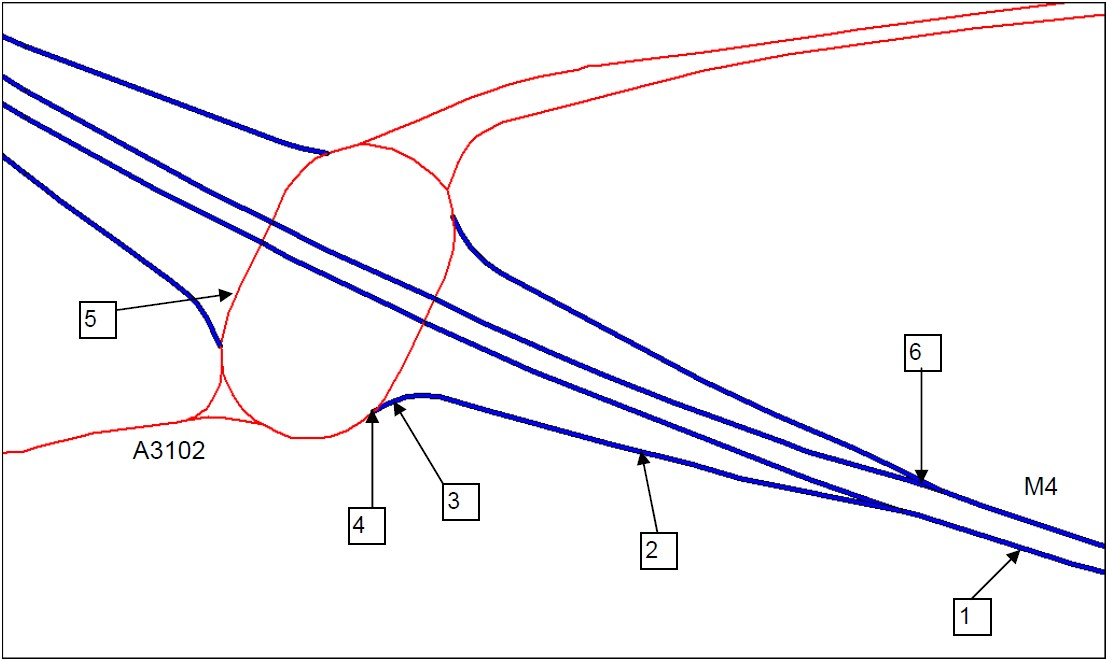

| Acc | Description | 1.12 | 1.13 | 1.14 | 1.16 | 1.17 | 1.18 | 1.19 | | Veh | 2.7 | 2.10 |
|-----|-------------|------|------|------|------|------|------|------|--- |-----|-----|------|
| 1 | Veh 1 hits offside of Veh 2 <br /> whilst moving to nearside lane <br /> on main carriageway of motorway, <br /> 100 metres from junction | 1 | 4 | 3 | 00 | | | | | 001 <br /> 002 | 11 <br /> 18 | 0 <br /> 0 |
| | | | | | | | | | | | | |
| 2 | Veh 1 crashes on exit slip road, <br /> 50m. from junction with motorway <br /> main carriageway and 50m. from roundabout | 1 | 4 | 7 | 00 | | | | | | 001 | 18 | 0 |
| | | | | | | | | | | | | |
| 3 | Veh 1 crashes into rear of Veh 2 <br /> which is waiting in queue on slip road, <br /> 10m from junction with roundabout | 1 | 4 | 7 | 01 | 2 | 3 | 3102 | | 001 <br /> 002 | 04 <br /> 03 | 1 <br /> 1 |
| | | | | | | | | | | | | |
| 4 | Veh 1 pulls out from slip road onto <br /> roundabout and hits nearside of Veh 2 | 3 | 3102 | 1 | 01 | 2 | 1 | 4 | | 001 <br /> 002 | 18 <br /> 04 | 4 <br /> 8 |
| | | | | | | | | | | | | |
| 5 | Veh 1 crashes into rear of Veh 2 <br /> which brakes suddenly on roundabout,<br /> more than 20m. from any entry/exit roads | 3 | 3102 | 1  | | | | | | 001 <br /> 002 | 18 <br /> 04 | 0 <br /> 0 |
| | | | | | | | | | | | | |
| 6 | Veh 1 joining main carriageway of <br /> motorway from entry slip collides <br /> with Veh 2 which is in nearside lane | 1 | 4 | 3 | 05 | 4 | 1 | 4 | | 001 <br /> 002 | 12 <br /> 18 | 7 <br /> 8 |

## Import Dependencies

Lets import the modules we will be using, and add a little global styling.

In [151]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno
# conda install -c conda-forge os
import os

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns
# conda install -c conda-forge folium
import folium as flm

from datetime import datetime
import statistics

from time import sleep
from tqdm import tqdm
from tqdm.notebook import tqdm

# apply some cool styling
rcParams['figure.figsize'] = (12,  6)
sns.set(style='darkgrid', palette='pastel', font_scale=1)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

## Importing and Loading Data into DataFrame

Lets import the dataset using pandas `pd.read_parquet` as `df_accident`, and have a quick look at some random rows.

In [152]:
df_accident = pd.read_parquet(
    'C:/Users/kmedr/My Drive/Omdena_Predicting_RTC_main/DATA/parquet/accident_data.parquet'
    )

In [153]:
# I like to use this method as it shows random rows.
df_accident.sample(n=10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
752813,200901QA10101,None,0.0,A,4140.0,Slight,None,26/03/2009,Thursday,2.0,Give way or uncontrolled,T or staggered junction,51.614552,Daylight,Harrow,Harrow,517360.0,192000.0,-0.306362,E01002229,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,11:10,Urban,Fine no high winds,2009,No
235549,200606A059256,A,62.0,None,0.0,Slight,None,20/10/2006,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.497957,Daylight,Manchester,Manchester,386570.0,400160.0,-2.203927,E01005257,1,2,0.0,0.0,Greater Manchester,Dry,Single carriageway,None,30,14:35,Urban,Fine no high winds,2006,No
259908,2.00613E+12,A,61.0,A,58.0,Slight,None,13/08/2006,Sunday,2.0,Auto traffic signal,More than 4 arms (not roundabout),53.807153,Daylight,Leeds,Leeds,430650.0,434640.0,-1.536051,E01011671,1,1,0.0,5.0,West Yorkshire,Dry,One way street,None,30,14:47,Urban,Fine no high winds,2006,No
533913,200750A51O441,C,19.0,None,0.0,Slight,None,16/11/2007,Friday,1.0,Not at junction or within 20 metres,Not at junction or within 20 metres,50.121633,Darkness - no lighting,Carrick,Cornwall,175110.0,29370.0,-5.147548,E01018879,1,3,0.0,0.0,Devon and Cornwall,Wet or damp,Single carriageway,None,30,23:15,Rural,Fine no high winds,2007,No
783669,2.0091E+12,A,1.0,None,0.0,Slight,None,06/03/2009,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,54.958566,Daylight,Gateshead,Gateshead,419880.0,562700.0,-1.691071,E01008181,2,4,0.0,0.0,Northumbria,Dry,Dual carriageway,None,70,08:29,Rural,Fine no high winds,2009,No
794556,2.00913E+12,A,58.0,A,58.0,Slight,None,02/08/2009,Sunday,2.0,Auto traffic signal,T or staggered junction,53.818035,Daylight,Leeds,Leeds,432020.0,435860.0,-1.515121,E01011422,1,2,0.0,5.0,West Yorkshire,Dry,Dual carriageway,None,40,20:00,Urban,Fine no high winds,2009,No
589828,200801XH30103,A,408.0,C,0.0,Slight,None,17/01/2008,Thursday,2.0,Auto traffic signal,Crossroads,51.515249,Daylight,Hillingdon,Hillingdon,505930.0,180700.0,-0.474784,E01002554,1,2,0.0,5.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,07:15,Urban,Raining no high winds,2008,No
69656,200514A245205,A(M),1.0,None,0.0,Slight,None,09/11/2005,Wednesday,2.0,Data missing or out of range,Not at junction or within 20 metres,53.427909,Daylight,Doncaster,Doncaster,460300.0,392730.0,-1.093951,E01007612,1,2,0.0,0.0,South Yorkshire,Dry,Dual carriageway,None,70,11:13,Rural,Fine no high winds,2005,No
491425,2.00736E+12,None,0.0,None,0.0,Slight,None,07/03/2007,Wednesday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.942873,Daylight,King's Lynn and West Norfolk,Norfolk,567370.0,341290.0,0.489401,E01026682,2,1,0.0,0.0,Norfolk,Wet or damp,Single carriageway,None,30,11:05,Rural,Fine no high winds,2007,No
132031,200543N459125,None,1098.0,Unclassified,1098.0,Slight,None,18/12/2005,Sunday,1.0,Give way or uncontrolled,T or staggered junction,52.045226,Darkness - lights lit,Milton Keynes,Milton Keynes,485910.0,239280.0,-0.748739,E01016730,1,2,0.0,0.0,Thames Valley,Dry,Single carriageway,None,30,00:34,Rural,Fine no high winds,2005,No


### Data Shape
Lets have a look ar the shape of the data.

In [154]:
df_accident.shape

(1048575, 34)

We have 1,048,575 rows (values) and 34 columns (features).

### Data Types
Lets have a look at the data types.

In [155]:
df_accident.info()
df_accident.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

object     21
float64     9
int64       4
dtype: int64

#### Data Types
|Data Type | Number|
|---|---:|
|object | 21|
|float | 9|
|integer | 4 |

## Data Cleaning
We will check the data for missing values, duplicates and incorrect data types.
- Missing Values - We will examine the missing values and use CCA to determine removal or replacement
- Duplicates - We will remove any duplicates
- Data Types - We will correct any data type errors, for example dates and times, as we go through the features

### Missing Values
Lets check for missing data.

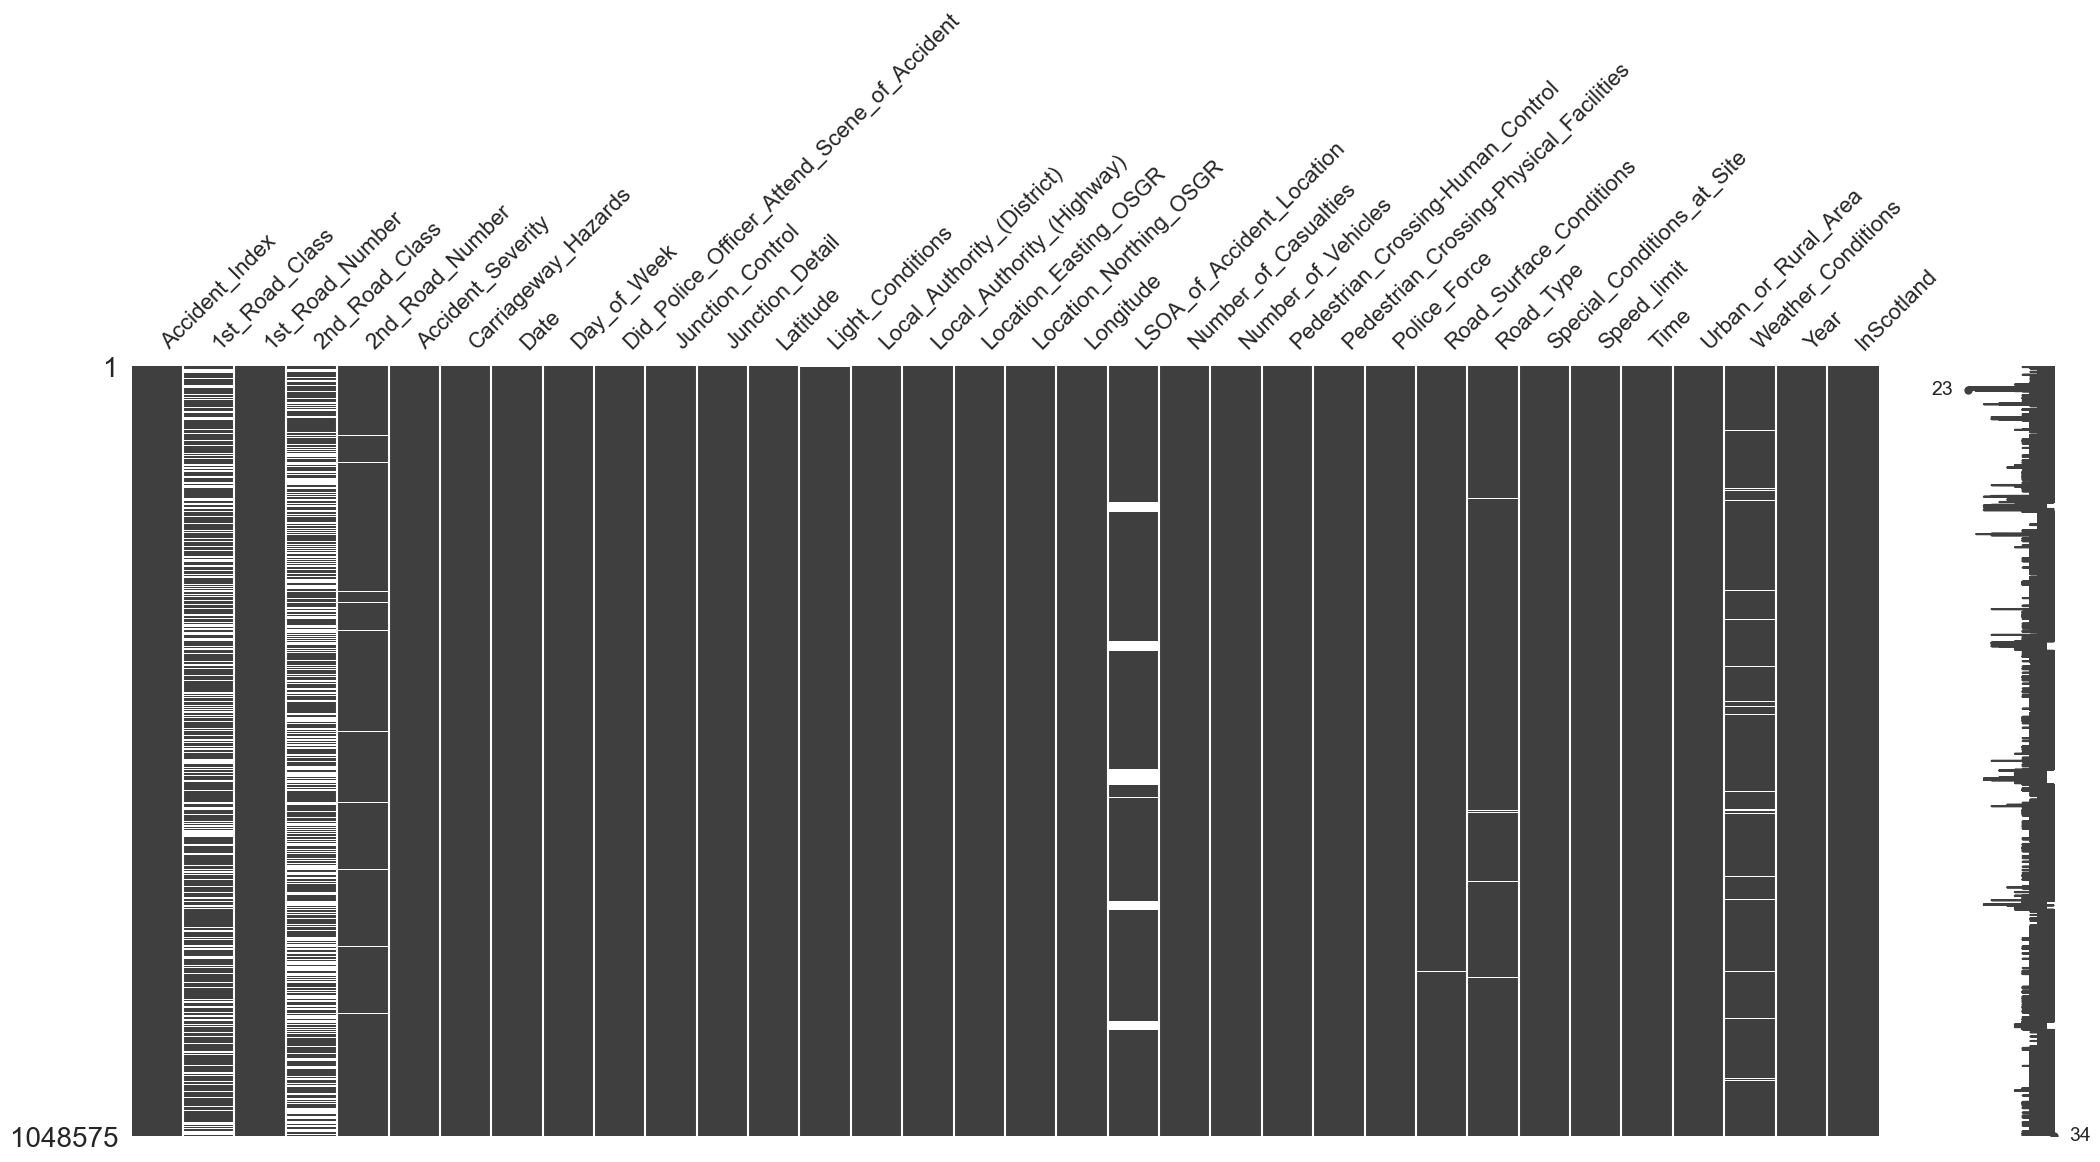

In [156]:
msno.matrix(df_accident);

In [157]:
df_accident.isnull().sum().sort_values(ascending=False)

2nd_Road_Class                                 439824
1st_Road_Class                                 305589
LSOA_of_Accident_Location                       71890
Weather_Conditions                              21392
2nd_Road_Number                                 10803
Road_Type                                        7266
Light_Conditions                                 2084
Road_Surface_Conditions                          1189
Did_Police_Officer_Attend_Scene_of_Accident       269
Longitude                                         112
Location_Northing_OSGR                            111
Location_Easting_OSGR                             111
Latitude                                          111
Time                                              100
Urban_or_Rural_Area                                85
InScotland                                         43
Pedestrian_Crossing-Physical_Facilities            37
Carriageway_Hazards                                29
Pedestrian_Crossing-Human_Co

In [158]:
print(
    'We have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We have a total of: 861084 missing values.


We have a lot of missing or NaN data (861,084). We will need to take a good look to see what is going on.  
  
We will start with the columns (features).

### Dropping Columns

Before we look at missing row data, data types and errors lets investigate the features and take out what we do not need.  
  
Lets highlight the columns we can drop and the reasons behind our decision:  
- **LSOA_of_Accident_Location** - As this is for statistical purposes it is not needed.
- **2nd_Road_Number** - Not needed as we have the class of the road and the geographical location.
- **Did_Police_Officer_Attend_Scene_of_Accident** - This happened after the event.
- **Location_Northing_OSGR** - Secondary geographical locator.
- **Location_Easting_OSGR**  - Secondary geographical locator.
- **InScotland** - Not needed as we have geolocation and Local Authority information.
- **1st_Road_Number** - Not needed as we have the class of the road and the geographical location.
- **Local_Authority_(Highway)** - Not needed as we have Local_Authority_(District) .
- **Accident_Index** - Not required for EDA however will leave in place so we can merge later if and when required.  
  
Lets remove these columns.

In [159]:
df_accident.drop(['Location_Northing_OSGR',
                  'Location_Easting_OSGR',
                  'LSOA_of_Accident_Location',
                  '1st_Road_Number',
                  '2nd_Road_Number',
                  'Did_Police_Officer_Attend_Scene_of_Accident',
                  'Local_Authority_(Highway)',
                  'InScotland'
                  ], axis=1, inplace=True
                 )

In [160]:
df_accident.columns

Index(['Accident_Index', '1st_Road_Class', '2nd_Road_Class',
       'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year'],
      dtype='object')

In [161]:
df_accident.shape

(1048575, 26)

In [162]:
print(
    'We now have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We now have a total of: 777855 missing values.


In [163]:
df_accident.isnull().sum().sort_values(ascending=False)

2nd_Road_Class                             439824
1st_Road_Class                             305589
Weather_Conditions                          21392
Road_Type                                    7266
Light_Conditions                             2084
Road_Surface_Conditions                      1189
Longitude                                     112
Latitude                                      111
Time                                          100
Urban_or_Rural_Area                            85
Pedestrian_Crossing-Physical_Facilities        37
Carriageway_Hazards                            29
Pedestrian_Crossing-Human_Control              21
Special_Conditions_at_Site                     16
Police_Force                                    0
Speed_limit                                     0
Accident_Index                                  0
Number_of_Casualties                            0
Number_of_Vehicles                              0
Local_Authority_(District)                      0


Lets take a look at the columns with the most missing data.
| Column Name         | Count        |
| --------------------|--------------|
| 1st_Road_Class      | 305589       |
| 2nd_Road_Class      | 439824       |
| Weather_Conditions  | 21392       |
| Road_Type           | 7266       |
| Light_Conditions    | 2084       |
| Road_Surface_Conditions | 1189   |

### 1st_Road_Class

In [164]:
df_accident['1st_Road_Class'].value_counts(dropna=False, ascending=False)

A           470854
None        305589
B           133179
C            93983
Motorway     42297
A(M)          2673
Name: 1st_Road_Class, dtype: int64

### 2nd_Road_Class

In [165]:
df_accident['2nd_Road_Class'].value_counts(dropna=False, ascending=False)

None            439824
Unclassified    411064
A               102148
C                47542
B                40221
Motorway          6980
A(M)               796
Name: 2nd_Road_Class, dtype: int64

After investigating **1st_** and **2nd_road_class** features we found that in the [Police form](https://www.gov.uk/government/publications/stats19-forms-and-guidance) it shows us that there are two options which are very similar:  
  
- **Not Known**
- **Unclassified**
  
**Not Known** would indicate that the Police Officer does not know the road classification.  
**Unclassified** relates to a road of no classification, a side road or housing estate road.  
It would be logical to believe that there must be a **1st_Road_Class**, therefore the  
**1st_Road_Class**, **None**, value represents an **Unclassified** road or a **Not Known** road.  
  
The **2nd_road_class**, **None**, value represents that only one road was involved, and no junction.
  
Lets replace the values in **1st_Road_Class** with **Unclassified** and **2nd_road_class** with **No 2nd Road**  
  
We also found that a **2nd_road_class** can only be added if there is a **junction** involved.  

In [166]:
df_accident['1st_Road_Class'].replace(np.NaN, 'Unclassified', inplace=True)
df_accident['1st_Road_Class'].value_counts(dropna=False, ascending=False)

A               470854
Unclassified    305589
B               133179
C                93983
Motorway         42297
A(M)              2673
Name: 1st_Road_Class, dtype: int64

In [167]:
df_accident['2nd_Road_Class'].replace(np.NaN, 'No 2nd Road', inplace=True)
df_accident['2nd_Road_Class'].value_counts(dropna=False, ascending=False)

No 2nd Road     439824
Unclassified    411064
A               102148
C                47542
B                40221
Motorway          6980
A(M)               796
Name: 2nd_Road_Class, dtype: int64

### 'Weather_Conditions'

In [168]:
df_accident['Weather_Conditions'].value_counts(dropna=False, ascending=False)

Fine no high winds       831083
Raining no high winds    125484
Other                     26486
None                      21392
Raining + high winds      14697
Fine + high winds         13554
Snowing no high winds      8542
Fog or mist                6051
Snowing + high winds       1286
Name: Weather_Conditions, dtype: int64

We will change **'Weather_Conditions'** NaN values with the `mode`.

In [169]:
df_accident['Weather_Conditions'].fillna(
    df_accident['Weather_Conditions'].mode()[0], inplace=True
    )
df_accident['Weather_Conditions'].value_counts(dropna=False, ascending=False)

Fine no high winds       852475
Raining no high winds    125484
Other                     26486
Raining + high winds      14697
Fine + high winds         13554
Snowing no high winds      8542
Fog or mist                6051
Snowing + high winds       1286
Name: Weather_Conditions, dtype: int64

We have not made any significant change using **`mode`**.

### 'Light_Conditions'

In [170]:
df_accident['Light_Conditions'].value_counts(dropna=False, ascending=False)

Daylight                       764036
Darkness - lights lit          207972
Darkness - no lighting          60795
Darkness - lighting unknown      9372
Darkness - lights unlit          4316
None                             2084
Name: Light_Conditions, dtype: int64

We will change **'Light_Conditions'** NaN values with the `mode`.

In [171]:
df_accident['Light_Conditions'].fillna(
    df_accident['Light_Conditions'].mode()[0], inplace=True
    )
df_accident['Light_Conditions'].value_counts(dropna=False, ascending=False)

Daylight                       766120
Darkness - lights lit          207972
Darkness - no lighting          60795
Darkness - lighting unknown      9372
Darkness - lights unlit          4316
Name: Light_Conditions, dtype: int64

We have not made any significant change using **`mode`**.

### 'Road_Surface_Conditions'

In [172]:
df_accident['Road_Surface_Conditions'].value_counts(
                                            dropna=False, ascending=False
                                        )

Dry                     712370
Wet or damp             302250
Frost or ice             23857
Snow                      7451
Flood over 3cm. deep      1458
None                      1189
Name: Road_Surface_Conditions, dtype: int64

We will change **'Road_Surface_Conditions'** NaN values with the `mode`.

In [173]:
df_accident['Road_Surface_Conditions'].fillna(
    df_accident['Road_Surface_Conditions'].mode()[0], inplace=True
    )
df_accident['Road_Surface_Conditions'].value_counts(dropna=False, ascending=False)

Dry                     713559
Wet or damp             302250
Frost or ice             23857
Snow                      7451
Flood over 3cm. deep      1458
Name: Road_Surface_Conditions, dtype: int64

We have not made any significant change using **`mode`**.

In [174]:
df_accident.shape

(1048575, 26)

In [175]:
print(
    'We now have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
)

We now have a total of: 7777 missing values.


So far we have lost no rows and reduced the missing value count down to 11,050.  
  
We will drop the rows containing the left over NaN values.

In [176]:
df_accident.head(n=10)

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,200501BS00001,A,No 2nd Road,Serious,None,04/01/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,-0.191170,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005
1,200501BS00002,B,C,Slight,None,05/01/2005,Wednesday,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,-0.211708,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005
2,200501BS00003,C,No 2nd Road,Slight,None,06/01/2005,Thursday,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,-0.206458,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005
3,200501BS00004,A,No 2nd Road,Slight,None,07/01/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,-0.173862,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005
4,200501BS00005,Unclassified,No 2nd Road,Slight,None,10/01/2005,Monday,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,-0.156618,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005
5,200501BS00006,Unclassified,No 2nd Road,Slight,None,11/01/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,-0.203238,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30,12:40,Urban,Raining no high winds,2005
6,200501BS00007,C,Unclassified,Slight,None,13/01/2005,Thursday,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,-0.211277,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds,2005
7,200501BS00009,A,No 2nd Road,Slight,None,14/01/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,51.502260,Daylight,Kensington and Chelsea,-0.187623,2,1,0.0,0.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:35,Urban,Fine no high winds,2005
8,200501BS00010,A,B,Slight,None,15/01/2005,Saturday,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,Kensington and Chelsea,-0.167342,2,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30,22:43,Urban,Fine no high winds,2005
9,200501BS00011,B,C,Slight,None,15/01/2005,Saturday,Give way or uncontrolled,T or staggered junction,51.512443,Daylight,Kensington and Chelsea,-0.206531,5,2,0.0,8.0,Metropolitan Police,Dry,Single carriageway,None,30,16:00,Urban,Fine no high winds,2005


In [177]:
df_accident['Light_Conditions'].value_counts()

Daylight                       766120
Darkness - lights lit          207972
Darkness - no lighting          60795
Darkness - lighting unknown      9372
Darkness - lights unlit          4316
Name: Light_Conditions, dtype: int64

In [178]:
length_before = len(df_accident)
df_accident.dropna(inplace=True)
lnth = (length_before - len(df_accident)) / length_before
df_accident.reset_index(drop=True)
print(f'We have dropped only {lnth:.2%} of the rows.')

We have dropped only 0.72% of the rows.


We have only lost 0.72% of the original rows.

Lets confirm we have no missing values.

In [179]:
print(
    'We now have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We now have a total of: 0 missing values.


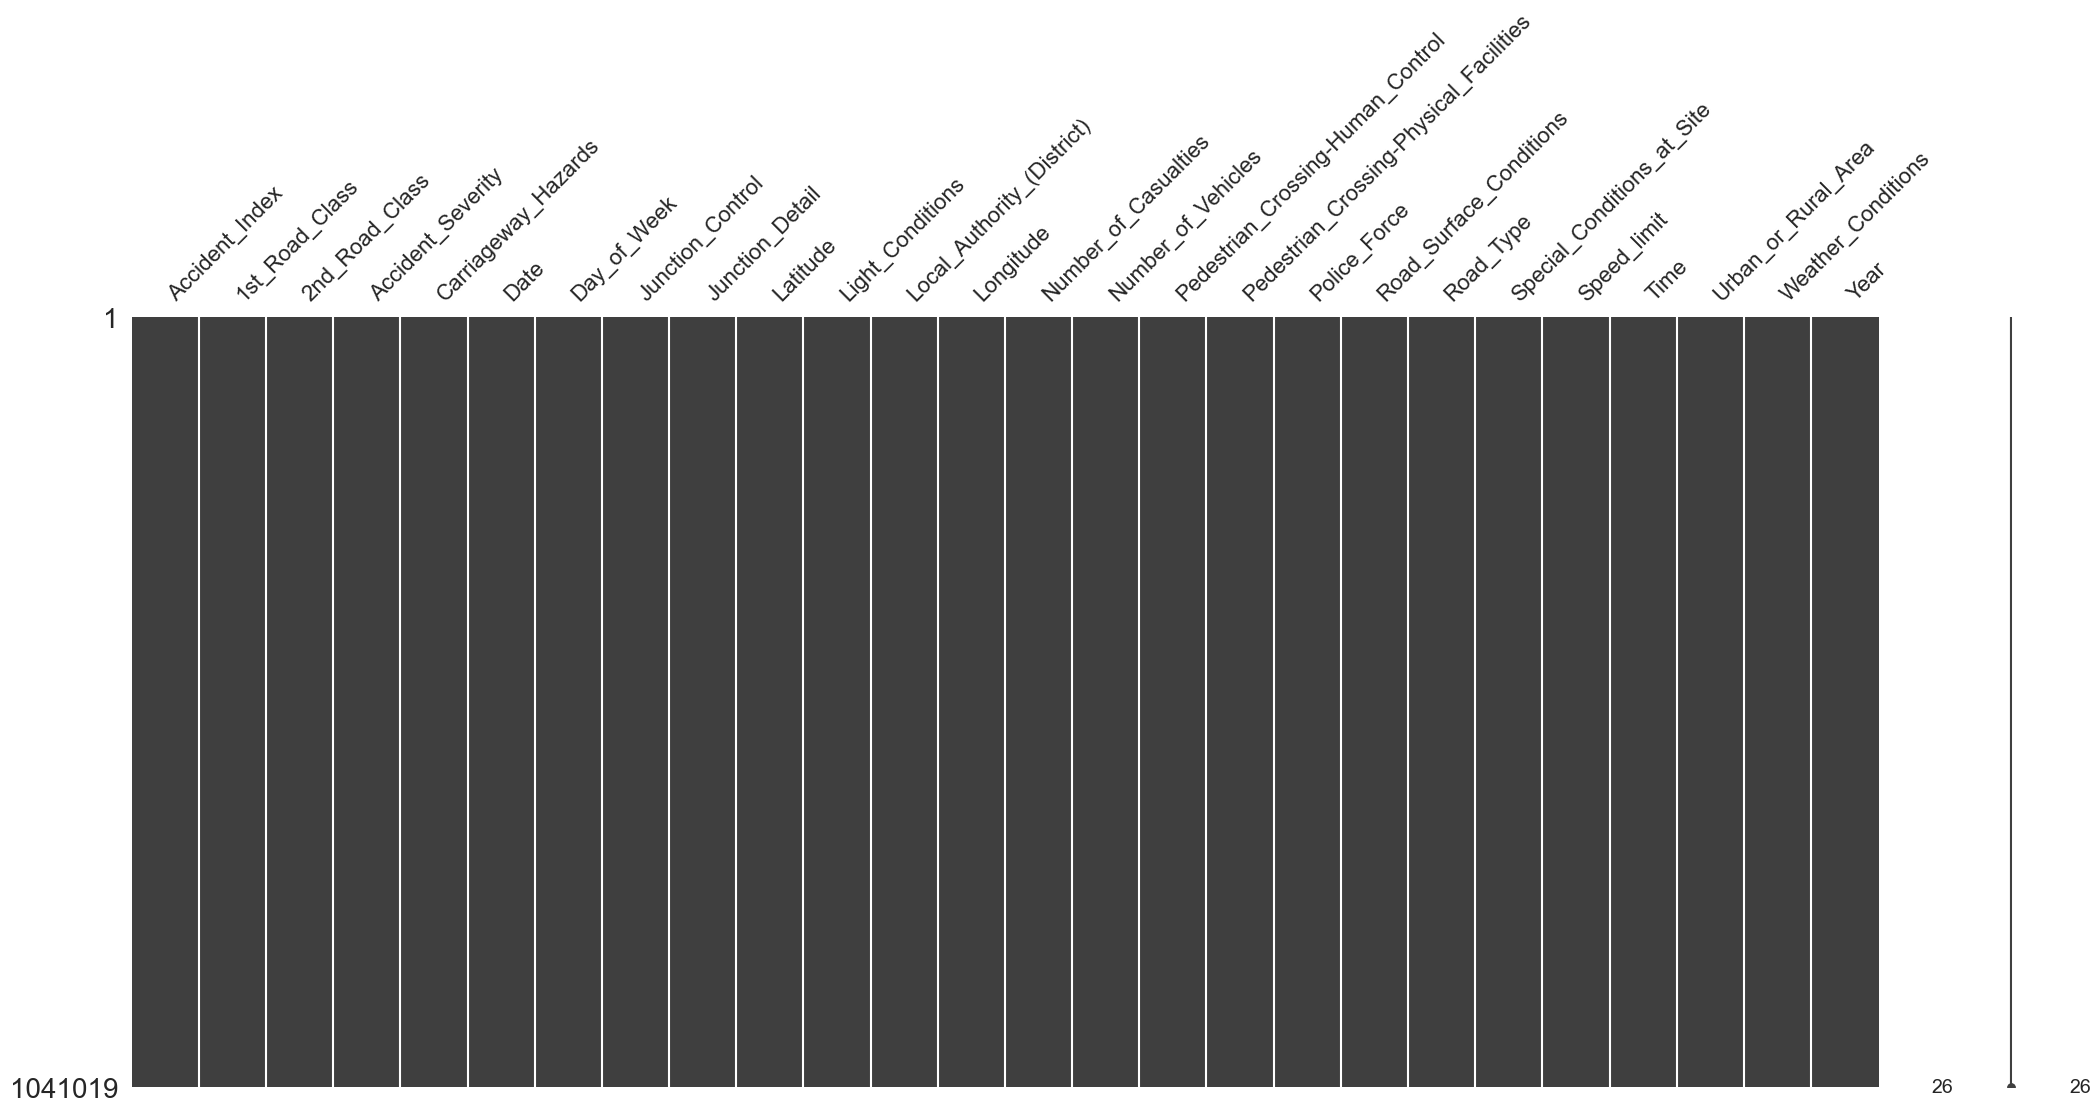

In [180]:
msno.matrix(df_accident);

### Duplicates
Lets check for and remove any duplicate rows.

In [181]:
# Number of duplicated rows
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 6
Rows and columns: (1041019, 26)


In [182]:
# drop duplicated rows and reset index
df_accident.drop_duplicates(inplace=True)
df_accident.reset_index(inplace=True, drop=True)
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 0
Rows and columns: (1041013, 26)


### Data Types and Formatting
We will convert all column names to lowercase change special characters, **-** with **_** and **()** with **''** and remove white space, if any, for standardisation.

In [183]:
df_accident.columns= df_accident.columns.str.strip().str.lower()
df_accident.columns = df_accident.columns.str.replace('-', '_')
df_accident.columns = df_accident.columns.str.replace('(', '')
df_accident.columns = df_accident.columns.str.replace(')', '')
df_accident.columns

Index(['accident_index', '1st_road_class', '2nd_road_class',
       'accident_severity', 'carriageway_hazards', 'date', 'day_of_week',
       'junction_control', 'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'longitude', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year'],
      dtype='object')

Now we can check datatypes.

In [184]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041013 entries, 0 to 1041012
Data columns (total 26 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   accident_index                           1041013 non-null  object 
 1   1st_road_class                           1041013 non-null  object 
 2   2nd_road_class                           1041013 non-null  object 
 3   accident_severity                        1041013 non-null  object 
 4   carriageway_hazards                      1041013 non-null  object 
 5   date                                     1041013 non-null  object 
 6   day_of_week                              1041013 non-null  object 
 7   junction_control                         1041013 non-null  object 
 8   junction_detail                          1041013 non-null  object 
 9   latitude                                 1041013 non-null  float64
 10  light_conditions  

Lets take a sample row and have a look at each feature in more detail.  

In [185]:
df_accident.sample(1)

,accident_index,1st_road_class,2nd_road_class,accident_severity,carriageway_hazards,date,day_of_week,junction_control,junction_detail,latitude,light_conditions,local_authority_district,longitude,number_of_casualties,number_of_vehicles,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,police_force,road_surface_conditions,road_type,special_conditions_at_site,speed_limit,time,urban_or_rural_area,weather_conditions,year
41272,200506F026905,A,No 2nd Road,Slight,None,13/05/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,53.493368,Daylight,Salford,-2.292987,1,2,0.0,0.0,Greater Manchester,Dry,Dual carriageway,None,30,08:38,Urban,Fine no high winds,2005


Lets convert the categorical data to `category` and the numerical data to `int` and `float`.

In [186]:
for col in ['accident_index',
            '1st_road_class', '2nd_road_class', 'speed_limit',
            'accident_severity', 'carriageway_hazards',
            'junction_control', 'junction_detail',
            'light_conditions', 'local_authority_district',
            'pedestrian_crossing_human_control',
            'pedestrian_crossing_physical_facilities',
            'police_force', 'road_surface_conditions',
            'road_type', 'special_conditions_at_site',
            'urban_or_rural_area', 'weather_conditions'
            ]:
    df_accident[col] = df_accident[col].astype('category')

for col in ['number_of_casualties', 'number_of_vehicles'
            ]:
    df_accident[col] = df_accident[col].astype('int')

for col in ['latitude', 'longitude'
            ]:
    df_accident[col] = df_accident[col].astype('float64')

df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041013 entries, 0 to 1041012
Data columns (total 26 columns):
 #   Column                                   Non-Null Count    Dtype   
---  ------                                   --------------    -----   
 0   accident_index                           1041013 non-null  category
 1   1st_road_class                           1041013 non-null  category
 2   2nd_road_class                           1041013 non-null  category
 3   accident_severity                        1041013 non-null  category
 4   carriageway_hazards                      1041013 non-null  category
 5   date                                     1041013 non-null  object  
 6   day_of_week                              1041013 non-null  object  
 7   junction_control                         1041013 non-null  category
 8   junction_detail                          1041013 non-null  category
 9   latitude                                 1041013 non-null  float64 
 10  light_

Now things are starting to look much better. We will look at dates and times later, as we plan to make use of these columns.

## Average Counts
Lets see how the **RTC's** have tracked over our time period.

In [187]:
yr_2005, yr_2006, yr_2007, yr_2008, yr_2009, yr_2010 = (
    df_accident['year'] == 2005, df_accident['year'] == 2006,
    df_accident['year'] == 2007, df_accident['year'] == 2008,
    df_accident['year'] == 2009, df_accident['year'] == 2010
    )

yr_slight = df_accident['accident_severity'] == 'Slight'
yr_serious = df_accident['accident_severity'] == 'Serious'
yr_fatal = df_accident['accident_severity'] == 'Fatal'

yearly_numbers = {
    '2005' : [
        yr_2005.sum(), int(yr_2005.sum() /12), int(yr_2005.sum() / 52),
        int(yr_2005.sum() /365), (yr_2005 & yr_slight).sum(),
        (yr_2005 & yr_serious).sum(), (yr_2005 & yr_fatal).sum()
    ],
    '2006' : [
        yr_2006.sum(), int(yr_2006.sum() /12), int(yr_2006.sum() / 52),
        int(yr_2006.sum() /365), (yr_2006 & yr_slight).sum(),
        (yr_2006 & yr_serious).sum(), (yr_2006 & yr_fatal).sum()
    ],
    '2007' : [
        yr_2007.sum(), int(yr_2007.sum() /12), int(yr_2007.sum() / 52),
        int(yr_2007.sum() /365), (yr_2007 & yr_slight).sum(),
        (yr_2007 & yr_serious).sum(), (yr_2007 & yr_fatal).sum()
    ],
    '2008' : [
        yr_2008.sum(), int(yr_2008.sum() /12), int(yr_2008.sum() / 52),
        int(yr_2008.sum() /365), (yr_2008 & yr_slight).sum(),
        (yr_2008 & yr_serious).sum(), (yr_2008 & yr_fatal).sum()
    ],
    '2009' : [
        yr_2009.sum(), int(yr_2009.sum() /12), int(yr_2009.sum() / 52),
        int(yr_2009.sum() /365), (yr_2009 & yr_slight).sum(),
        (yr_2009 & yr_serious).sum(), (yr_2009 & yr_fatal).sum()
    ],
    '2010' : [
        yr_2010.sum(), int(yr_2010.sum() /12), int(yr_2010.sum() / 52),
        int(yr_2010.sum() /365), (yr_2010 & yr_slight).sum(),
        (yr_2010 & yr_serious).sum(), (yr_2010 & yr_fatal).sum()
    ]
}

In [188]:
df_avgs = pd.DataFrame.from_dict(yearly_numbers, ).T
df_avgs.reset_index(inplace=True)
df_avgs.columns = ['year', 'yearly', 'monthly', 'weekly',
                   'daily', 'slight', 'serious', 'fatal'
                  ]

In [189]:
df_avgs

,year,yearly,monthly,weekly,daily,slight,serious,fatal
0,2005,197076,16423,3789,539,169313,24864,2899
1,2006,187871,15655,3612,514,160150,24803,2918
2,2007,180509,15042,3471,494,153647,24162,2700
3,2008,169139,14094,3252,463,143858,22952,2329
4,2009,162614,13551,3127,445,138666,21897,2051
5,2010,143804,11983,2765,393,123546,18710,1548


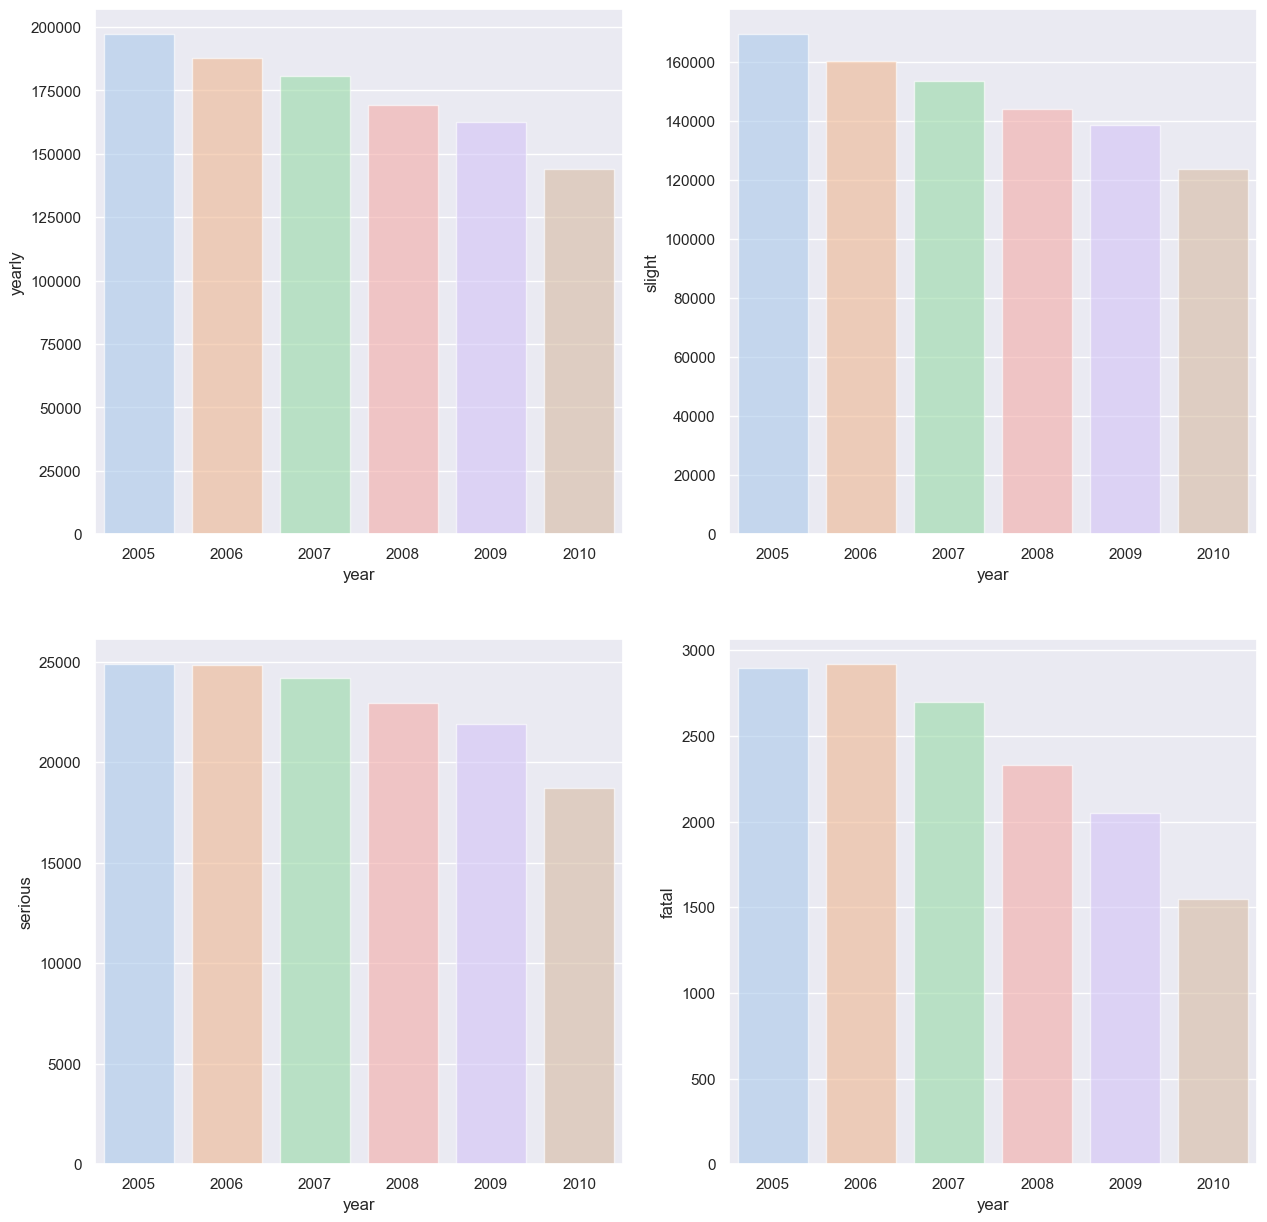

In [190]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.barplot(data=df_avgs, x='year', y='yearly', alpha=0.6, ax=ax[0, 0])
sns.barplot(data=df_avgs, x='year', y='slight', alpha=0.6, ax=ax[0, 1])
sns.barplot(data=df_avgs, x='year', y='serious', alpha=0.6, ax=ax[1, 0])
sns.barplot(data=df_avgs, x='year', y='fatal', alpha=0.6, ax=ax[1, 1]);

plt.show()

As expected we can see a nice decline in RTC's over the six years.

## Collision Severity Spread

In [191]:
round(df_accident[
    'accident_severity'
].value_counts(ascending=False, normalize=True), 3) * 100

Slight     85.4
Serious    13.2
Fatal       1.4
Name: accident_severity, dtype: float64

| Severity         | Percentage        |
| --------------------|--------------|
| **Slight**      | **85.4%**       |
| **Serious**      | **13.2%**      |
| **Fatal**  | **1.4%**    |
  
With less than 15% of Serious and Fatal accidents we have a very heavy bias towards **Slight** collisions.  
  
Lets see if we can uncover any large increases in the **Serious** and **Fatal** collisions.  
We have benchmarks of:
- 13.2% for **Serious** collisions
- 1.4% for **Fatal** collisions

## Features

Lets remind ourselves of our features.

In [192]:
df_accident.columns

Index(['accident_index', '1st_road_class', '2nd_road_class',
       'accident_severity', 'carriageway_hazards', 'date', 'day_of_week',
       'junction_control', 'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'longitude', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year'],
      dtype='object')

### Feature: **'1st_road_class'** and **'2nd_road_class'**

In [193]:
print(df_accident['1st_road_class'].value_counts(
                                                 dropna=False, ascending=False
                                                 ))
print(f'Total rows: ', df_accident['1st_road_class'].count())

A               468806
Unclassified    301611
B               132527
C                93367
Motorway         42037
A(M)              2665
Name: 1st_road_class, dtype: int64
Total rows:  1041013


In [194]:
print(df_accident['2nd_road_class'].value_counts(
                                                 dropna=False, ascending=False
                                                 ))
print(f'Total rows: ', df_accident['1st_road_class'].count())

No 2nd Road     435903
Unclassified    408448
A               101570
C                47306
B                40042
Motorway          6952
A(M)               792
Name: 2nd_road_class, dtype: int64
Total rows:  1041013


We can see that most RTC's happen on **'A Roads'** and **'Unclassified Roads'**. Nearly half of all RTC's do not involve a **second road**.

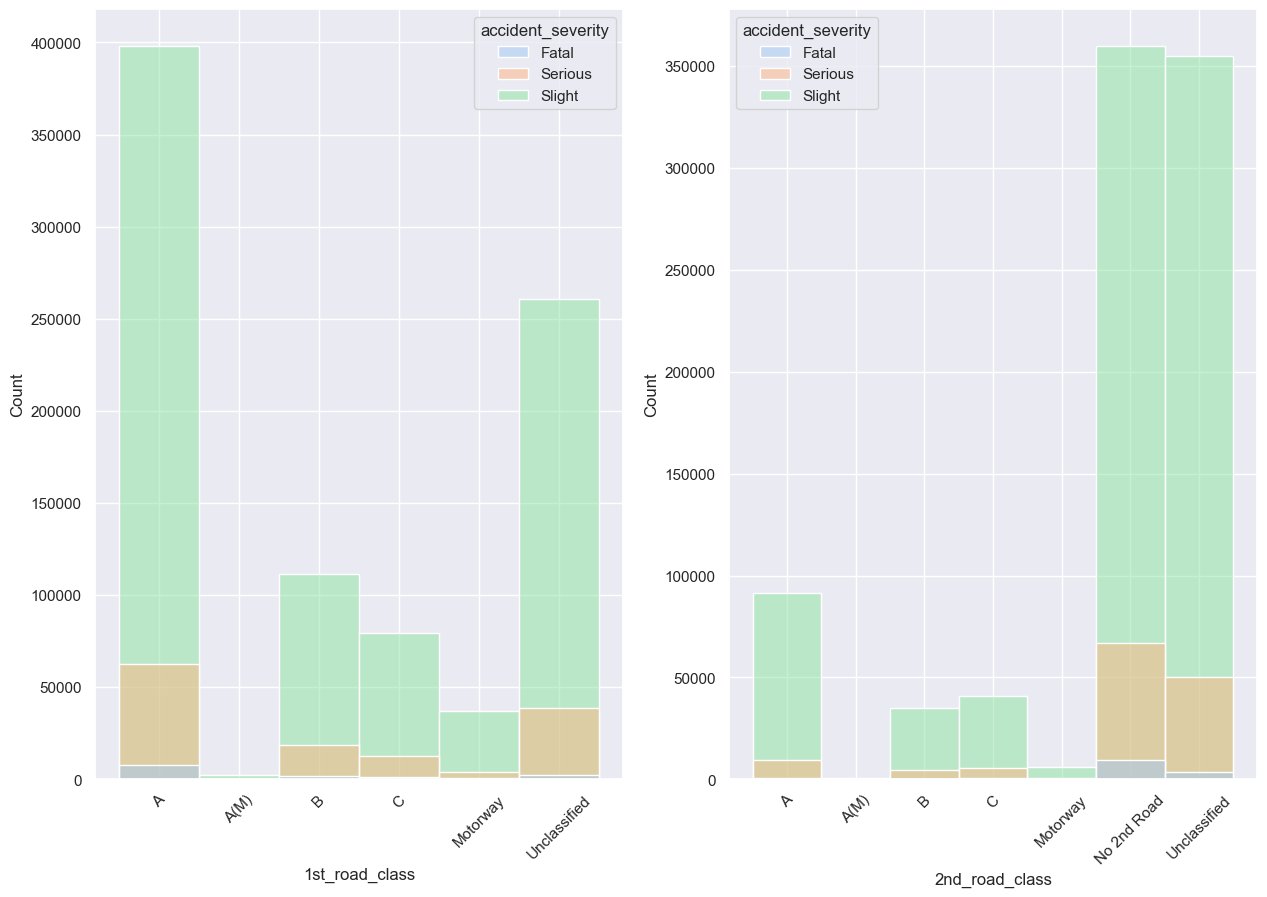

In [195]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
for axes in ax.flatten():
    plt.sca(axes)
    plt.xticks(rotation = 45)

sns.histplot(data=df_accident,
             x='1st_road_class',
             hue='accident_severity',
             ax=ax[0]
             )

sns.histplot(data=df_accident,
             x='2nd_road_class',
             hue='accident_severity',
             ax=ax[1]
             )

plt.show()

From the visualisation we can detect that most fatal RTC's happen on either an **'A' Road only**, or an **'A'** Road with an **'Unclassified'** 2nd Road (pulling out of, or into a side road).

### Feature - **'accident_severity'**

In [196]:
print(df_accident['accident_severity'].value_counts(
                                                    dropna=False,
                                                    ascending=False
                                                    ))
print(f'\n Total rows: ', df_accident['accident_severity'].count())

Slight     889180
Serious    137388
Fatal       14445
Name: accident_severity, dtype: int64

 Total rows:  1041013


We can see that most RTC's are **'Slight'** RTC's with **'Fatal'** the lowest.

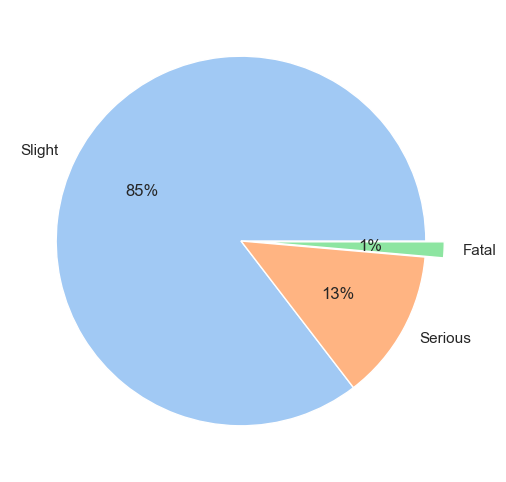

In [197]:
data = df_accident['accident_severity'].value_counts()
labels = ['Slight', 'Serious', 'Fatal']
colors = sns.color_palette('pastel')[0:3]
explode=[0, 0, 0.1]
plt.pie(
    data, labels = labels,
    colors = colors,
    explode=explode, autopct='%.0f%%'
)

plt.show()

<AxesSubplot: >

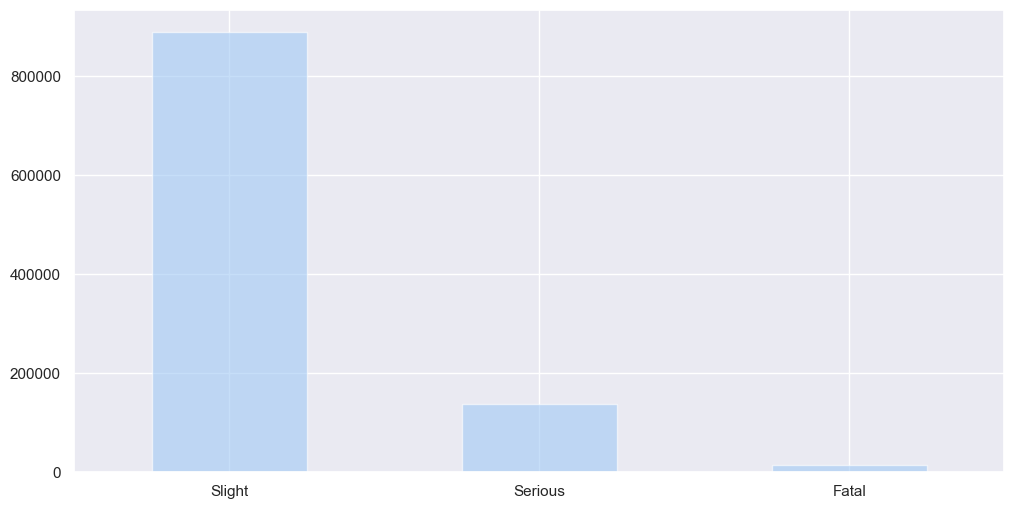

In [198]:
df_accident['accident_severity'].value_counts().plot(kind='bar',
                                                     alpha=0.6, rot=0
                                                     )

### Features - **'date'** and **'time'**

Lets take a look at the data type of the **'date'** and **'time'** columns.

In [199]:
print(f'Data type of Date Column: {df_accident["date"].dtype}')
print(f'Data type of Date Column: {df_accident["time"].dtype}')
print(df_accident['date'][0])
print(df_accident['time'][0])

Data type of Date Column: object
Data type of Date Column: object
04/01/2005
17:42


Lets convert our **'date'** and **'time'** columns using `pd.to_datetime`.

In [200]:
df_accident['date'] = pd.to_datetime(df_accident['date'], dayfirst=True)
df_accident['time'] =  pd.to_datetime(df_accident['time'], format='%H:%M')
print(f"Data type of date Column: {df_accident['date'].dtype}")
print(f"Data type of time Column: {df_accident['time'].dtype}")

Data type of date Column: datetime64[ns]
Data type of time Column: datetime64[ns]


#### New Feature - **'hour'**
Lets create the new feature **'hour'** in order to simplify the time view.

In [201]:
df_accident['hour'] = df_accident['time'].apply(lambda x:x.hour)
# df_accident.drop('time', axis=1, inplace=True)

### Feature - **'hour'**

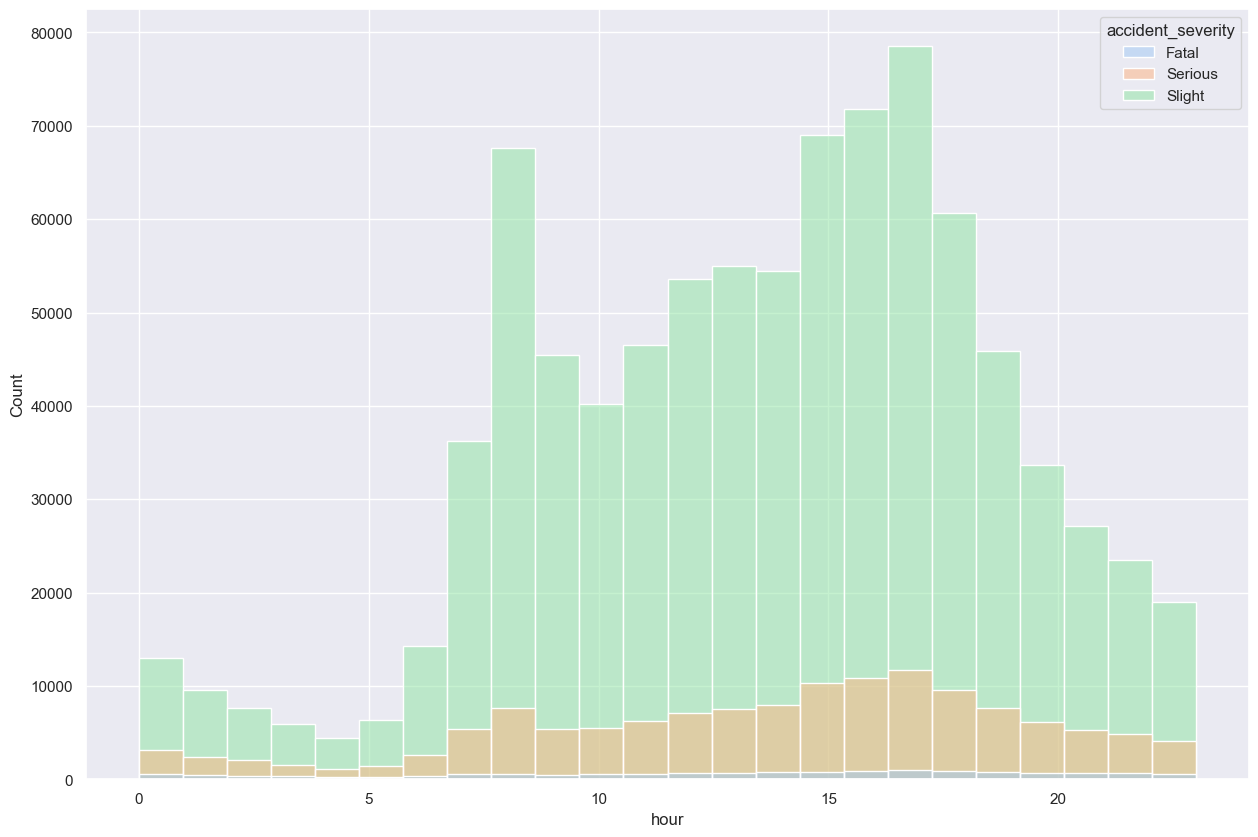

In [202]:
plt.figure(figsize=(15,10))
ax = sns.histplot(
    data=df_accident, x='hour',
    palette='pastel', bins=24, hue='accident_severity'
                  )

plt.show()

We can see two peaks, one in the morning and one in the afternoon.  
  
Lets take a look at the **RTC** severities.

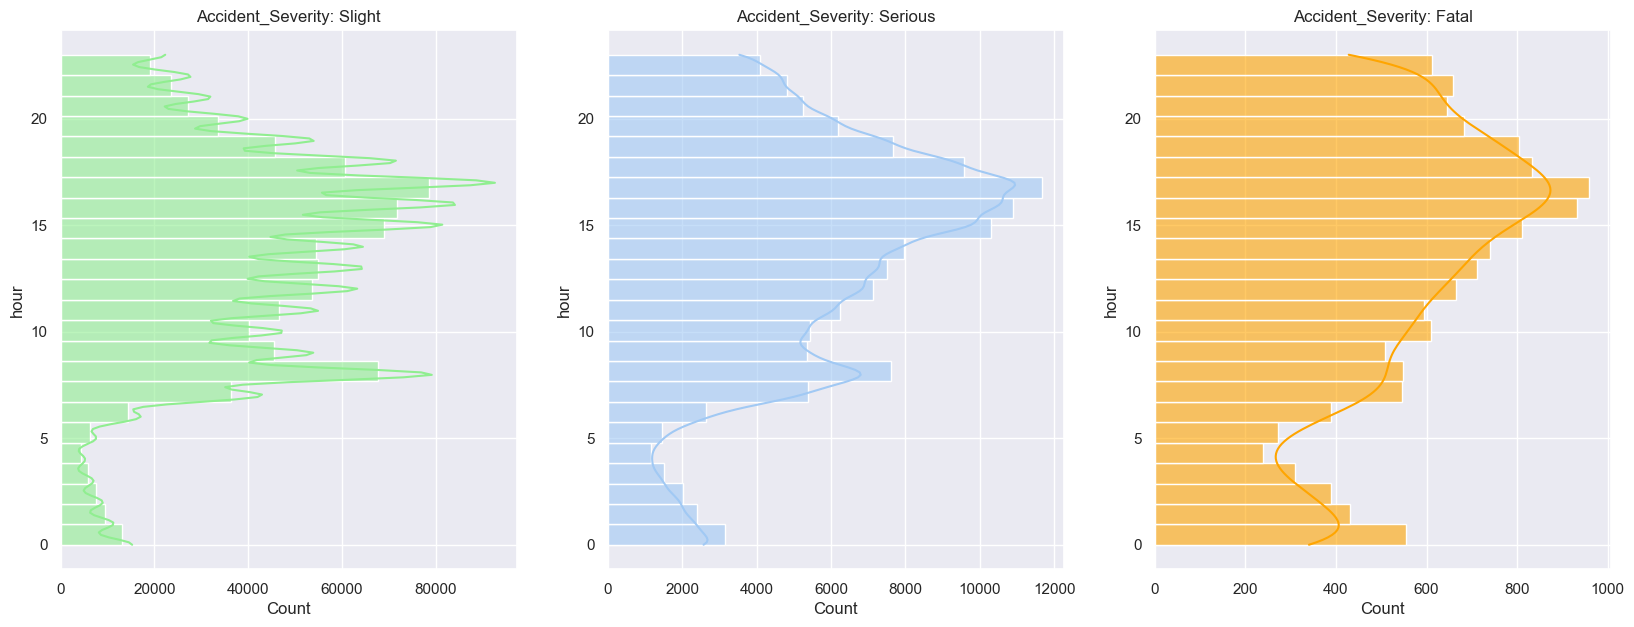

In [203]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(
             df_accident[df_accident['accident_severity'] == 'Slight'],
             y='hour', color='lightgreen',
             alpha=0.6, bins=24, ax=ax[0], kde=True
             ).set(title=f'Accident_Severity: Slight')

sns.histplot(
             df_accident[df_accident['accident_severity'] == 'Serious'],
             y='hour',
             alpha=0.6, bins=24, ax=ax[1], kde=True
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(
             df_accident[df_accident['accident_severity'] == 'Fatal'],
             y="hour", color='orange',
             alpha=0.6, bins=24, ax=ax[2], kde=True
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see most RTC's happen betwen 8am and 7pm, with two peaks.  
- For Slight and Serious we have peaks at 9am and 3-5pm. This would appear to be rush hour traffic.
- For **'Fatal'** we have a peak at 3-5pm  

**'Fatal'** RTC's do appear to maintain a higher rate until midnight, where it then starts to tail off.

### Feature - **'day_of_week'**

Here we can look to see what week day trends we have.

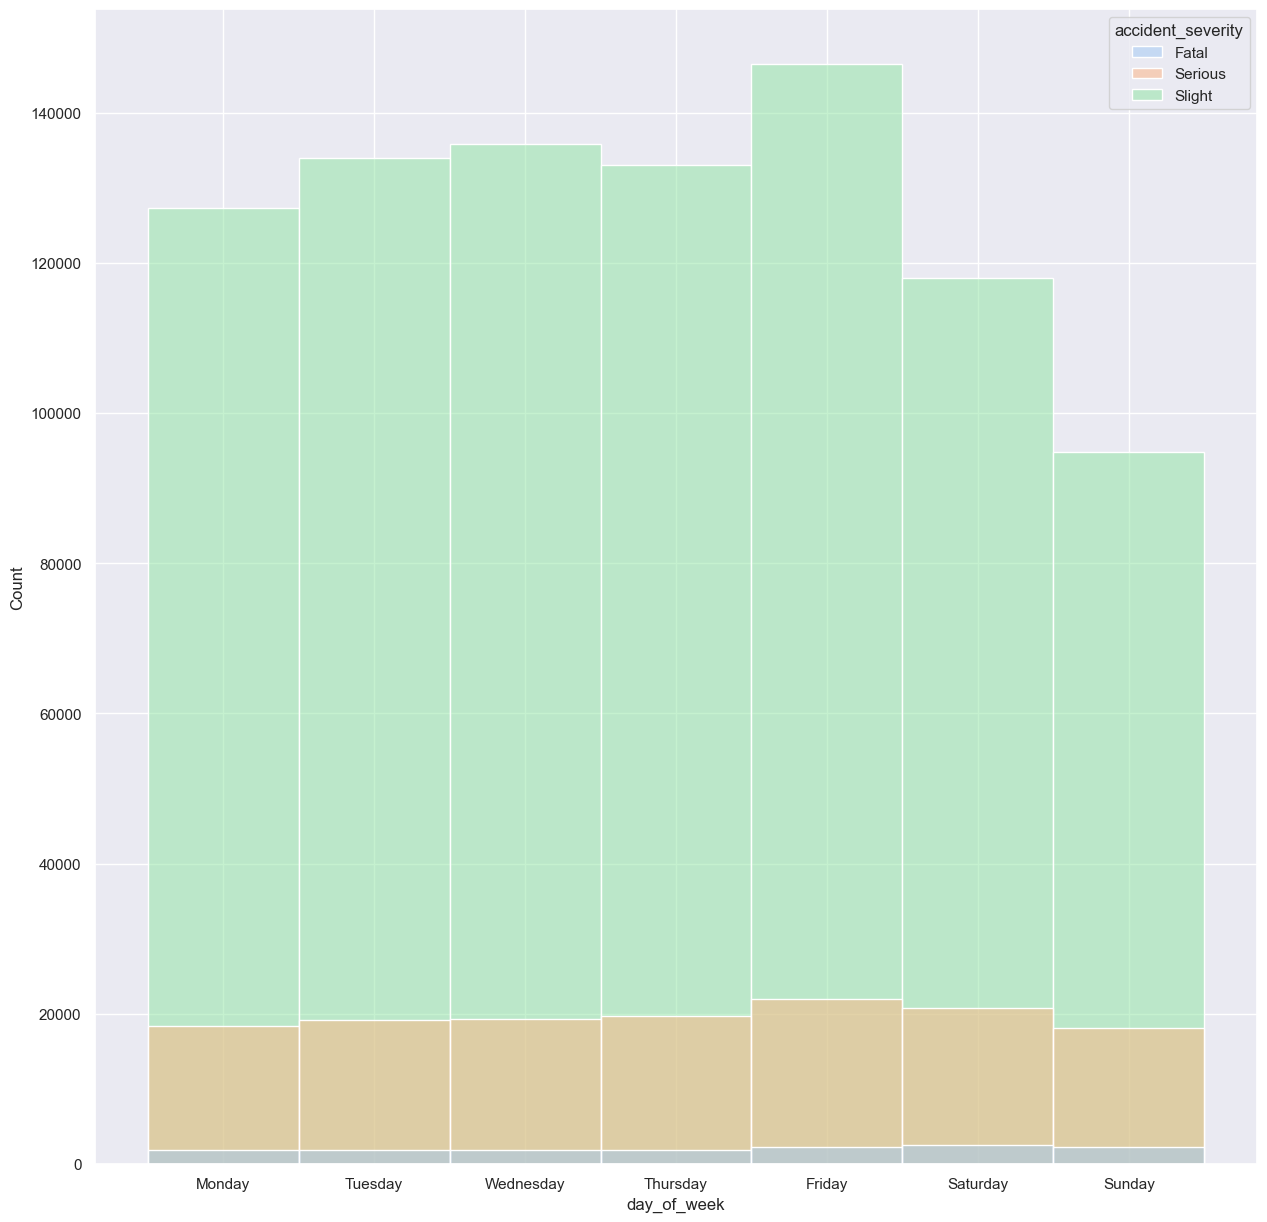

In [204]:
df_accident.day_of_week = pd.Categorical(
                                    values=df_accident.day_of_week,
                                    categories=['Monday', 'Tuesday',
                                                'Wednesday', 'Thursday',
                                                'Friday', 'Saturday', 'Sunday'
                                                ]
                                    ) # Set the order for the columns.
df_accident.sort_values(['day_of_week']) # Sort the columns.

plt.figure(figsize=(15,15))
ax = sns.histplot(
    data=df_accident, x='day_of_week',
    palette='pastel', bins=7, hue='accident_severity'
    )

plt.show()

There is a definite increase in **RTC's** on **Friday's**.  
  
Lets have a look at the severity on each day.

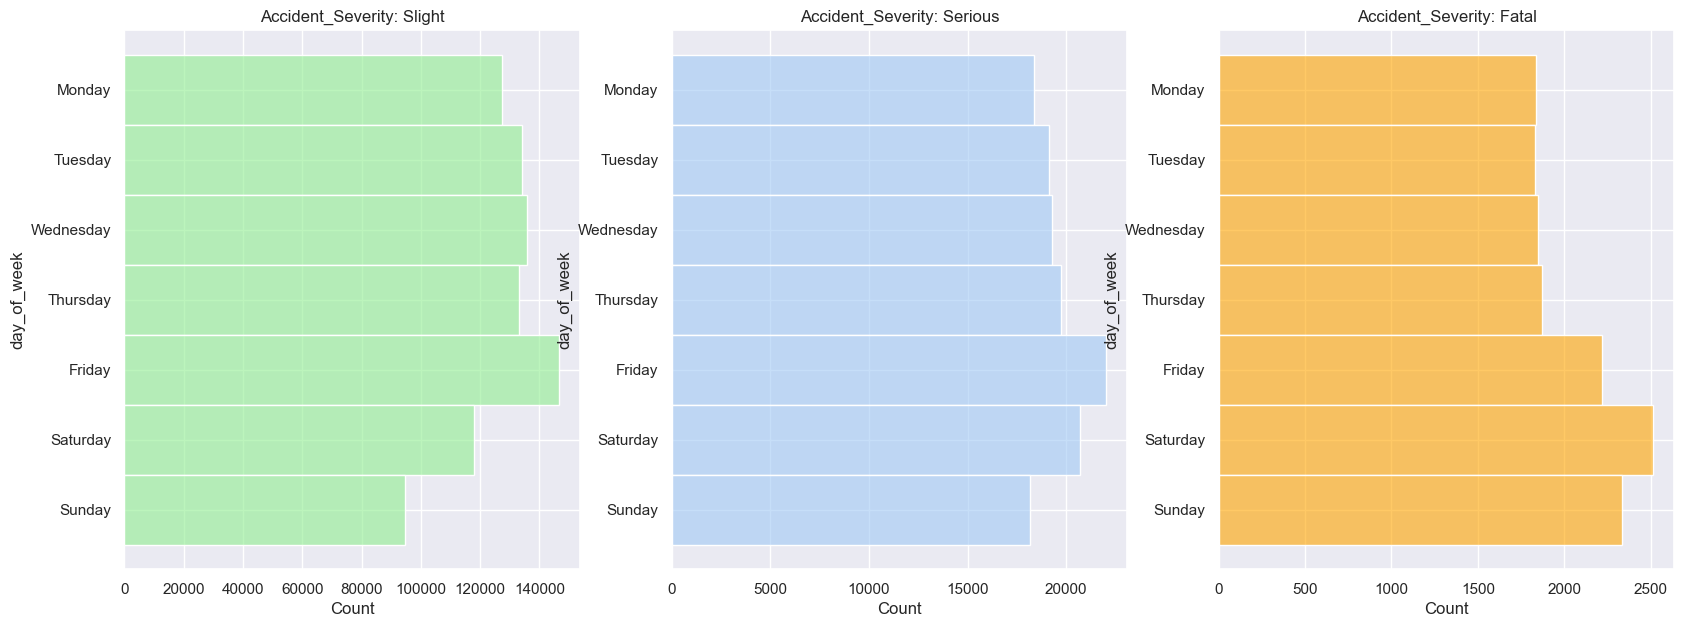

In [205]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='day_of_week', color='lightgreen',
             alpha=0.6, bins=7, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='day_of_week',
             alpha=0.6, bins=7, ax=ax[1]
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y='day_of_week', color='orange',
             alpha=0.6, bins=7, ax=ax[2]
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see from the visuals that Friday's have the highest rates of **'Slight'** and **'Serious'** RTC's with the exception of **'Fatal'** RTC's.  
  
**'Fatal'** RTC's peak on Saturdays and Sundays.

#### New Features - **'day'** and **'month'**
Lets create the two features, **'day'** and **'month'**.

In [206]:
df_accident["day"] = df_accident["date"].apply(lambda x:x.day)
df_accident["month"] = df_accident["date"].apply(lambda x:x.month)
df_accident['month'] = pd.to_datetime(
                                      df_accident['month'], format='%m'
                                     ).dt.month_name().str.slice(stop=3)
df_accident.shape

(1041013, 29)

### Feature - **'day'**
Here we can have a look at the day of the month to see what trends we may have.

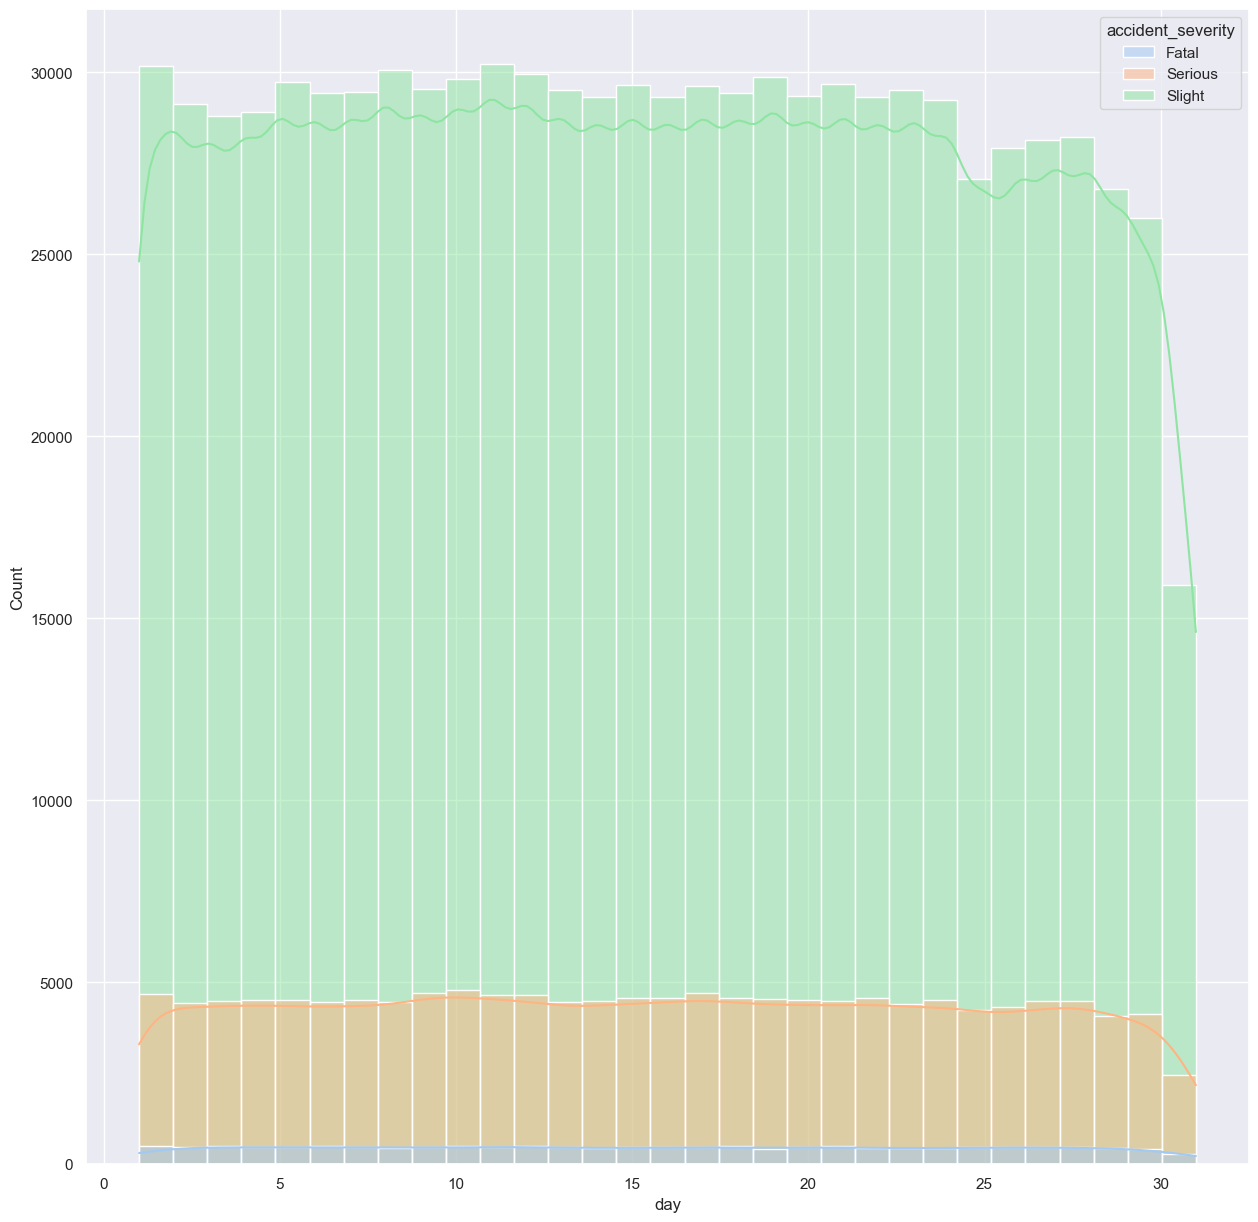

In [207]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='day',
                  palette='pastel', bins=31,
                  hue='accident_severity', kde=True
                  )

plt.show()

There is a very slight drop off from the 25th to the 30th of the month.  
  
The drop offs on the 31st is expected due to only being 7 per year.  
  
Lets see how **RTC** severity looks.

In [208]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             x='day', color='lightgreen',
             alpha=0.6, bins=31, ax=ax[0], kde=True,
             ).set(title=f"Accident_Severitx: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             x='day',
             alpha=0.6, bins=31, ax=ax[1], kde=True,
             ).set(title=f'Accident_Severitx: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             x='day', color='orange',
             alpha=0.6, bins=31, ax=ax[2], kde=True,
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

The visualisation of **RTC** severities does not reveal much.

### Feature - **'month'**

Lets check correlations against **'month'**.

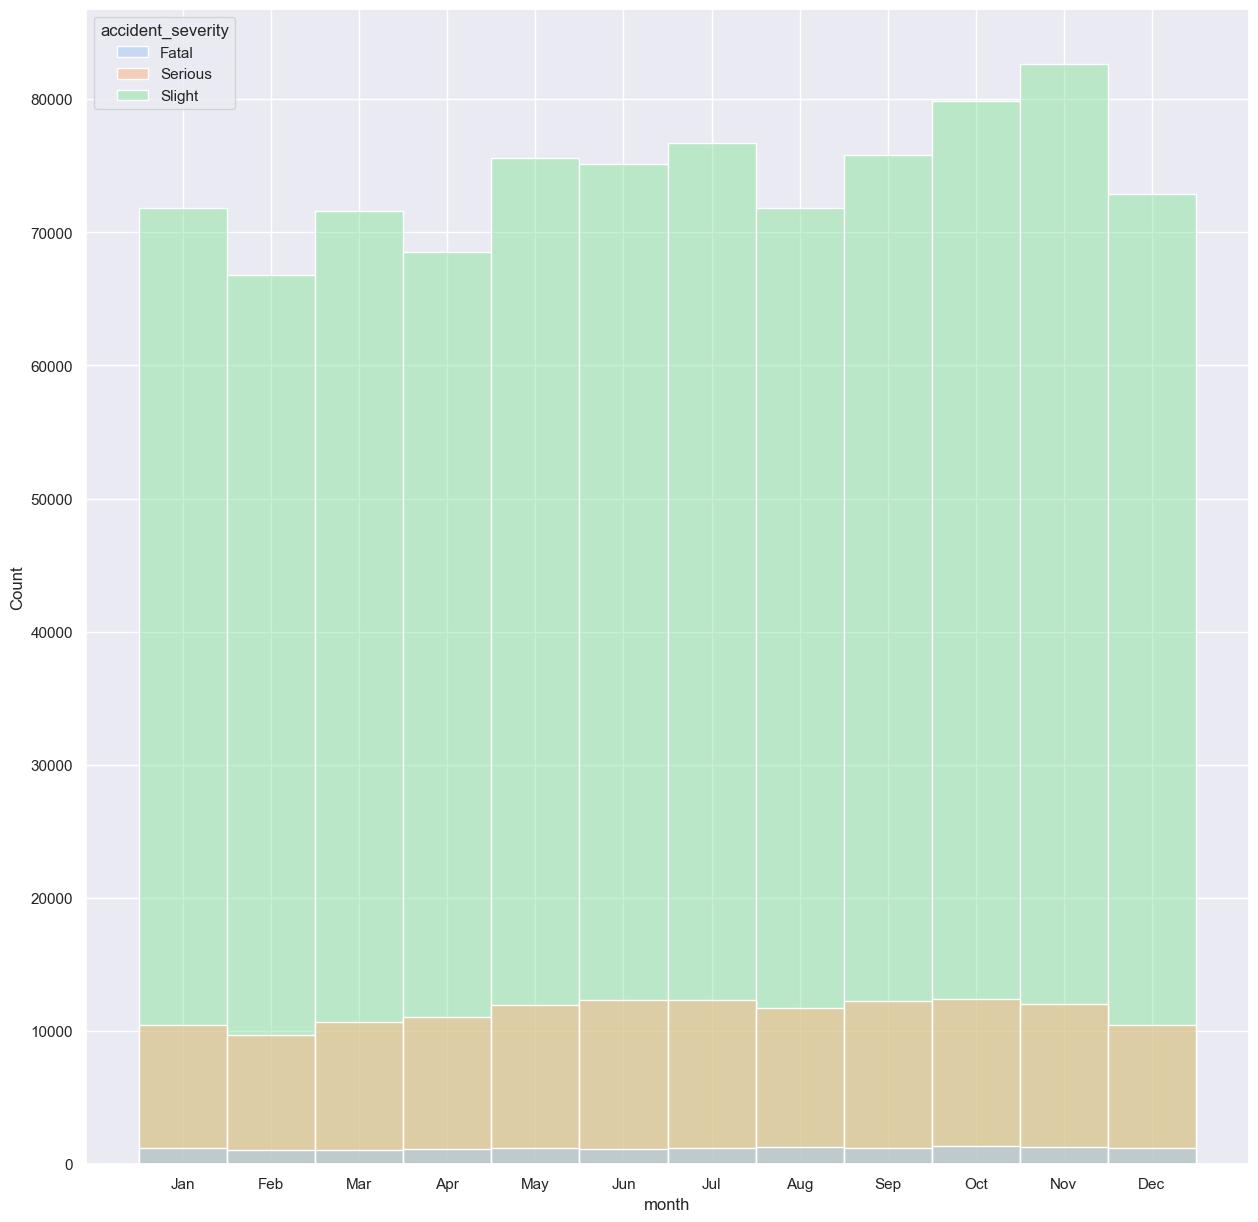

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='month',
                  palette='pastel', bins=12, hue='accident_severity'
                  )

plt.show()

We can see a rise leading towards the end of year, lets try and explore what is happening.  
  


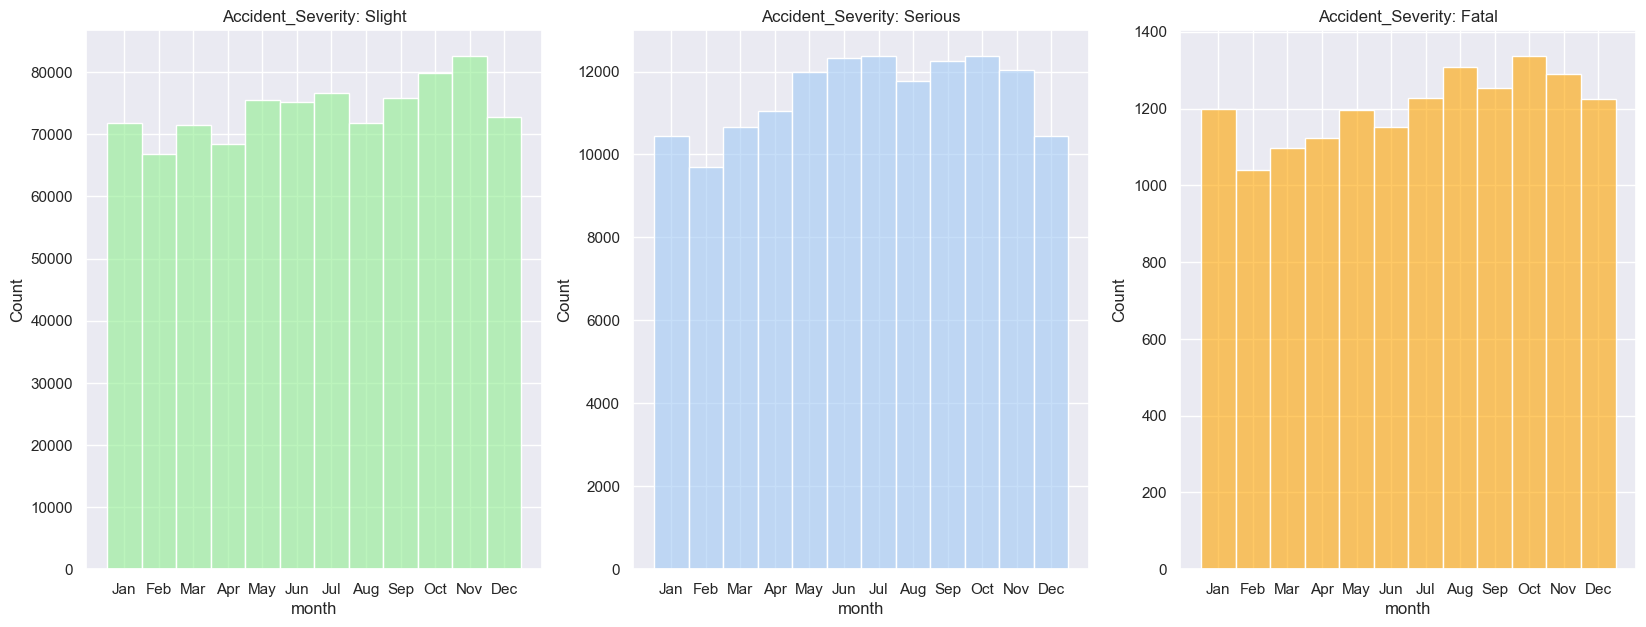

In [ ]:
df_accident.month = pd.Categorical(values=df_accident.month,
                                    categories=['Jan', 'Feb', 'Mar', 'Apr',
                                                'May', 'Jun', 'Jul',
                                                'Aug', 'Sep', 'Oct',
                                                'Nov', 'Dec'
                                                ]
                                    ) # Set the order for the columns
df_accident.sort_values(['month'])

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             x='month', color='lightgreen',
             alpha=0.6, bins=12, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             x='month',
             alpha=0.6, bins=12, ax=ax[1],
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             x='month', color='orange',
             alpha=0.6, bins=12, ax=ax[2],
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see from the visualisations that there is a upward trend heading towards the end of the year.  
  
We can note that January does see a rise..


#### New Feature **'season'**
Lets create a new feature **'season'** with values, **'Spring', 'Summer', 'Autumn', and 'Winter'** to see if we can reveal a trend.

### Feature - **'season'**

In [ ]:
df_accident["season"] = df_accident["month"].map({'Mar': "Spring", 'Apr': "Spring",
                                                  'May': "Spring", 'Jun': "Summer",
                                                  'Jul': "Summer", 'Aug': "Summer",
                                                  'Sep': "Autumn", 'Oct': "Autumn",
                                                  'Nov': "Autumn", 'Dec': "Winter",
                                                  'Jan': "Winter", 'Feb': "Winter"}
                                                 )
df_accident.shape

(1041013, 30)

Lets have a look at how the **RTC's** look.

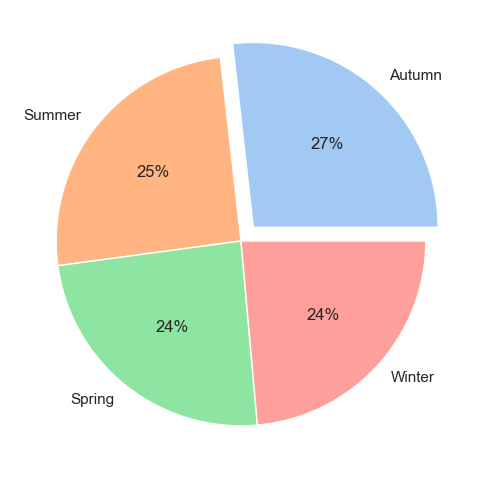

In [ ]:
data = df_accident['season'].value_counts()
labels = ['Autumn', 'Summer', 'Spring', 'Winter']
colors = sns.color_palette('pastel')[0:4]
explode = [0.1, 0, 0, 0]

plt.pie(
    data, labels = labels, colors = colors,
    explode=explode, autopct='%.0f%%'
)

plt.show()

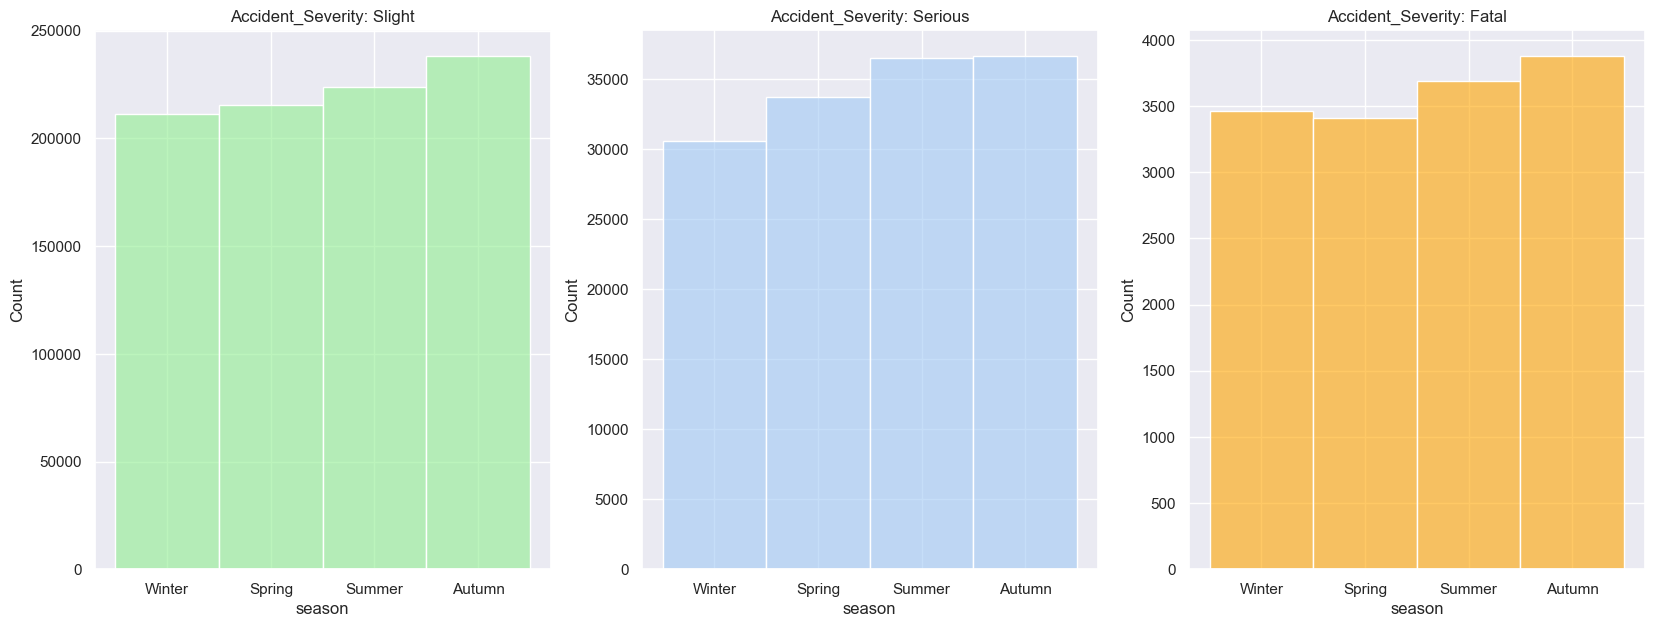

In [ ]:
df_accident.season = pd.Categorical(values=df_accident.season,
                                    categories=['Winter', 'Spring',
                                                'Summer', 'Autumn'
                                                ]
                                    ) # Set the order for the column as you want
df_accident.sort_values(['season']) # Sort the column

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             x='season', color='lightgreen',
             alpha=0.6, bins=50, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             x='season',
             alpha=0.6, bins=50, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             x='season', color='orange',
             alpha=0.6, bins=50, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()  ## and plot

We can see by the visualisations that there is an increase across all of the severities of an **RTC** drawing towards **'Autumn'**.  
  
As from our previous visualisation we can see **'Serious'** **RTC's** starting to peak in **'Summer'**  
  
**'Summer'** and **'Autumn'** have the most RTC's..

#### New Feature **'bank_holidays'**
Lets have a look to see if UK Bank Holidays have an impact.

### Feature - **'bank_holidays'**

Lets take a look at the bank holiday breaks.  
To do this we will create a function that takes in the date of the start and end of the break, for example, Mayday is on a Monday, so the start of the break would be the previous Saturday and the duration would be 3.

In [ ]:
def holidays(name, start, end, yr, days, svty):
    '''
    A function to compare average holiday RTC counts against
    average daily counts with percentage rise or fall

    Args:
        name (str): Name of the holiday, for example 'Easter'
        start (str): Start date of the holiday period. '%m/%d/%Y'
        end (str): End date of holiday period. '%m/%d/%Y'
        yr (int): year (range: 2005 - 2010)
        days (int): Length of holiday period
        svty (str): Severity (Slight, Serious, Fatal)
    '''
    holiday = len(
        df_accident[
            ((df_accident['accident_severity'] == svty)
            & (df_accident['date'] >= start))
            & ((df_accident['date'] <= end))
        ]
    ) / days
    severity = len(
        df_accident[
            ((df_accident['accident_severity'] ==  svty)
             & (df_accident['year'] == yr))
        ]
    ) / 365
    perc = (int(holiday) - int(severity)) / int(severity)

    print(
        'The average', svty, 'RTCs over', name, yr, 'were',
        int(holiday), 'per day.\nThe daily average for the year is',
        int(severity), 'fatal accidents per day, a change of ' f'{perc:.1%}\n'
    )

In [ ]:
holidays('Easter', '03/25/2005', '03/28/2005', 2005, 4, 'Fatal')
holidays('Easter', '04/14/2006', '04/17/2006', 2006, 4, 'Fatal')
holidays('Easter', '04/06/2007', '04/09/2007', 2007, 4, 'Fatal')
holidays('Easter', '03/21/2008', '03/24/2008', 2008, 4, 'Fatal')
holidays('Easter', '04/10/2009', '04/13/2009', 2009, 4, 'Fatal')
holidays('Easter', '04/02/2010', '04/05/2010', 2010, 4, 'Fatal')

The average Fatal RTCs over Easter 2005 were 9 per day.
The daily average for the year is 7 fatal accidents per day, a change of 28.6%

The average Fatal RTCs over Easter 2006 were 8 per day.
The daily average for the year is 7 fatal accidents per day, a change of 14.3%

The average Fatal RTCs over Easter 2007 were 5 per day.
The daily average for the year is 7 fatal accidents per day, a change of -28.6%

The average Fatal RTCs over Easter 2008 were 4 per day.
The daily average for the year is 6 fatal accidents per day, a change of -33.3%

The average Fatal RTCs over Easter 2009 were 7 per day.
The daily average for the year is 5 fatal accidents per day, a change of 40.0%

The average Fatal RTCs over Easter 2010 were 4 per day.
The daily average for the year is 4 fatal accidents per day, a change of 0.0%



As we can see there is an increase in **fatal RTC's** over the **'Easter'** period for 4 of the 6 years.  
Over the six years it is about a **8%** rise.

In [ ]:
holidays('Mayday', '04/30/2005', '05/02/2005', 2005, 3, 'Fatal')
holidays('Mayday', '04/29/2006', '05/01/2006', 2006, 3, 'Fatal')
holidays('Mayday', '05/05/2007', '05/07/2007', 2007, 3, 'Fatal')
holidays('Mayday', '05/03/2008', '05/05/2008', 2008, 3, 'Fatal')
holidays('Mayday', '05/02/2009', '05/04/2009', 2009, 3, 'Fatal')
holidays('Mayday', '05/01/2010', '05/03/2010', 2010, 3, 'Fatal')

The average Fatal RTCs over Mayday 2005 were 8 per day.
The daily average for the year is 7 fatal accidents per day, a change of 14.3%

The average Fatal RTCs over Mayday 2006 were 9 per day.
The daily average for the year is 7 fatal accidents per day, a change of 28.6%

The average Fatal RTCs over Mayday 2007 were 7 per day.
The daily average for the year is 7 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Mayday 2008 were 10 per day.
The daily average for the year is 6 fatal accidents per day, a change of 66.7%

The average Fatal RTCs over Mayday 2009 were 4 per day.
The daily average for the year is 5 fatal accidents per day, a change of -20.0%

The average Fatal RTCs over Mayday 2010 were 3 per day.
The daily average for the year is 4 fatal accidents per day, a change of -25.0%



As we can see there is an increase in **fatal RTC's** over the **'Mayday'** period for 3 of the 6 years.  
Over the six years it is about a **10%** rise.

In [ ]:
holidays('Spring', '05/26/2005', '05/28/2005', 2005, 3, 'Fatal')
holidays('Spring', '05/25/2006', '05/27/2006', 2006, 3, 'Fatal')
holidays('Spring', '05/24/2007', '05/26/2007', 2007, 3, 'Fatal')
holidays('Spring', '05/22/2008', '05/24/2008', 2008, 3, 'Fatal')
holidays('Spring', '05/21/2009', '05/23/2009', 2009, 3, 'Fatal')
holidays('Spring', '05/27/2010', '05/29/2010', 2010, 3, 'Fatal')

The average Fatal RTCs over Spring 2005 were 9 per day.
The daily average for the year is 7 fatal accidents per day, a change of 28.6%

The average Fatal RTCs over Spring 2006 were 5 per day.
The daily average for the year is 7 fatal accidents per day, a change of -28.6%

The average Fatal RTCs over Spring 2007 were 9 per day.
The daily average for the year is 7 fatal accidents per day, a change of 28.6%

The average Fatal RTCs over Spring 2008 were 4 per day.
The daily average for the year is 6 fatal accidents per day, a change of -33.3%

The average Fatal RTCs over Spring 2009 were 5 per day.
The daily average for the year is 5 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Spring 2010 were 5 per day.
The daily average for the year is 4 fatal accidents per day, a change of 25.0%



As we can see there is an increase in **fatal RTC's** over the **'Spring'** period for 3 of the 6 years.  
Over the six years it is about a **3%** rise.

In [ ]:
holidays('Summer Break', '08/28/2005', '08/30/2005', 2005, 3, 'Fatal')
holidays('Summer Break', '08/26/2006', '08/28/2006', 2006, 3, 'Fatal')
holidays('Summer Break', '08/25/2007', '08/27/2007', 2007, 3, 'Fatal')
holidays('Summer Break', '08/23/2008', '08/25/2008', 2008, 3, 'Fatal')
holidays('Summer Break', '08/29/2009', '08/31/2009', 2009, 3, 'Fatal')
holidays('Summer Break', '08/28/2010', '08/30/2010', 2010, 3, 'Fatal')

The average Fatal RTCs over Summer Break 2005 were 7 per day.
The daily average for the year is 7 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Summer Break 2006 were 13 per day.
The daily average for the year is 7 fatal accidents per day, a change of 85.7%

The average Fatal RTCs over Summer Break 2007 were 12 per day.
The daily average for the year is 7 fatal accidents per day, a change of 71.4%

The average Fatal RTCs over Summer Break 2008 were 5 per day.
The daily average for the year is 6 fatal accidents per day, a change of -16.7%

The average Fatal RTCs over Summer Break 2009 were 7 per day.
The daily average for the year is 5 fatal accidents per day, a change of 40.0%

The average Fatal RTCs over Summer Break 2010 were 5 per day.
The daily average for the year is 4 fatal accidents per day, a change of 25.0%



As we can see there is an increase in **fatal RTC's** over the **'Summer Bank Holiday'** period for 4 of the 6 years.  
Over the six years it is about a **34%** rise.

In [ ]:
holidays('Christmas and New Year', '12/24/2005', '01/02/2006', 2006, 10, 'Fatal')
holidays('Christmas and New Year', '12/23/2006', '01/01/2007', 2007, 10, 'Fatal')
holidays('Christmas and New Year', '12/25/2007', '01/01/2008', 2008, 8, 'Fatal')
holidays('Christmas and New Year', '12/25/2008', '01/01/2009', 2009, 8, 'Fatal')
holidays('Christmas and New Year', '12/25/2009', '01/01/2010', 2010, 8, 'Fatal')

The average Fatal RTCs over Christmas and New Year 2006 were 6 per day.
The daily average for the year is 7 fatal accidents per day, a change of -14.3%

The average Fatal RTCs over Christmas and New Year 2007 were 7 per day.
The daily average for the year is 7 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Christmas and New Year 2008 were 4 per day.
The daily average for the year is 6 fatal accidents per day, a change of -33.3%

The average Fatal RTCs over Christmas and New Year 2009 were 5 per day.
The daily average for the year is 5 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Christmas and New Year 2010 were 2 per day.
The daily average for the year is 4 fatal accidents per day, a change of -50.0%



As we can see there is an decrease in **fatal RTC's** over the **'Christmas and New Year'** period for 3 of the 5 years.  
Over the six years it is about a **19%** reduction. (excluded 2005 as not a full period and does not include Christmas 2010)

### Feature - **'junction_detail'**

Lets check the the data type and values.

In [ ]:
df_accident['junction_detail'].dtype

CategoricalDtype(categories=['Crossroads', 'Data missing or out of range',
                  'Mini-roundabout', 'More than 4 arms (not roundabout)',
                  'Not at junction or within 20 metres', 'Other junction',
                  'Private drive or entrance', 'Roundabout', 'Slip road',
                  'T or staggered junction'],
, ordered=False)

In [ ]:
df_accident['junction_detail'].value_counts(dropna=False, ascending=False)

Not at junction or within 20 metres    425588
T or staggered junction                317572
Crossroads                              97946
Roundabout                              88761
Private drive or entrance               36773
Other junction                          33539
Slip road                               15495
More than 4 arms (not roundabout)       15363
Mini-roundabout                          9972
Data missing or out of range                4
Name: junction_detail, dtype: int64

We appear to have a nice set of values with the exception of **'Data missing or out of range'**.  
  
As there are only four of these, we will replace with them with the `mode` (Not at junction or within 20 metres).

In [ ]:
df_accident['junction_detail'].replace('Data missing or out of range', 'Not at junction or within 20 metres', inplace=True)
df_accident['junction_detail'].value_counts(dropna=False, ascending=False)

Not at junction or within 20 metres    425592
T or staggered junction                317572
Crossroads                              97946
Roundabout                              88761
Private drive or entrance               36773
Other junction                          33539
Slip road                               15495
More than 4 arms (not roundabout)       15363
Mini-roundabout                          9972
Name: junction_detail, dtype: int64

Lets visualise the data.

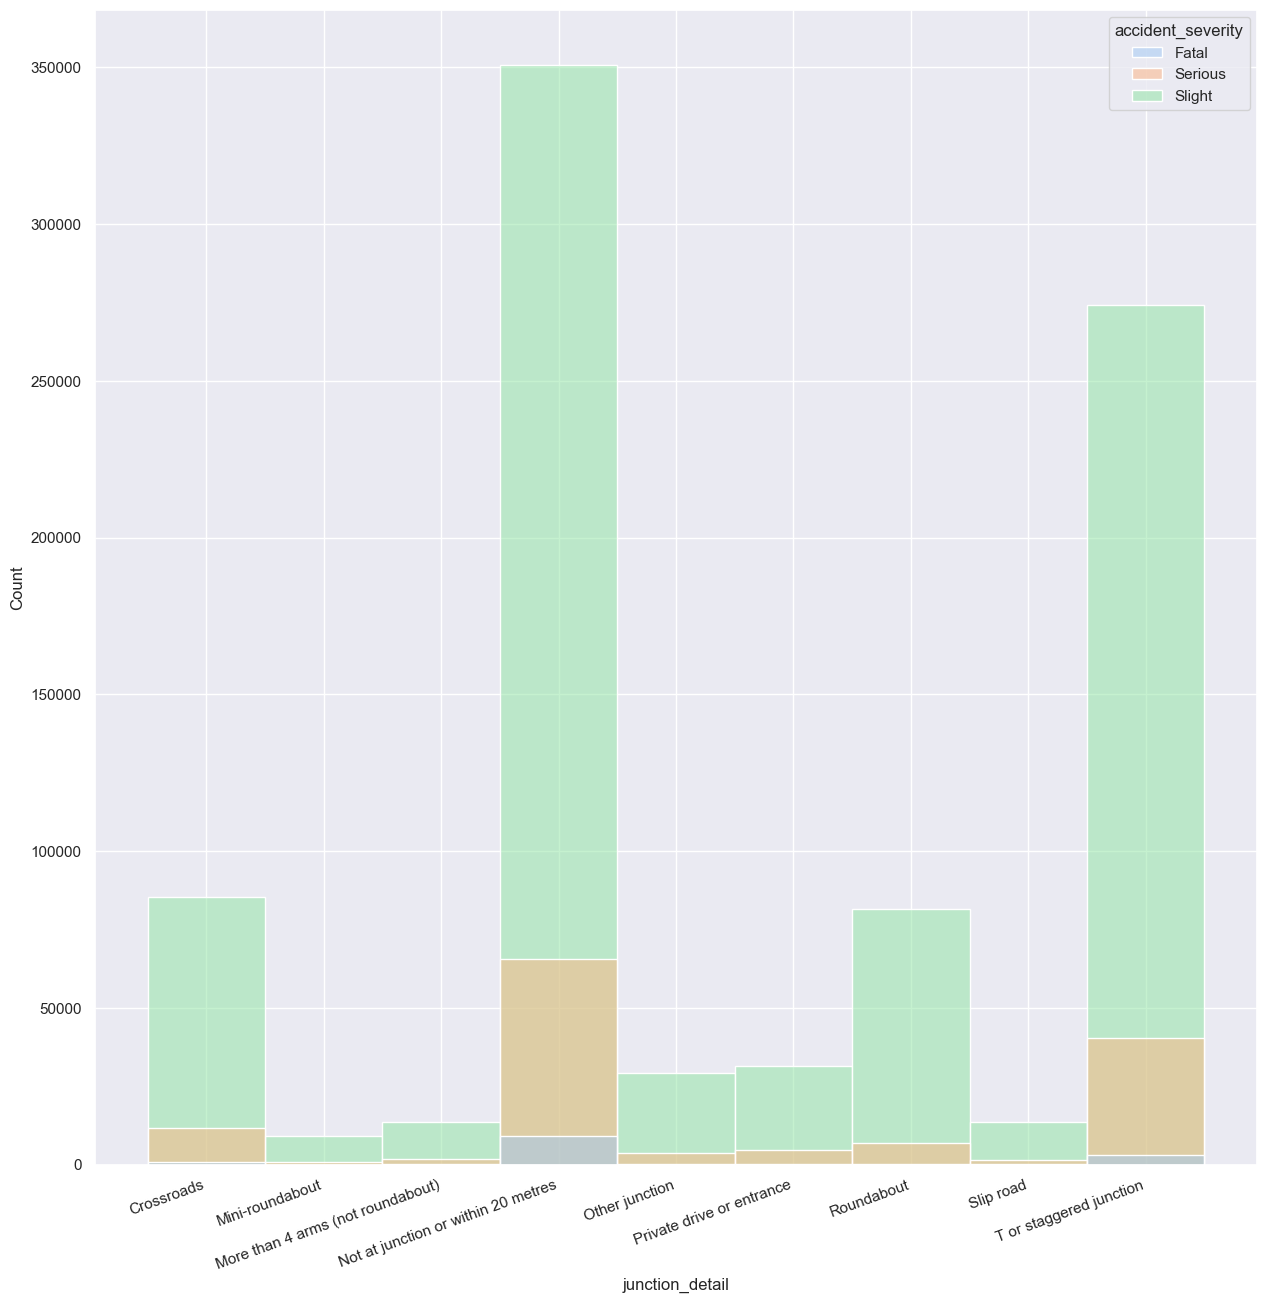

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='junction_detail', bins=5, hue='accident_severity')

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
plt.show()


We can see that **RTC's** are more inclined to happen **'Not at junction or within 20 metres'** or **'T or staggered junction'**.  
  
**'Serious'** and **'Fatal'** **'RTC's'** are also more inclined to happen at these junction types.

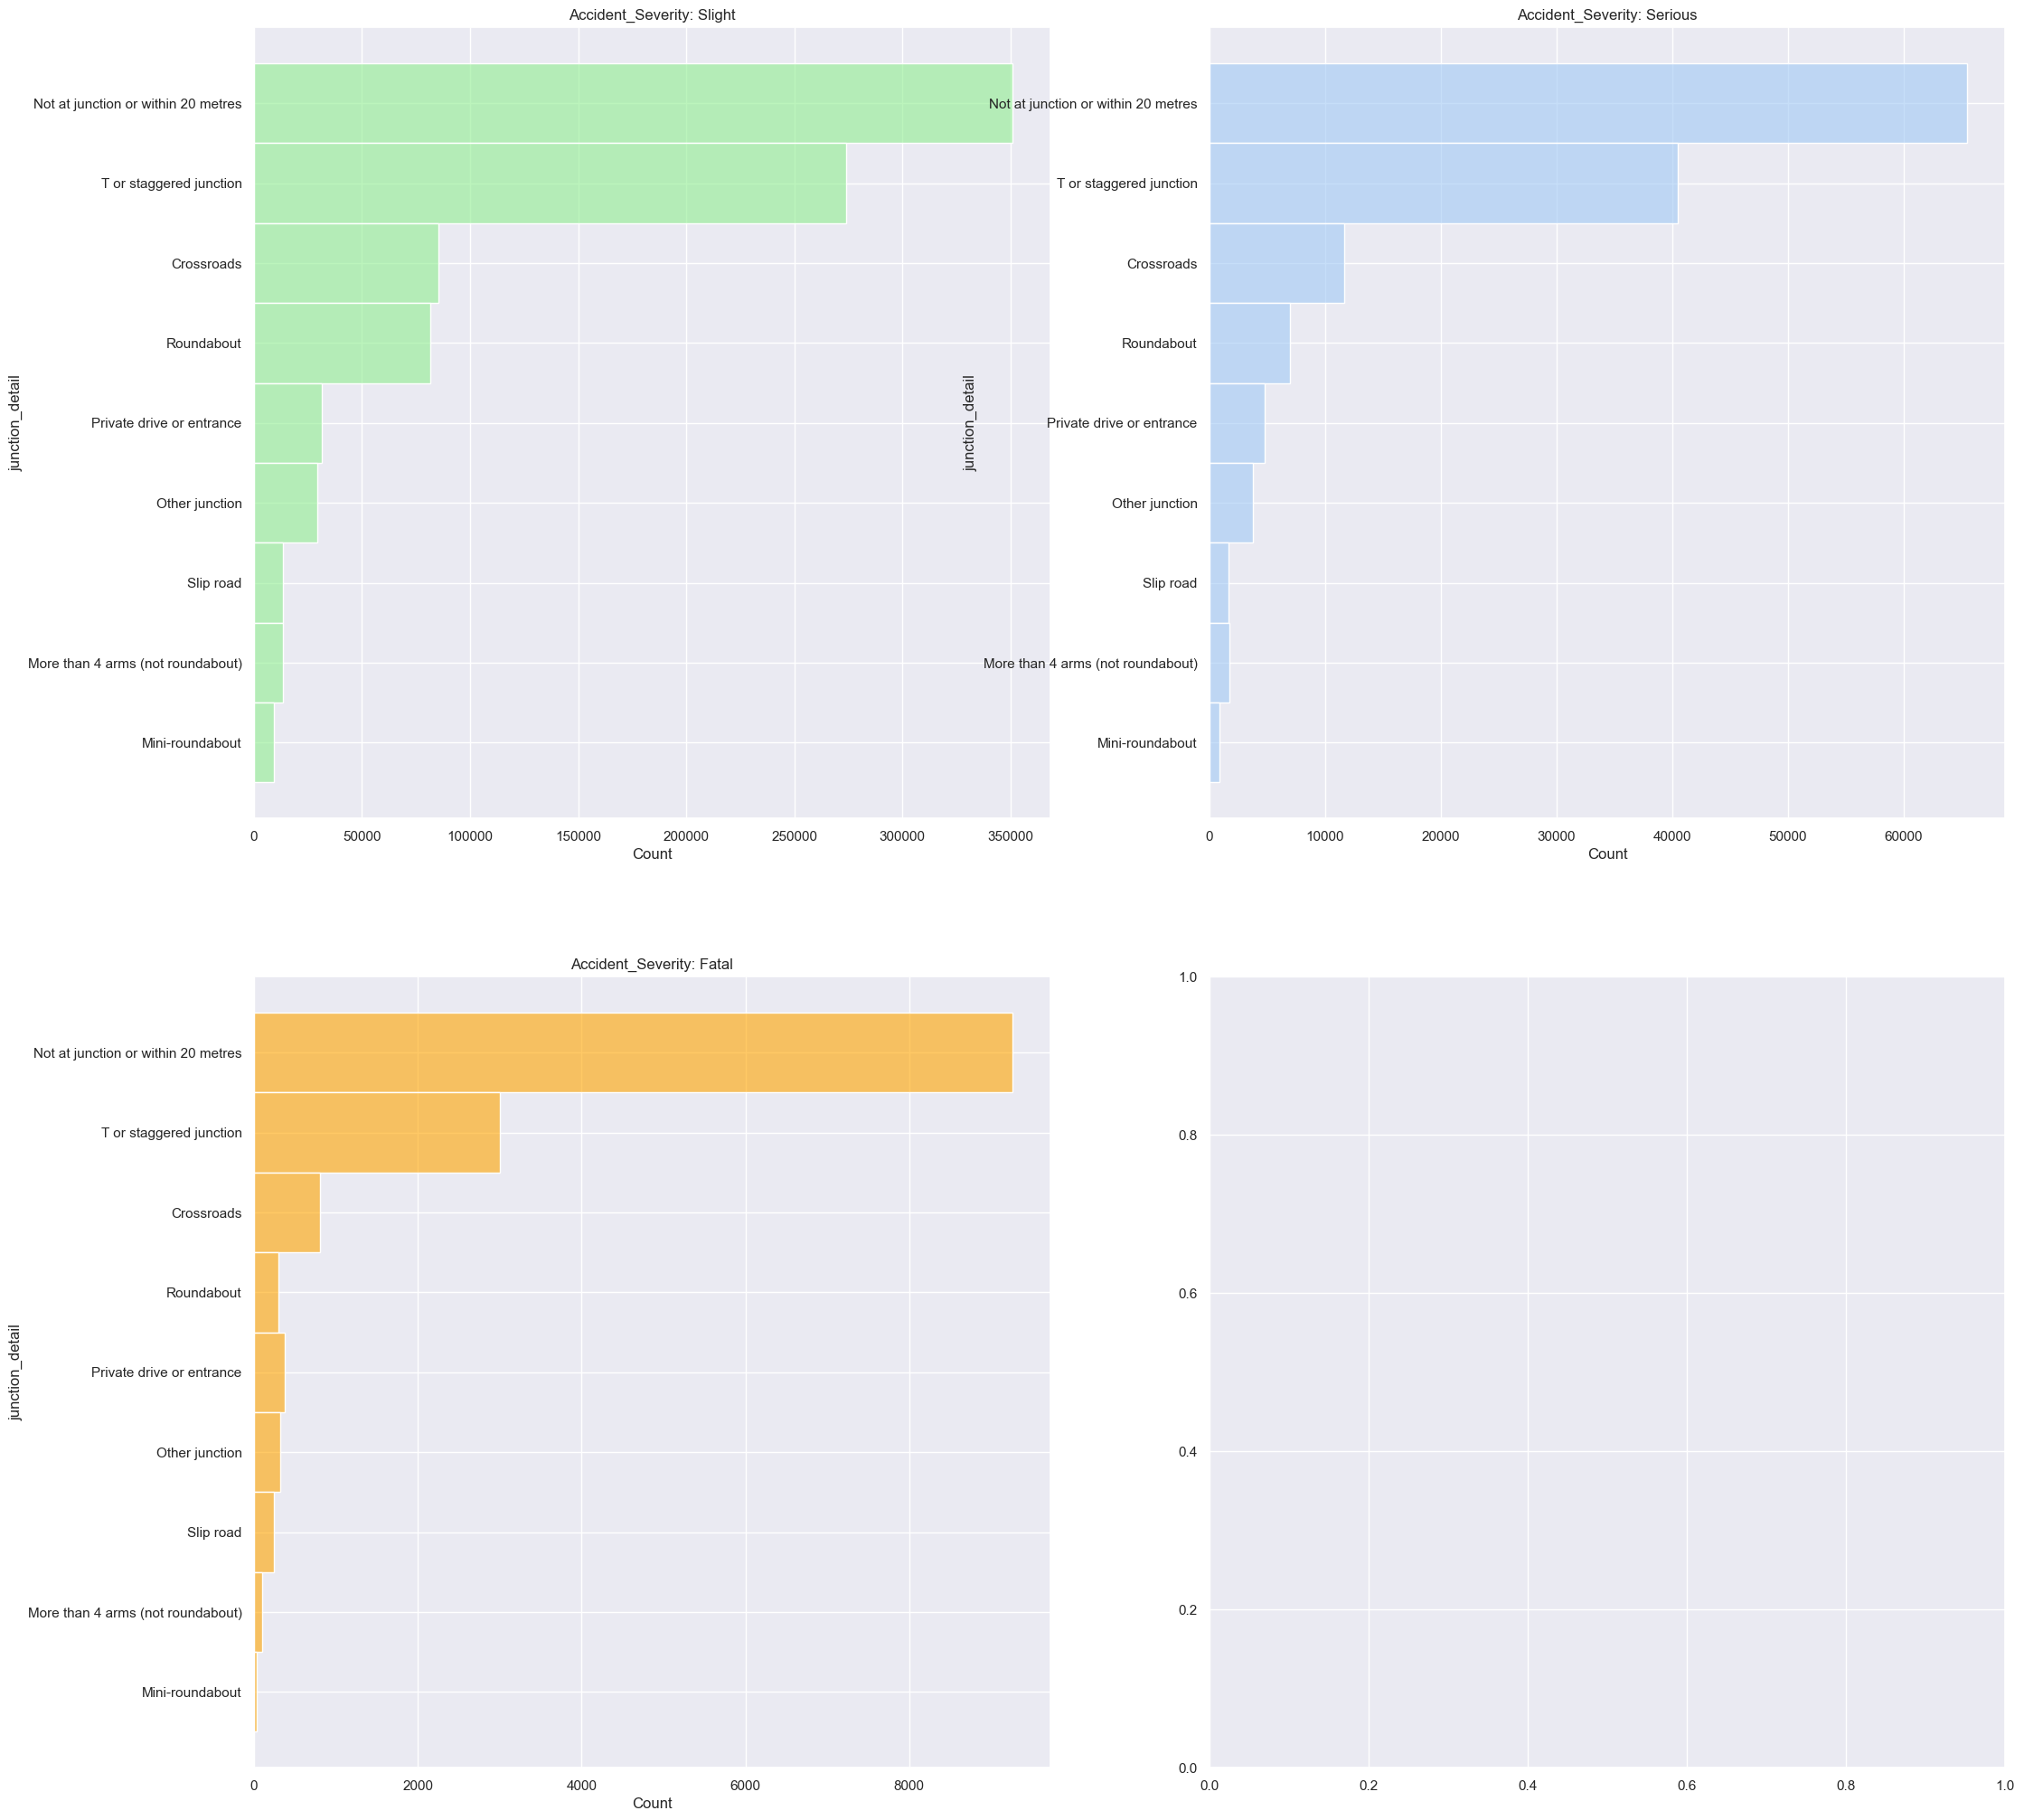

In [ ]:
df_accident.junction_detail = pd.Categorical(values=df_accident.junction_detail,
                                             categories=[
                                                'Not at junction or within 20 metres',
                                                'T or staggered junction',
                                                'Crossroads',
                                                'Roundabout',
                                                'Private drive or entrance',
                                                'Other junction',
                                                'Slip road',
                                                'More than 4 arms (not roundabout)',
                                                'Mini-roundabout',
                                                'Authorised person'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['junction_detail']) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 25))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='junction_detail', color='lightgreen',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='junction_detail',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='junction_detail', color='orange',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'junction_control'**

Lets check the data type and values.

In [ ]:
df_accident['junction_control'].dtype

CategoricalDtype(categories=['Authorised person', 'Auto traffic sigl',
                  'Auto traffic signal', 'Data missing or out of range',
                  'Give way or uncontrolled',
                  'Not at junction or within 20 metres', 'Stop sign'],
, ordered=False)

In [ ]:
df_accident['junction_control'].value_counts(dropna=False, ascending=False)

Give way or uncontrolled               500073
Data missing or out of range           350899
Auto traffic signal                    104829
Not at junction or within 20 metres     76009
Stop sign                                7063
Authorised person                        1807
Auto traffic sigl                         333
Name: junction_control, dtype: int64

We appear to have two similar features **'Auto traffic signal'** and **'Auto traffic sigl'**. This appears to be a typo so lets merge the values.  
  
We also have two values, **'Not at junction or within 20 metres'** and **'Data missing or out of range'**. The Police reporting form only has four options:
- Give way or uncontrolled
- Auto traffic signal
- Stop sign
- Authorised person

We will assume that the absence of an entry on the form indicates none of the four options were valid.  
  
Lets merge **'Data missing or out of range'** with **'Not at junction or within 20 metres'**.

In [ ]:
df_accident[
      "junction_control"
] = df_accident[
      "junction_control"
].map({"Auto traffic sigl": "Auto traffic signal"}
      ).fillna(df_accident["junction_control"])

df_accident[
      "junction_control"
] = df_accident[
      "junction_control"
].map({"Data missing or out of range": "Not at junction or within 20 metres"}
      ).fillna(df_accident["junction_control"])

df_accident['junction_control'].value_counts(dropna=False, ascending=False)

Give way or uncontrolled               500073
Not at junction or within 20 metres    426908
Auto traffic signal                    105162
Stop sign                                7063
Authorised person                        1807
Name: junction_control, dtype: int64

Now we have cleaned up the feature lets see how this looks against **'Severity'**.

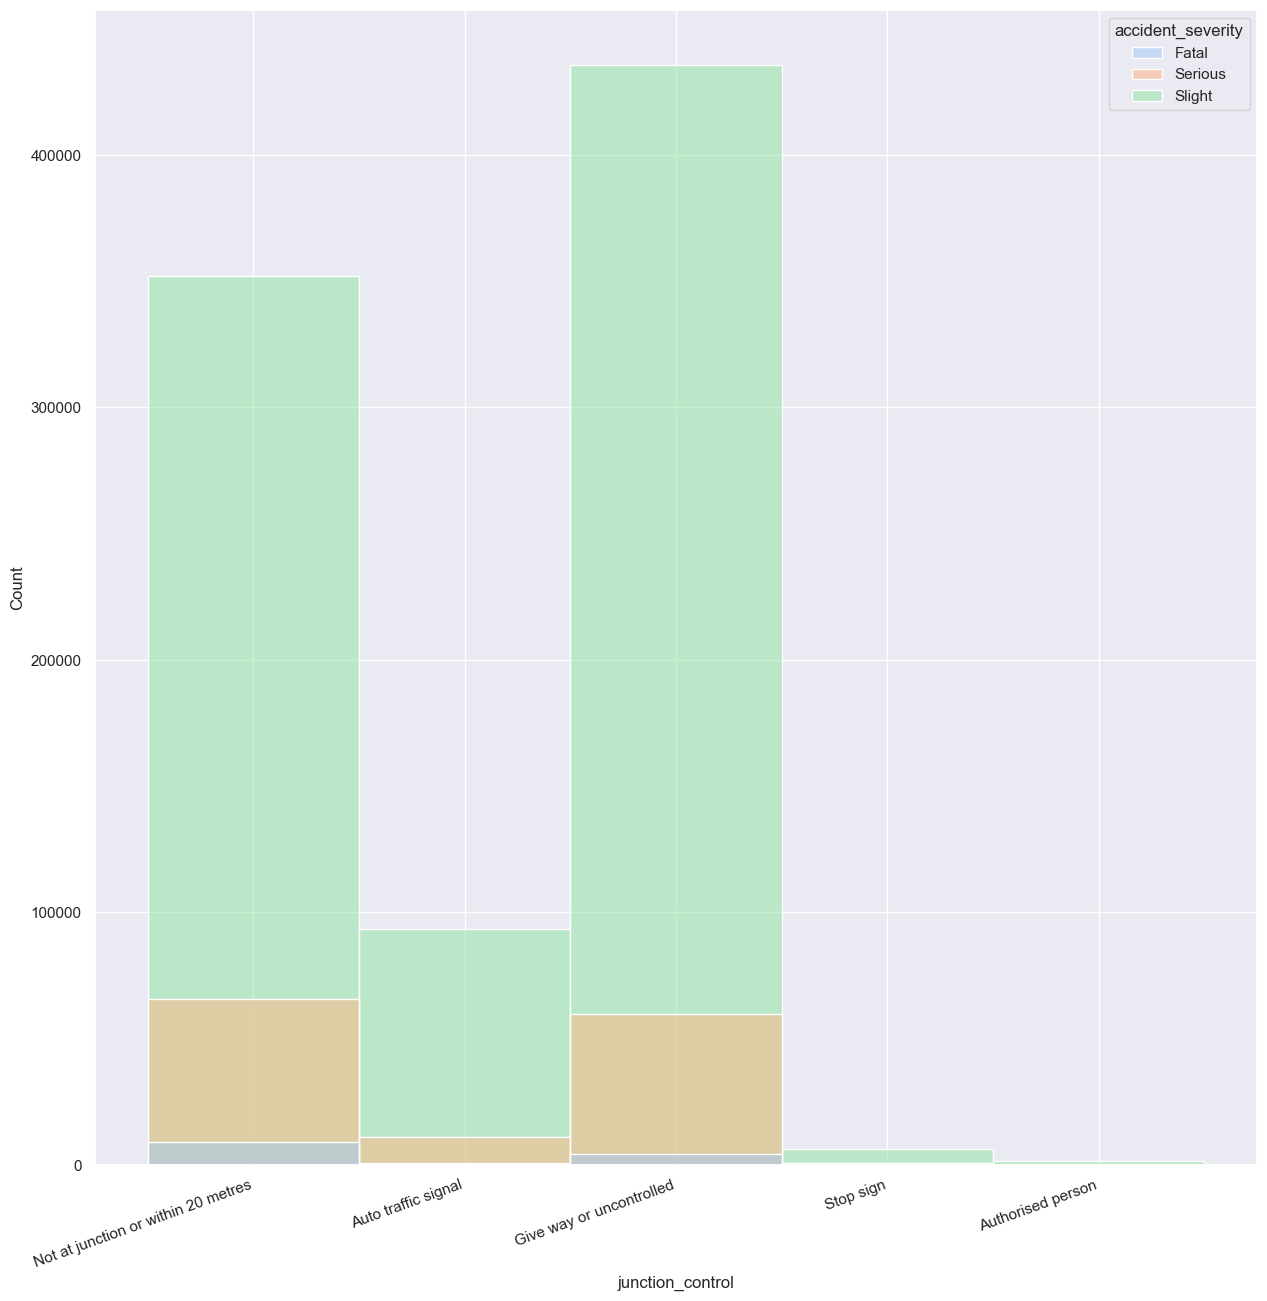

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.histplot(
    data=df_accident, x='junction_control',
    bins=5, hue='accident_severity'
    )

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that most **RTC's** happen at a **'give way'** or **'uncontrolled junction'**.  
  
Lets check individual values against **'severity'**.

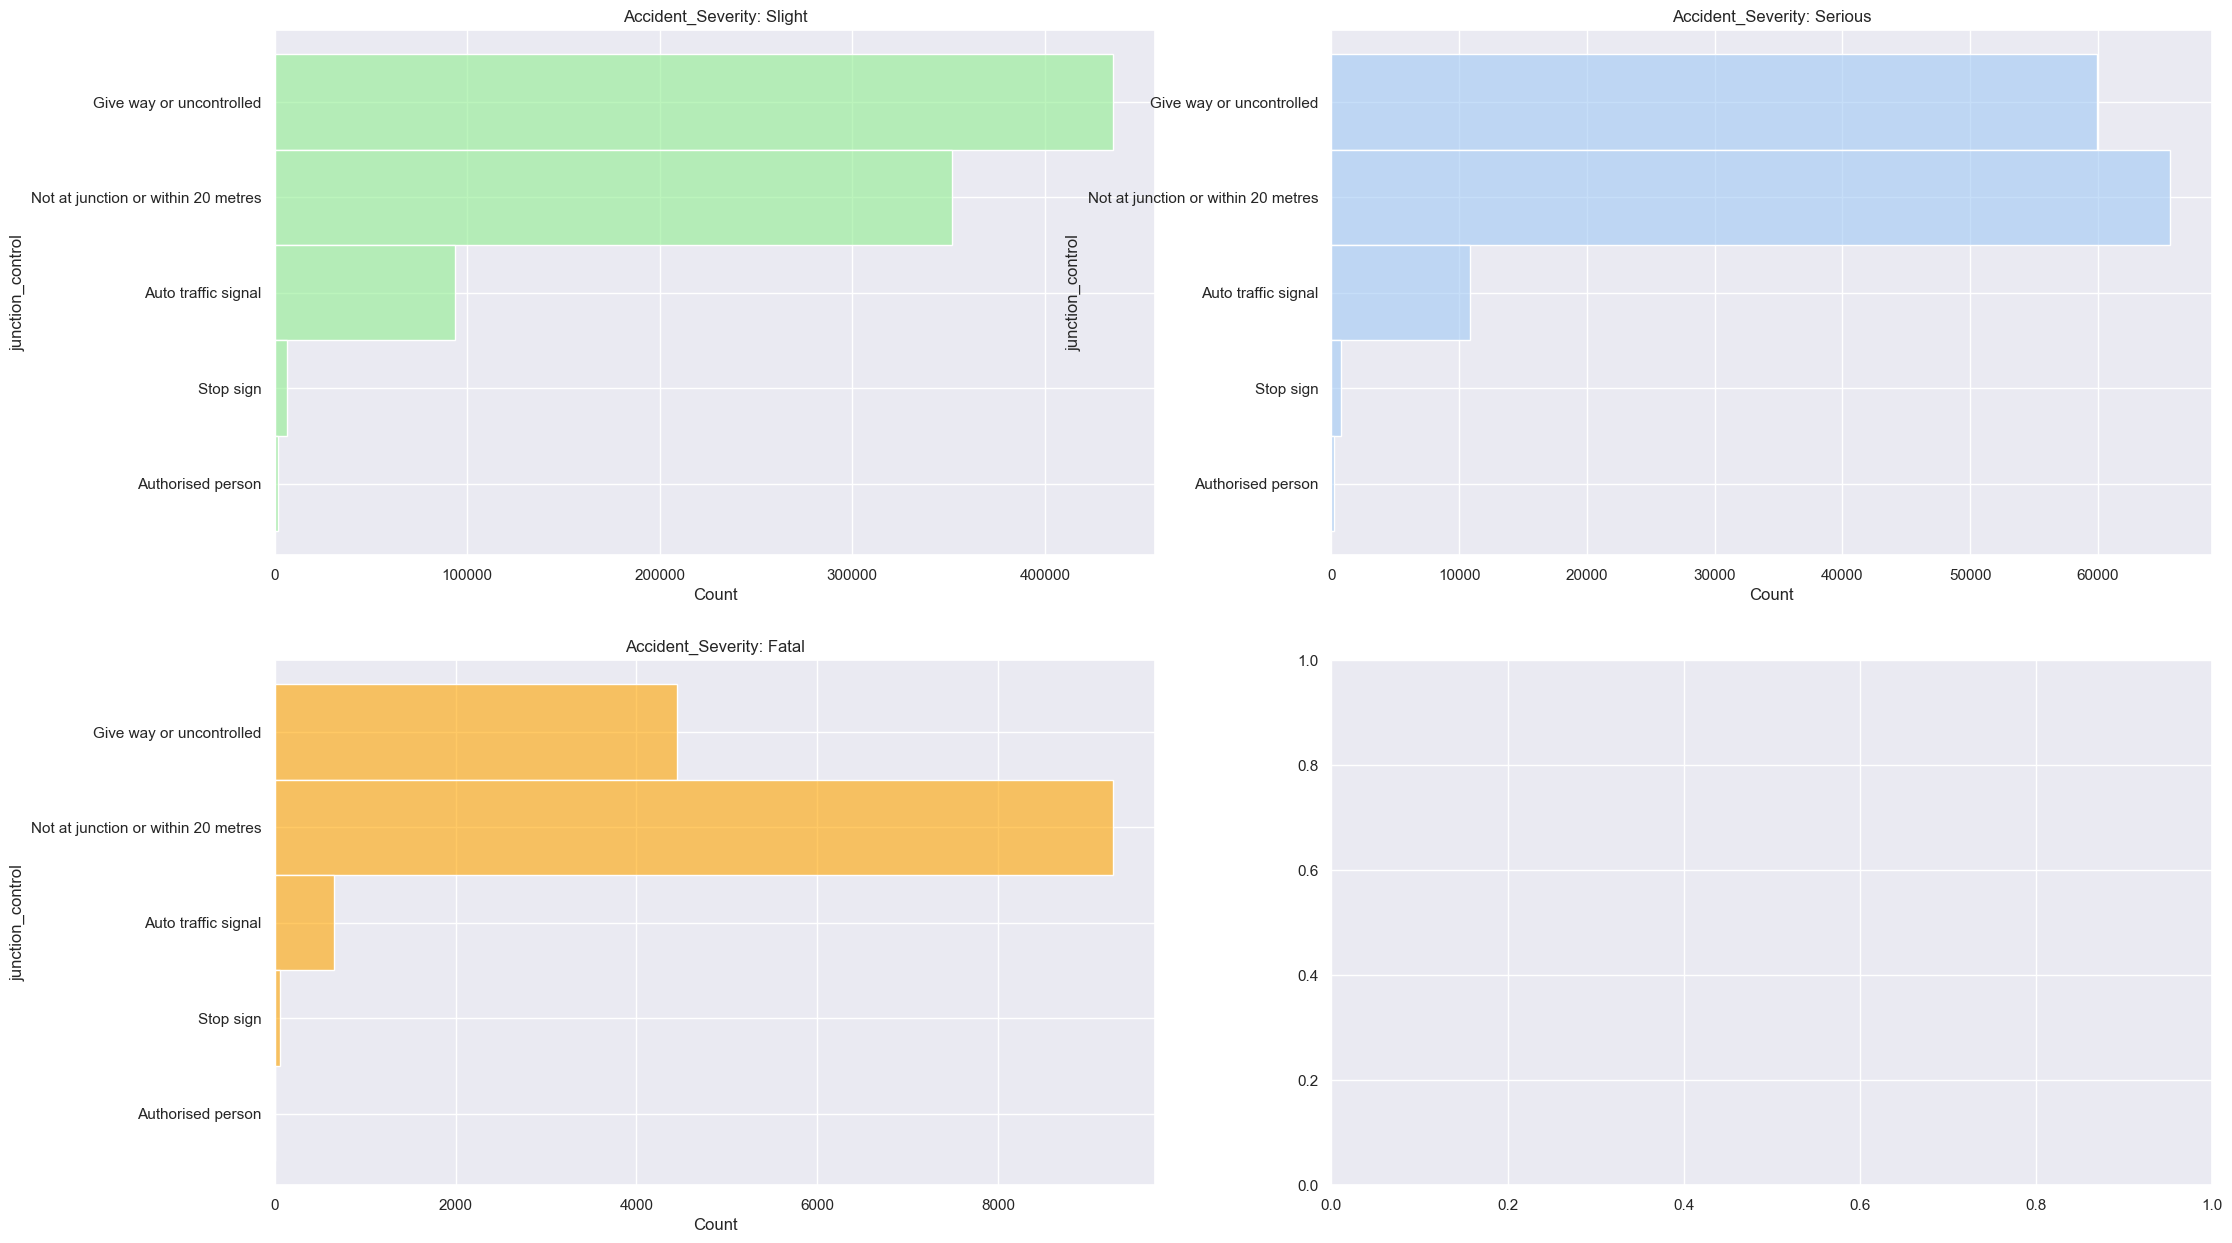

In [ ]:
df_accident.junction_control = pd.Categorical(
       values=df_accident.junction_control,
       categories=['Give way or uncontrolled',
                   'Not at junction or within 20 metres',
                   'Auto traffic signal',
                   'Stop sign',
                   'Authorised person'
                  ]
) # Set the order for the column
df_accident.sort_values(['junction_control']) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='junction_control', color='lightgreen',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='junction_control',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='junction_control', color='orange',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

Lets have a look at the correlations between **'junction_control'** and **'junction_detail'**.

In [ ]:
df_accident.groupby('junction_control')['junction_detail'].value_counts(ascending=True)

junction_control                                                        
Give way or uncontrolled             Authorised person                           0
                                     Not at junction or within 20 metres        48
                                     More than 4 arms (not roundabout)        6188
                                     Mini-roundabout                          9757
                                     Slip road                               14406
                                     Other junction                          28656
                                     Private drive or entrance               35179
                                     Crossroads                              47203
                                     Roundabout                              78688
                                     T or staggered junction                279948
Not at junction or within 20 metres  Mini-roundabout                             0
              

We can see some anomalies in the **Not at junction or within 20 metres** values.  
  
As stated in the Police instructions if **Not at junction or within 20 metres** is selected then **no** options in **junction_detail** should be selected.


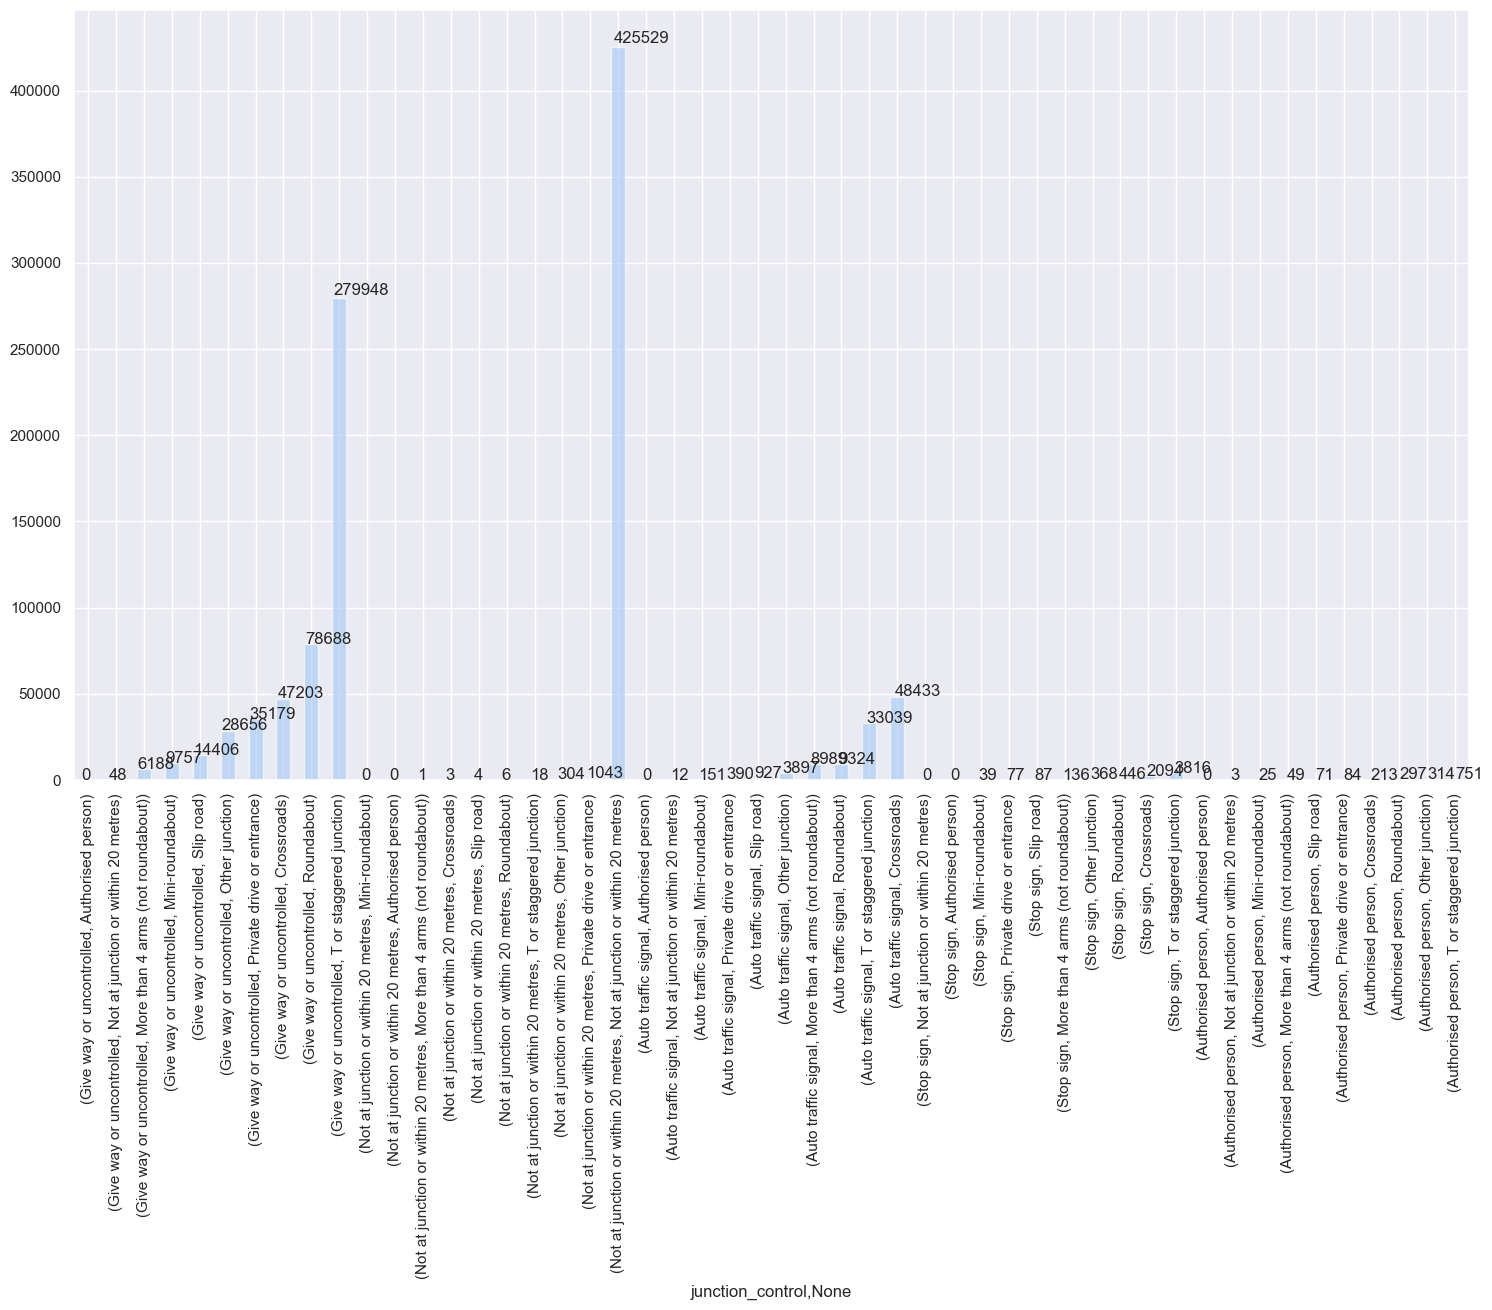

In [ ]:
plt.figure(figsize=(18,10))

ax = df_accident.groupby(
    'junction_control'
)['junction_detail'].value_counts(ascending=True).plot(kind='bar', alpha=0.6)
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)
                )

plt.show()

We can see two areas of concern here, **Not at junction or within 20 metres** and **Give way or uncontrolled**.  
  
**Not at junction or within 20 metres** and **Not at junction or within 20 metres** have the highest correlation as expected.  
  
**Give way or uncontrolled** and **T or staggered junction** also have a high correlation.  
  
The junction type with the highest number of accidents is **T or staggered junction**.



### Feature - **'carriageway_hazards'**

In [ ]:
df_accident['carriageway_hazards'].value_counts(dropna=False,ascending=False)

None                                               1021486
Other object on road                                  8865
Any animal in carriageway (except ridden horse)       5591
Pedestrian in carriageway - not injured               2227
Previous accident                                     1717
Vehicle load on road                                  1127
Name: carriageway_hazards, dtype: int64

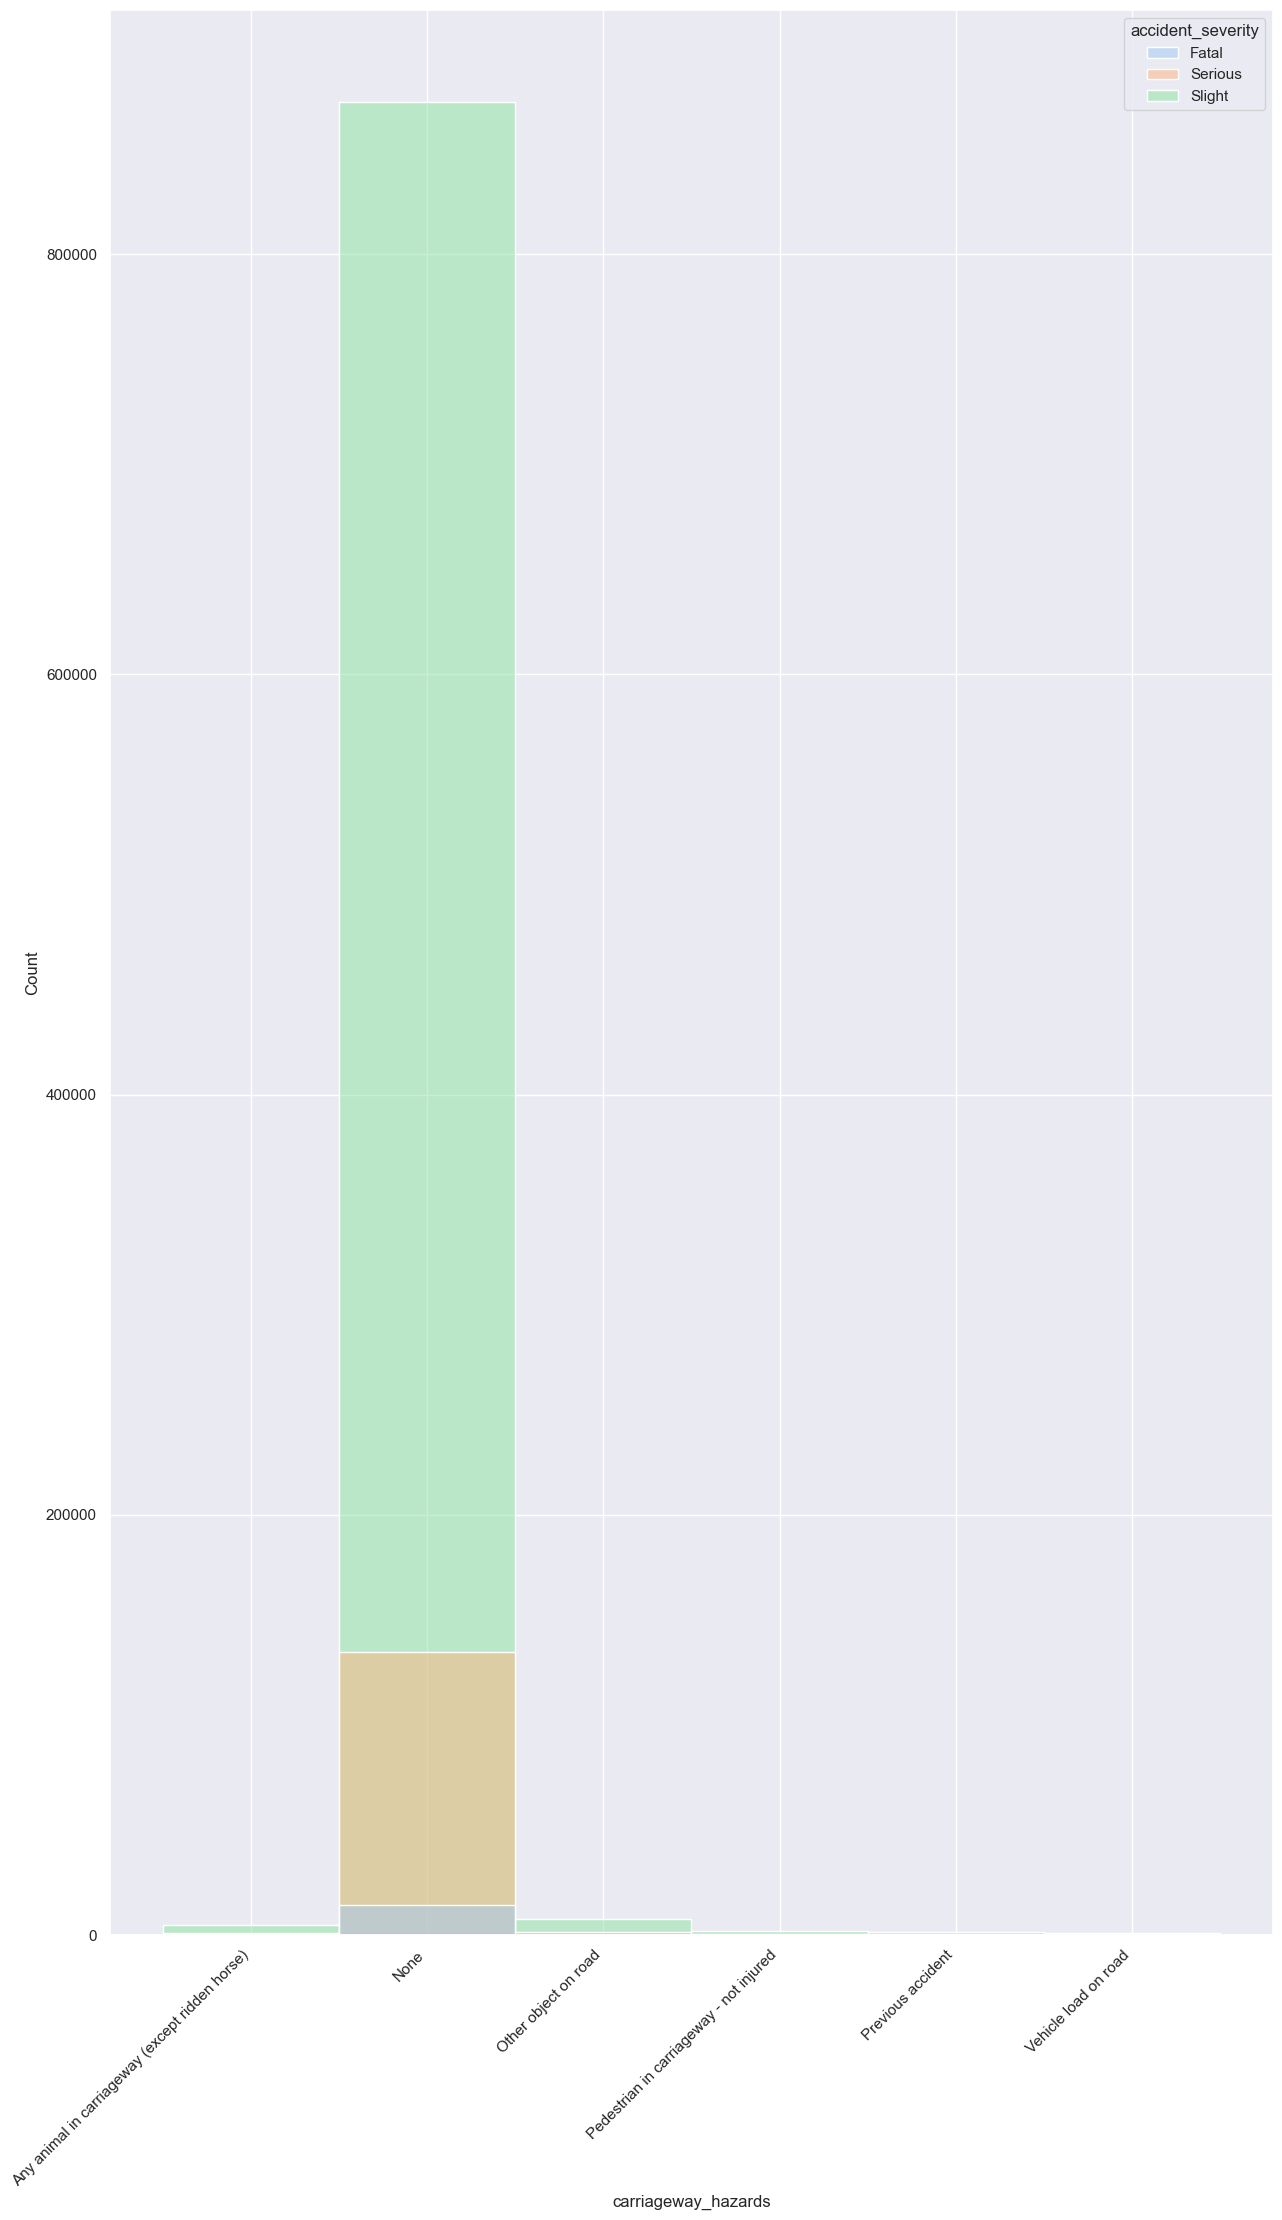

In [ ]:
plt.figure(figsize=(15,25))
ax = sns.histplot(data=df_accident,
                  x='carriageway_hazards',
                  hue='accident_severity'
                  )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that most RTC's happen when there are no carriageway hazards.  
  
Lets take a look at each carriageway hazard to see if we can uncover anything.

In [ ]:
df_accident.groupby('carriageway_hazards')['accident_severity'].value_counts(ascending=True)

carriageway_hazards                                     
Any animal in carriageway (except ridden horse)  Fatal          47
                                                 Serious       732
                                                 Slight       4812
None                                             Fatal       14122
                                                 Serious    134782
                                                 Slight     872582
Other object on road                             Fatal         156
                                                 Serious      1256
                                                 Slight       7453
Pedestrian in carriageway - not injured          Fatal          31
                                                 Serious       242
                                                 Slight       1954
Previous accident                                Fatal          72
                                                 Serious       257
     

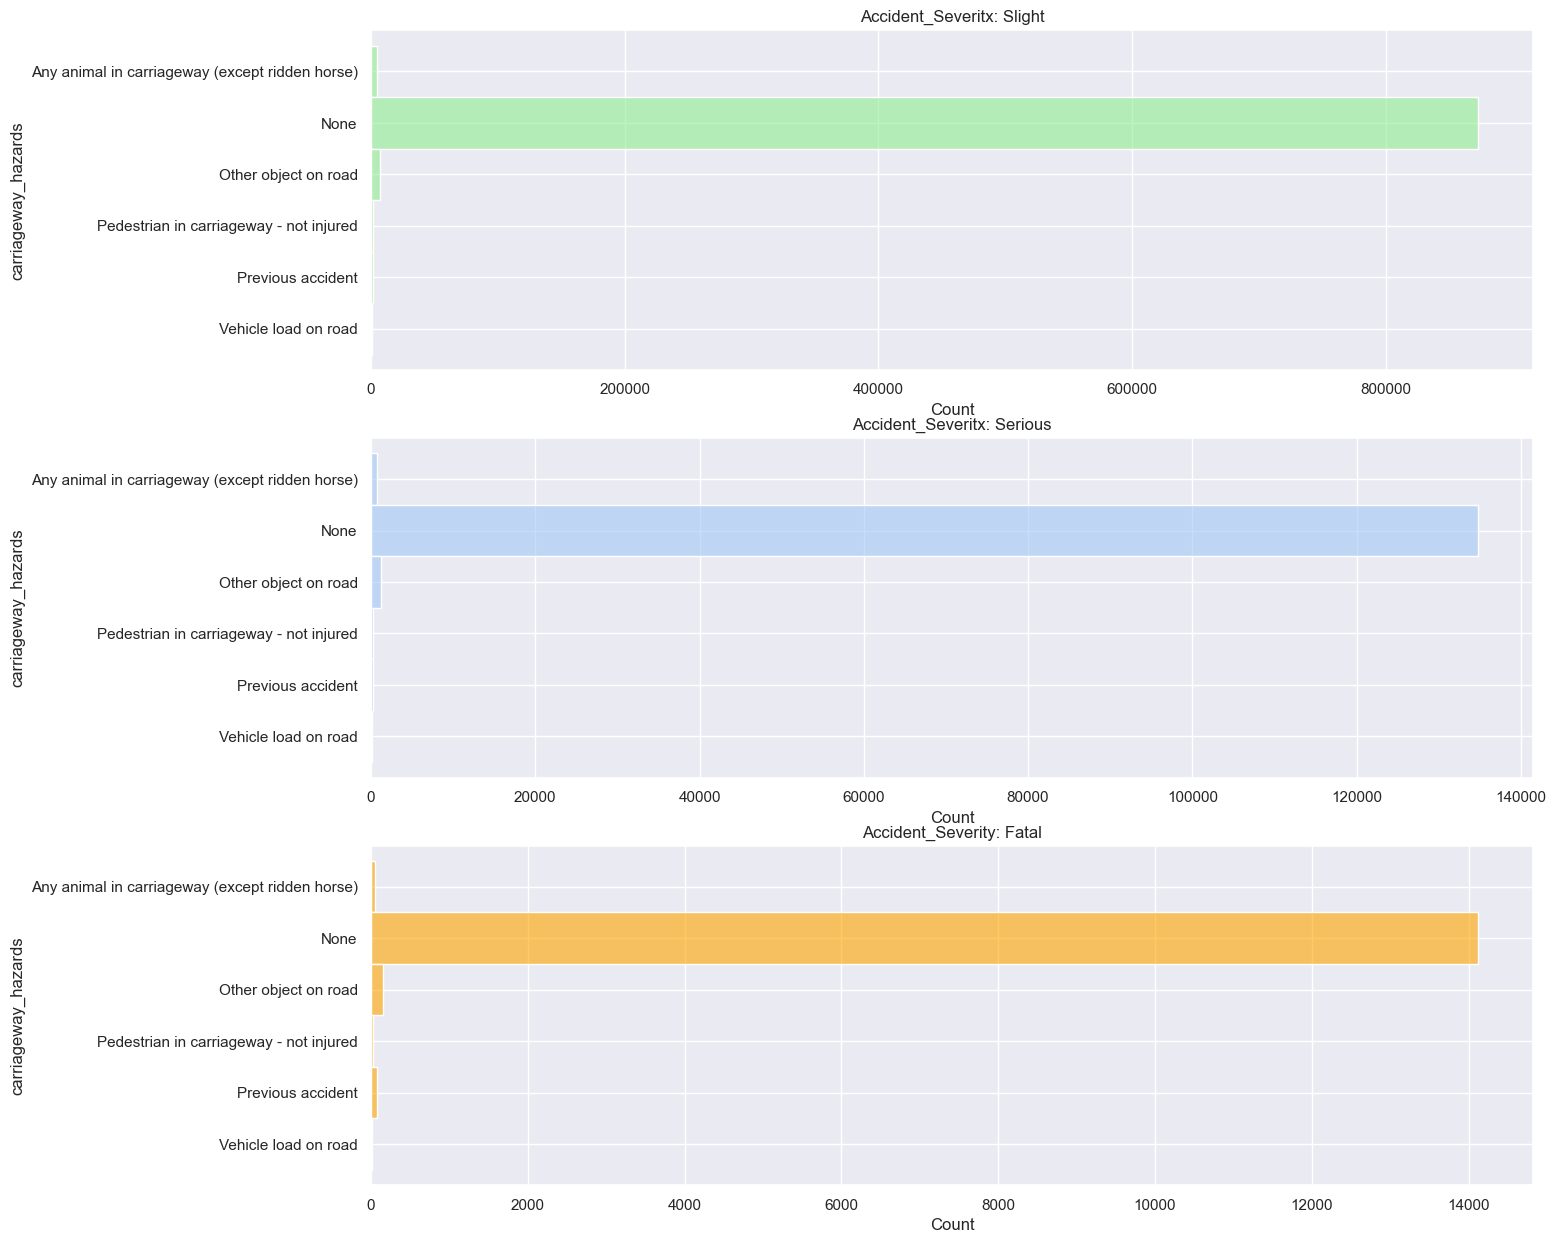

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='carriageway_hazards', color='lightgreen',
             alpha=0.6, bins=31, ax=ax[0],
             ).set(title=f"Accident_Severitx: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='carriageway_hazards',
             alpha=0.6, bins=31, ax=ax[1],
             ).set(title=f'Accident_Severitx: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y='carriageway_hazards', color='orange',
             alpha=0.6, bins=31, ax=ax[2],
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see here from the visualisations that the severity of an RTC rises when there is both an object on the road and when there is a previous accident.  
  
Fatal accidents are more likely to happen when there is a previous accident.

### Feature - **'special_conditions_at_site'**

Lets have a look at the values.

In [ ]:
df_accident['special_conditions_at_site'].value_counts(ascending=False)

None                                          1014180
Roadworks                                       12814
Oil or diesel                                    3984
Mud                                              3409
Road surface defective                           2426
Road sign or marking defective or obscured       1628
Auto traffic signal - out                        1559
Auto traffic sigl - out                           442
Auto signal part defective                        439
Auto sigl part defective                          132
Name: special_conditions_at_site, dtype: int64

We appear to have two sets of similar features:  
- **Auto signal part defective** and **Auto sigl part defective**
- **Auto traffic signal - out** and **Auto traffic sigl - out**  
  
This appears to be a typo so lets merge the values.  

In [ ]:
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'
                                              ].map({'Auto sigl part defective': 'Auto signal part defective'}
                                                    ).fillna(df_accident['special_conditions_at_site'])
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'
                                              ].map({'Auto traffic sigl - out': 'Auto traffic signal - out'}
                                                    ).fillna(df_accident['special_conditions_at_site'])
df_accident['special_conditions_at_site'].value_counts(dropna=False, ascending=False)

None                                          1014180
Roadworks                                       12814
Oil or diesel                                    3984
Mud                                              3409
Road surface defective                           2426
Auto traffic signal - out                        2001
Road sign or marking defective or obscured       1628
Auto signal part defective                        571
Name: special_conditions_at_site, dtype: int64

Now we have a clean set of values lets have a look at them against **'Severity'**.

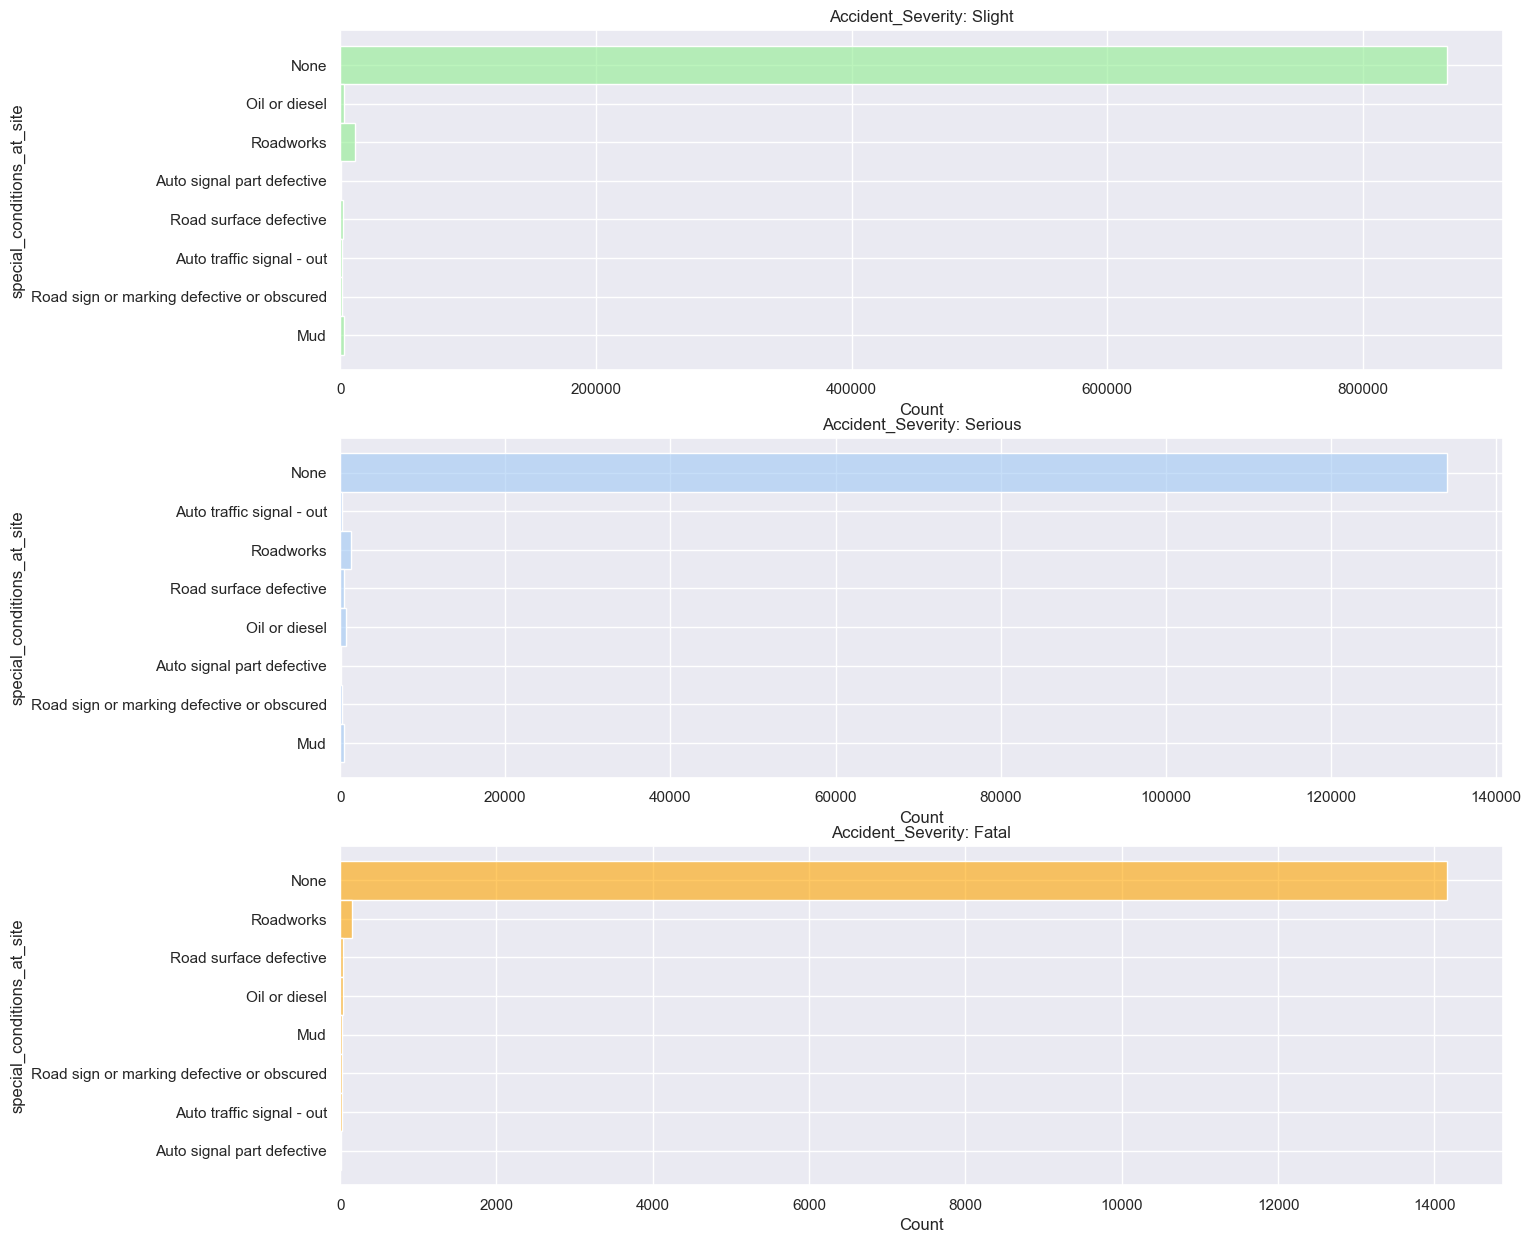

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='special_conditions_at_site', color='lightgreen',
             alpha=0.6, bins=31, ax=ax[0],
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='special_conditions_at_site',
             alpha=0.6, bins=31, ax=ax[1],
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y='special_conditions_at_site', color='orange',
             alpha=0.6, bins=31, ax=ax[2],
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see that **'special_conditions_at_site'** do not have a great impact.  
  
We do see a slight rise in all severities when there are **'Roadworks'** present.

### Feature - **'light_conditions'**

Lets have a look **'light_conditions'**.

In [ ]:
df_accident['light_conditions'].value_counts(ascending=False)

Daylight                       760351
Darkness - lights lit          206950
Darkness - no lighting          60457
Darkness - lighting unknown      8987
Darkness - lights unlit          4268
Name: light_conditions, dtype: int64

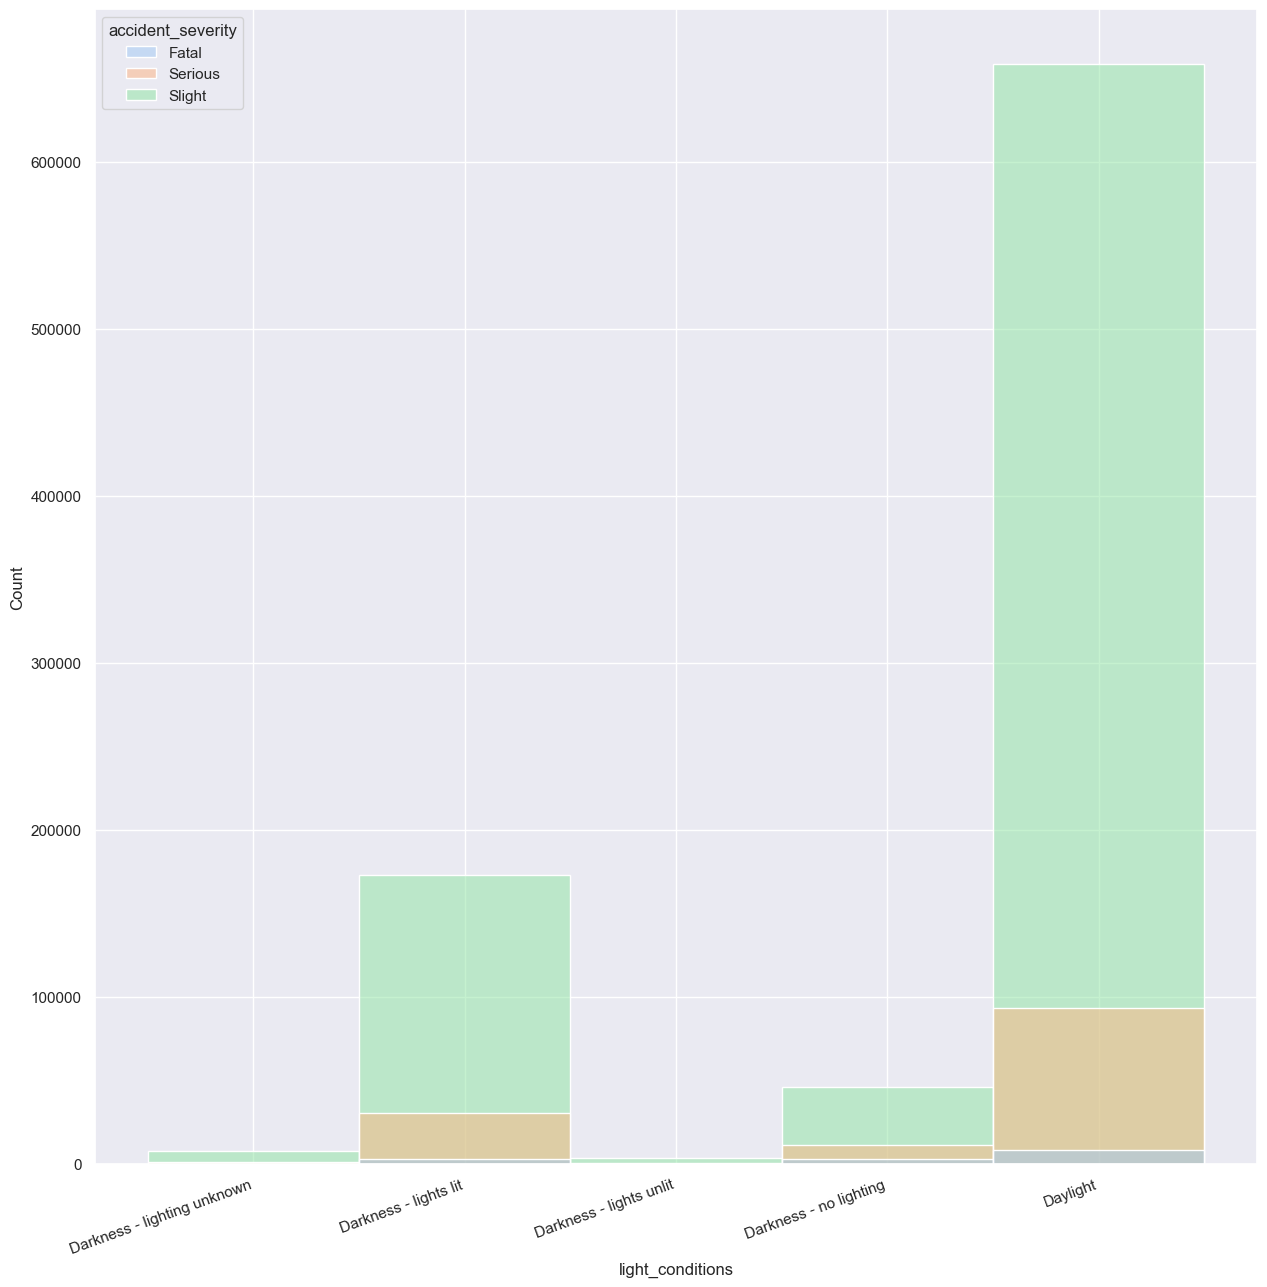

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='light_conditions', bins=5, hue='accident_severity')

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that the **RTC's** are much more common during daylight hours.  
  
Lets have la look against **'Accident Severity'**.

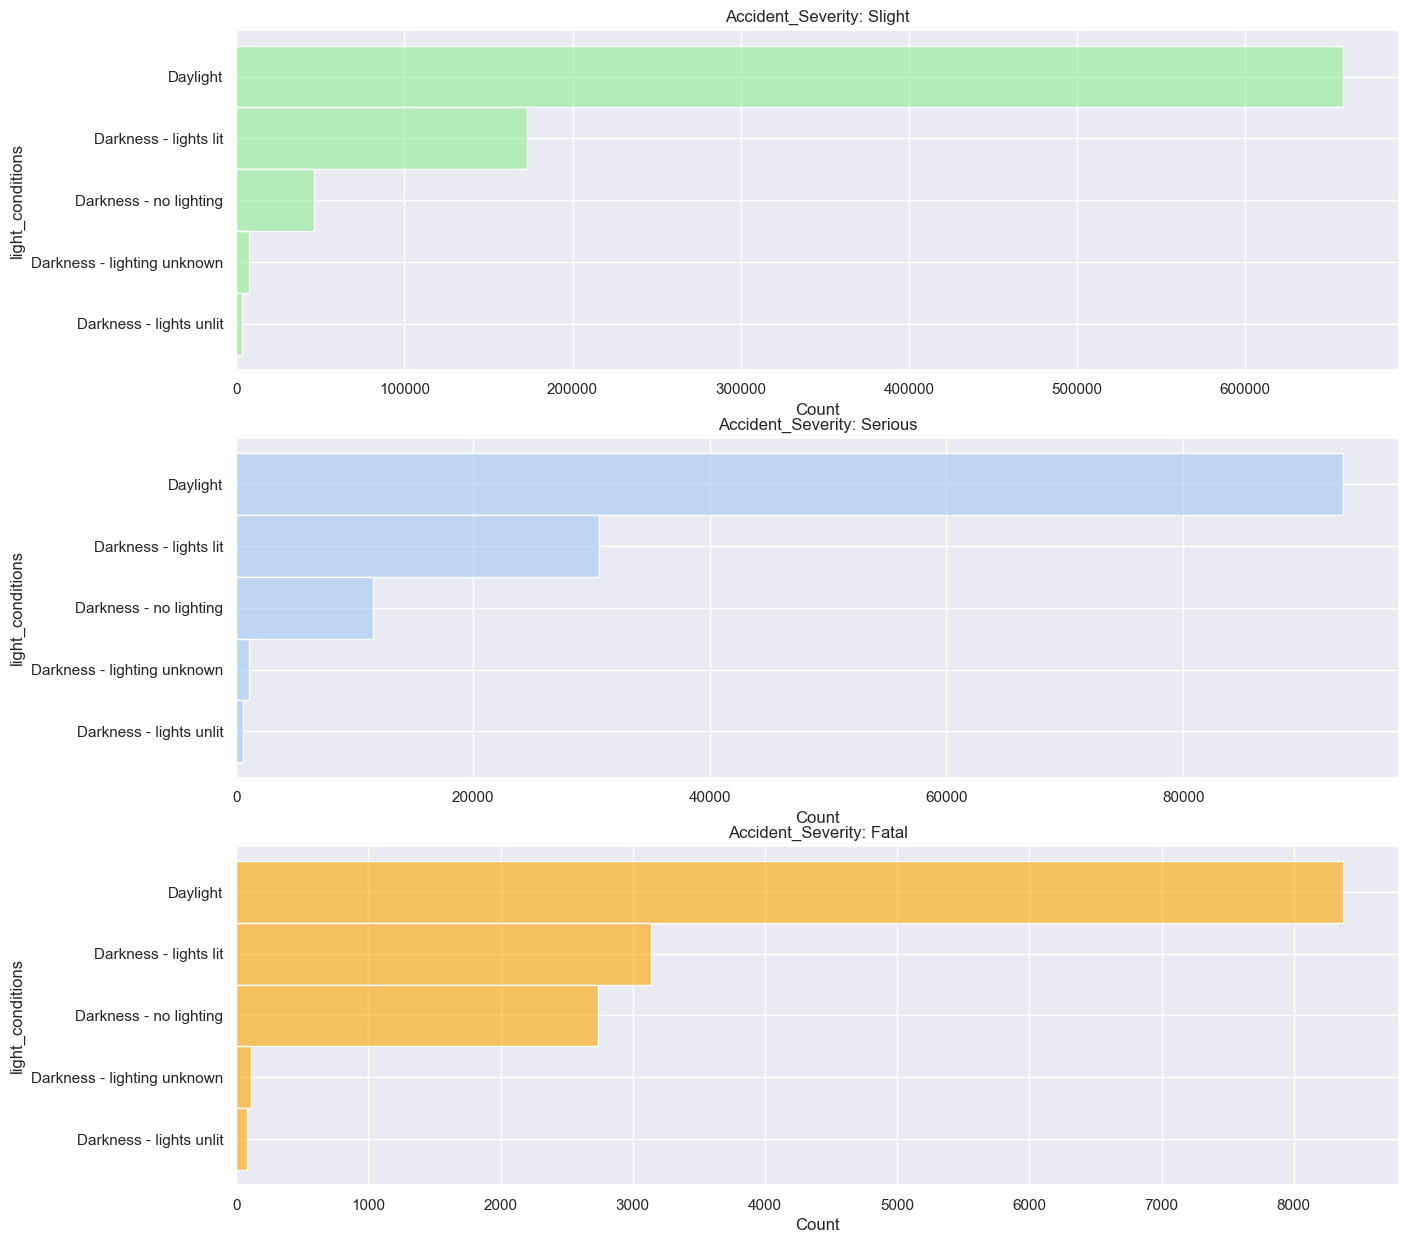

In [ ]:
df_accident.light_conditions = pd.Categorical(values=df_accident.light_conditions,
                                             categories=[
                                                'Daylight',
                                                'Darkness - lights lit',
                                                'Darkness - no lighting',
                                                'Darkness - lighting unknown',
                                                'Darkness - lights unlit'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['light_conditions']) # Sort the column

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='light_conditions', color='lightgreen',
             alpha=0.6, bins=5, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='light_conditions',
             alpha=0.6, bins=5, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='light_conditions', color='orange',
             alpha=0.6, bins=5, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

It still appears that RTC's are much more common in the daylight.  
  
However we can see in the **'Fatal'** visual that a larger proportion happen during darkness.  

### Feature - **'pedestrian_crossing_human_control'**

Lets take a look at the values.

In [ ]:
df_accident['pedestrian_crossing_human_control'].value_counts(dropna=False, ascending=False)

0.0    1034927
2.0       3553
1.0       2533
Name: pedestrian_crossing_human_control, dtype: int64

We can see that these have been entered as `floats`, which is out of line with the data.  
  
Lets convert them to match the Police Accident Form.

In [ ]:
df_accident['pedestrian_crossing_human_control'] = df_accident['pedestrian_crossing_human_control'].map({0.0 : 'None within 50m',
                                                       1.0 : 'School Crossing Patrol',
                                                       2.0 : 'Other Authorised Control'}
                                                      )

df_accident['pedestrian_crossing_human_control'].value_counts(dropna=False, ascending=False)


None within 50m             1034927
Other Authorised Control       3553
School Crossing Patrol         2533
Name: pedestrian_crossing_human_control, dtype: int64

Nearly all **RTC's** are not affected by this feature.  
  
Now we have mapped to the correct names lets visualise against **'Severity'** anyway.

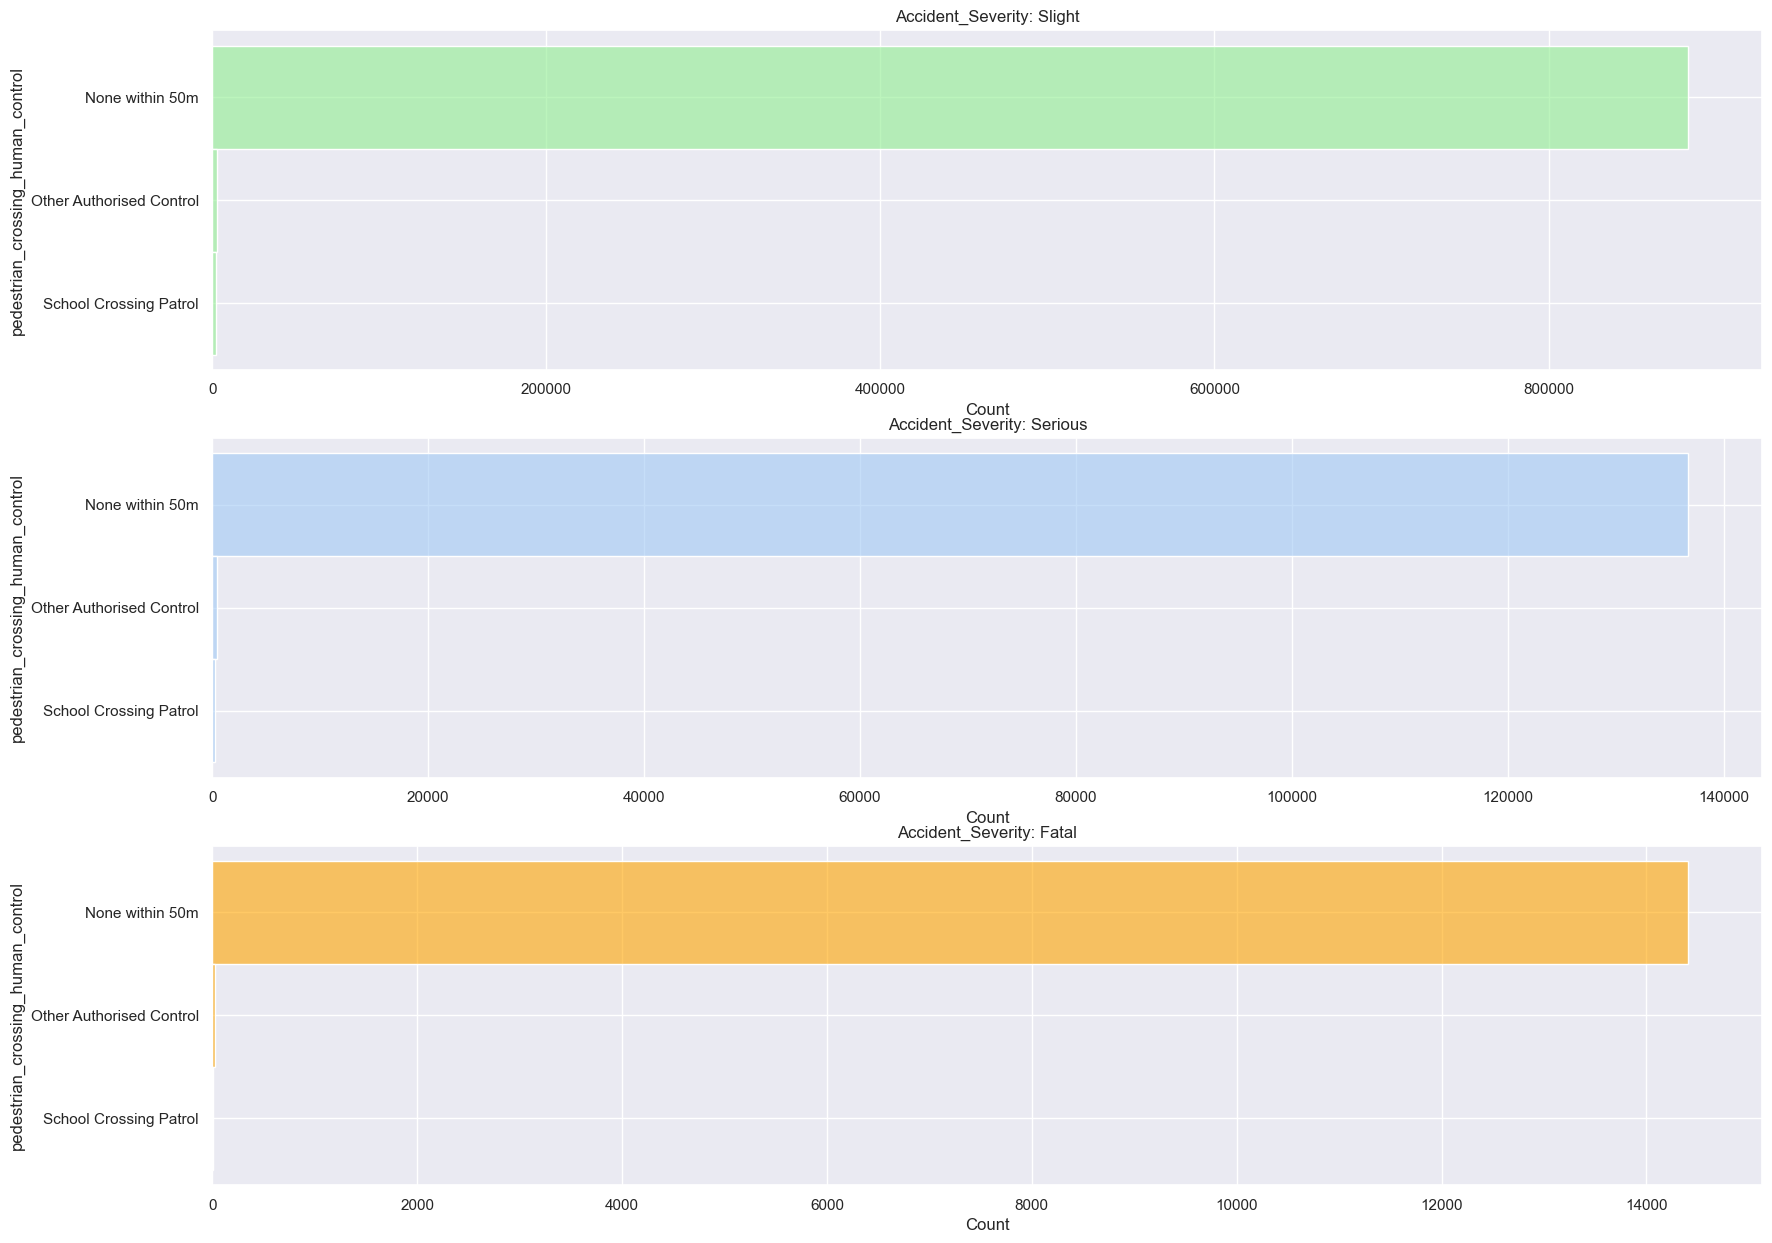

In [ ]:
df_accident.pedestrian_crossing_human_control = pd.Categorical(values=df_accident.pedestrian_crossing_human_control,
                                             categories=[
                                                'None within 50m',
                                                'Other Authorised Control',
                                                'School Crossing Patrol'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['pedestrian_crossing_human_control']) # Sort the column

fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='pedestrian_crossing_human_control',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='pedestrian_crossing_human_control',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='pedestrian_crossing_human_control',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'pedestrian_crossing_physical_facilities'**

Lets take a look at **'pedestrian_crossing_physical_facilities'** to see if they have any useful insight.

In [ ]:
df_accident['pedestrian_crossing_physical_facilities'].value_counts(dropna=False, ascending=False)

0.0    879422
5.0     64201
4.0     52251
1.0     25577
8.0     16785
7.0      2777
Name: pedestrian_crossing_physical_facilities, dtype: int64

We can see that these have been entered as `floats`, which is out of line with the data.  
  
Lets convert them to match the Police Accident Form.

In [ ]:
df_accident['pedestrian_crossing_physical_facilities'] = df_accident['pedestrian_crossing_physical_facilities'].map({0.0 : 'None within 50m',
                                                       1.0 : 'Zebra Crossing',
                                                       4.0 : 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
                                                       5.0 : 'Pedestrian phase at traffic signal junction',
                                                       7.0 : 'Footbridge or subway',
                                                       8.0 : 'Central refuge — no other controls'}
                                                      )

df_accident['pedestrian_crossing_physical_facilities'].value_counts(dropna=False, ascending=False)


None within 50m                                                              879422
Pedestrian phase at traffic signal junction                                   64201
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     52251
Zebra Crossing                                                                25577
Central refuge — no other controls                                            16785
Footbridge or subway                                                           2777
Name: pedestrian_crossing_physical_facilities, dtype: int64

Lets have a look against **'Severity'**.

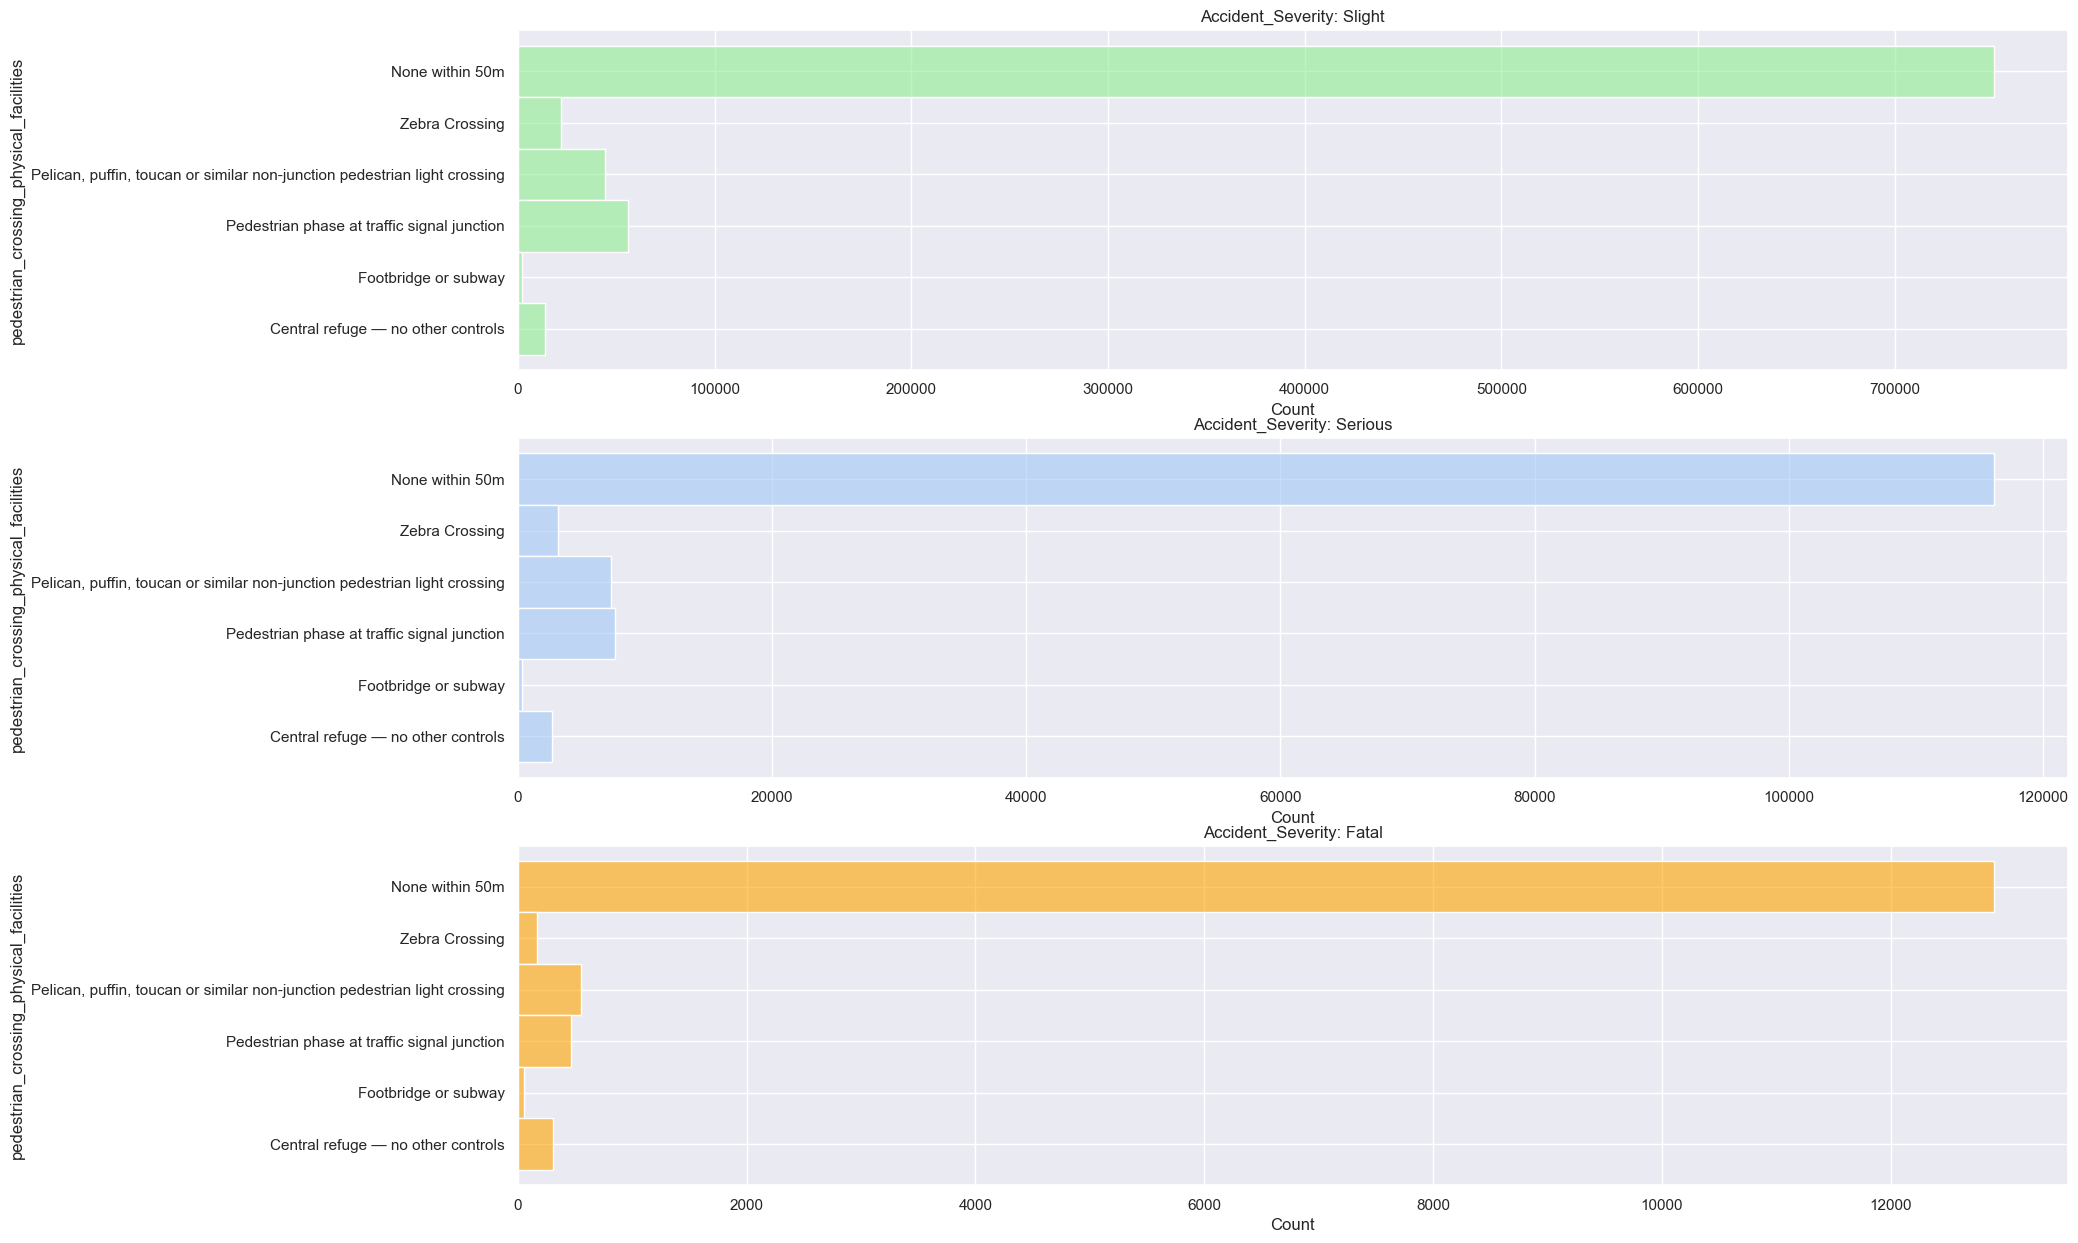

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='pedestrian_crossing_physical_facilities',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='pedestrian_crossing_physical_facilities',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='pedestrian_crossing_physical_facilities',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

We can see that this feature has little impact.  
  
However we can see an increase in **'Pedestrian phase at traffic signal junction'** for all three severities.  
  
There is also a rise at **'Pelican, puffin, toucan or similar non-junction pedestrian light crossing'**.  
  
Lets take a closer look.

In [ ]:
int((len(df_accident.loc[(
    df_accident['accident_severity'] != 'Slight'
)
& (
    df_accident['pedestrian_crossing_physical_facilities']
    == 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing'
   )
]) + len(df_accident.loc[(
    df_accident['accident_severity'] == 'Serious'
)
& (
    df_accident['pedestrian_crossing_physical_facilities']
    == 'Pedestrian phase at traffic signal junction'
   )
]) / 6) / 365)

25

We are having an average of **25** serious **RTC's** per **day** at a light controlled pedestrian crossing across the UK.  
  
Of those 25 **RTC's**, **2** are **fatal**.

### Feature - **'road_surface_conditions'**

Lets take a look to see what difference **'road_surface_conditions'** have.

In [ ]:
df_accident['road_surface_conditions'].value_counts(ascending=False, dropna=False)

Dry                     707887
Wet or damp             300528
Frost or ice             23742
Snow                      7408
Flood over 3cm. deep      1448
Name: road_surface_conditions, dtype: int64

We can see that nearly a third of all accidents happen in **'Wet or damp'** conditions.

In [ ]:
df_accident.groupby(
    'road_surface_conditions'
)['accident_severity'].value_counts(ascending=False)

road_surface_conditions         
Dry                      Slight     602536
                         Serious     95727
                         Fatal        9624
Flood over 3cm. deep     Slight       1212
                         Serious       201
                         Fatal          35
Frost or ice             Slight      20844
                         Serious      2650
                         Fatal         248
Snow                     Slight       6629
                         Serious       726
                         Fatal          53
Wet or damp              Slight     257959
                         Serious     38084
                         Fatal        4485
Name: accident_severity, dtype: int64

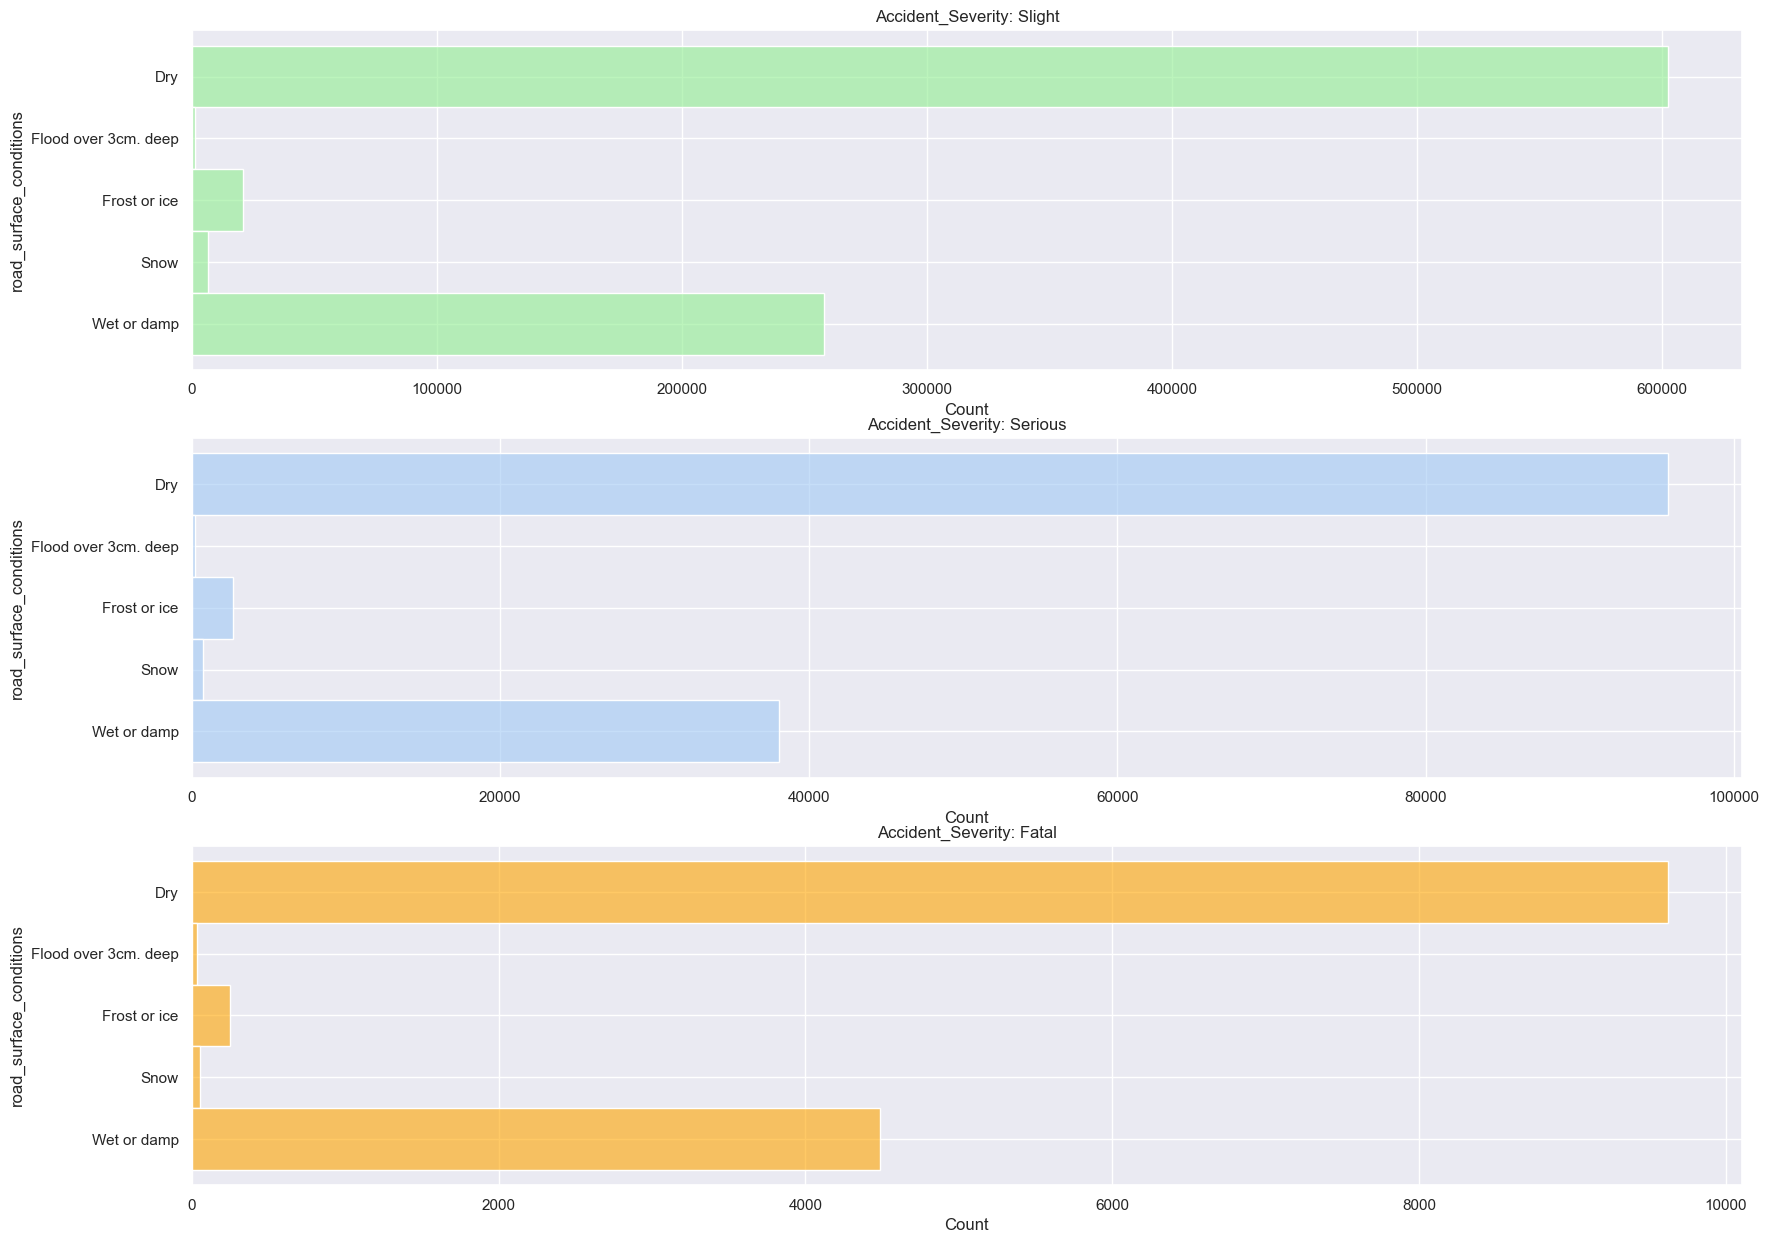

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='road_surface_conditions',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='road_surface_conditions',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='road_surface_conditions',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

We can see that **'Wet or damp'** has an impact across all severities.

### Feature - **'road_type'**

In [ ]:
round(df_accident.groupby(
    'road_type'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

road_type                  
Dual carriageway    Slight     86.3
                    Serious    11.8
                    Fatal       1.9
One way street      Slight     87.2
                    Serious    12.1
                    Fatal       0.7
Roundabout          Slight     91.5
                    Serious     8.1
                    Fatal       0.3
Single carriageway  Slight     84.6
                    Serious    14.0
                    Fatal       1.4
Slip road           Slight     90.6
                    Serious     8.6
                    Fatal       0.8
Name: accident_severity, dtype: float64

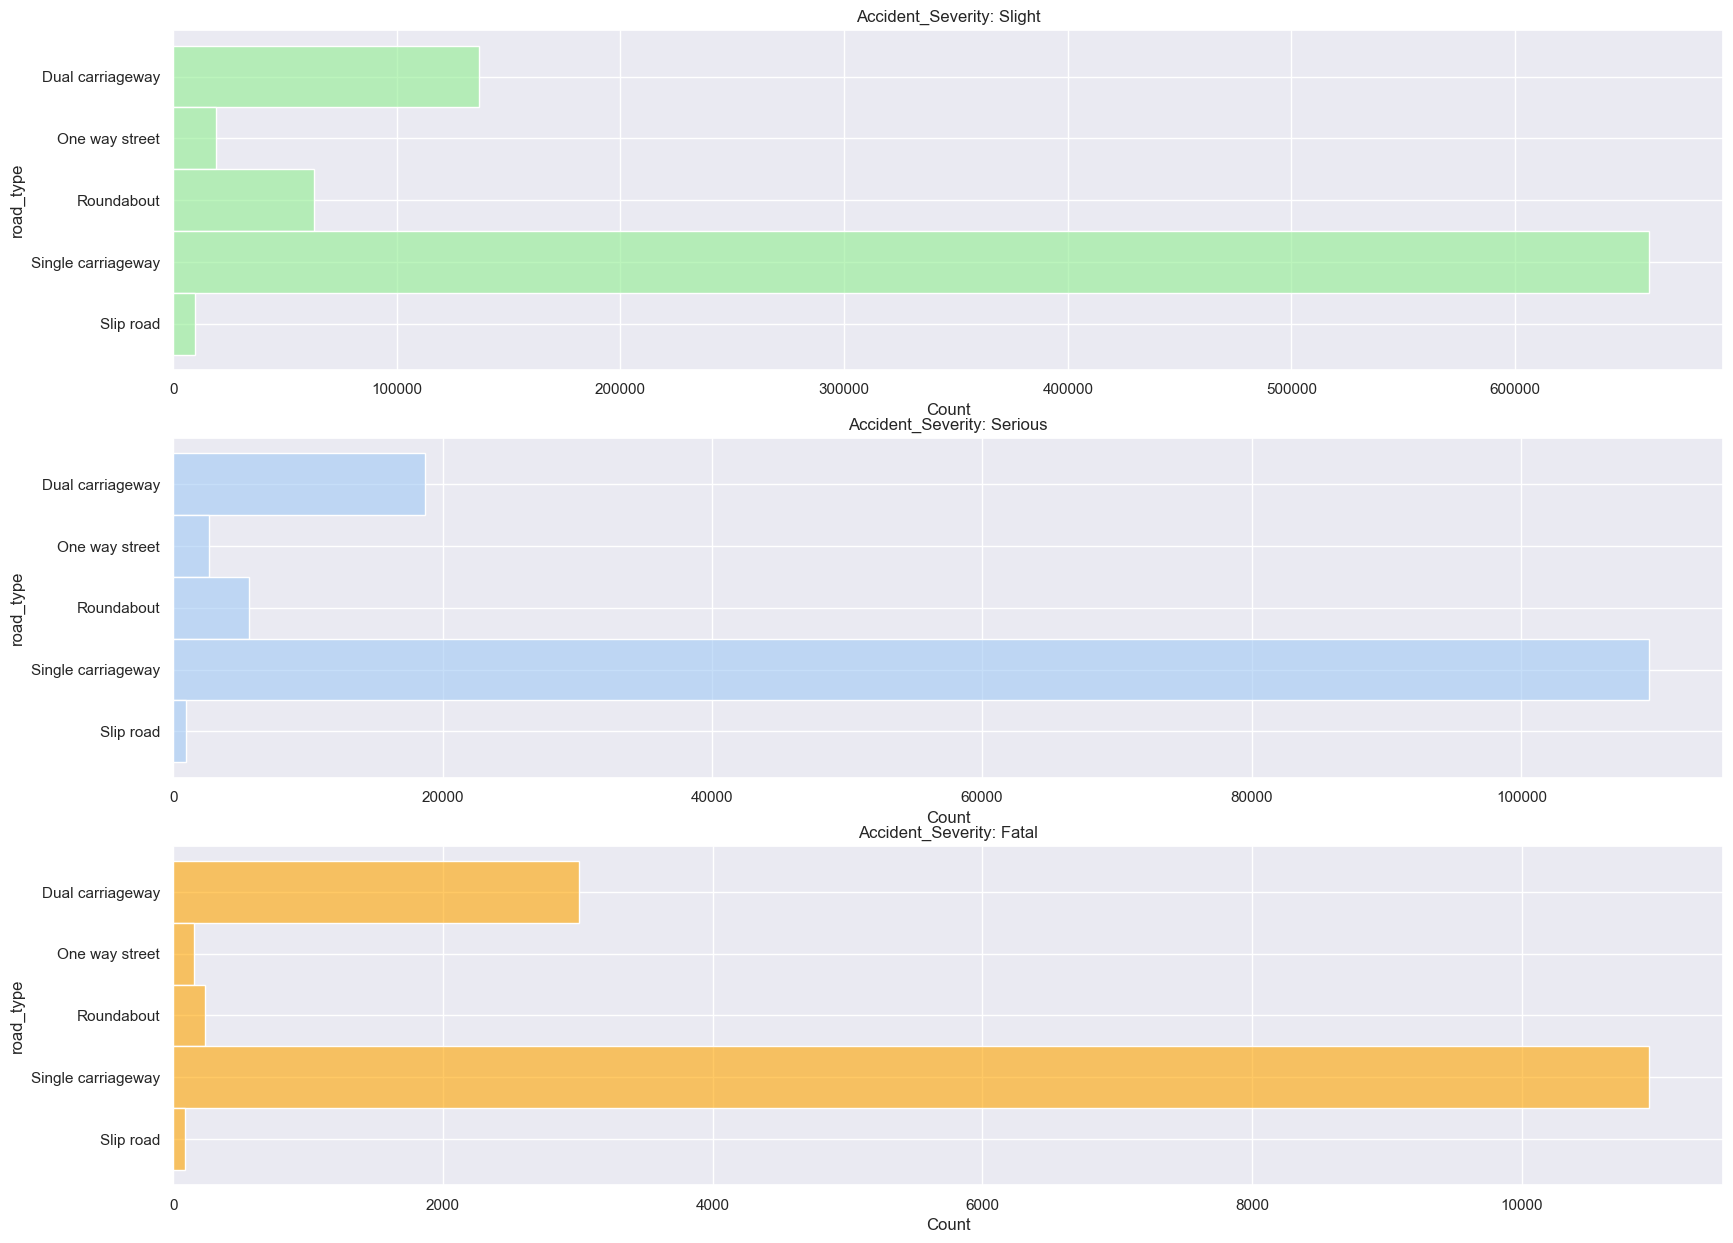

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='road_type',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='road_type',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='road_type',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'special_conditions_at_site'**

In [ ]:
round(df_accident.groupby(
    'special_conditions_at_site'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

special_conditions_at_site                         
Auto signal part defective                  Slight     86.5
                                            Serious    12.1
                                            Fatal       1.4
Auto traffic signal - out                   Slight     88.3
                                            Serious    10.6
                                            Fatal       1.1
Mud                                         Slight     86.9
                                            Serious    12.5
                                            Fatal       0.6
None                                        Slight     85.4
                                            Serious    13.2
                                            Fatal       1.4
Oil or diesel                               Slight     82.3
                                            Serious    16.9
                                            Fatal       0.8
Road sign or marking defective or obscured  Slig

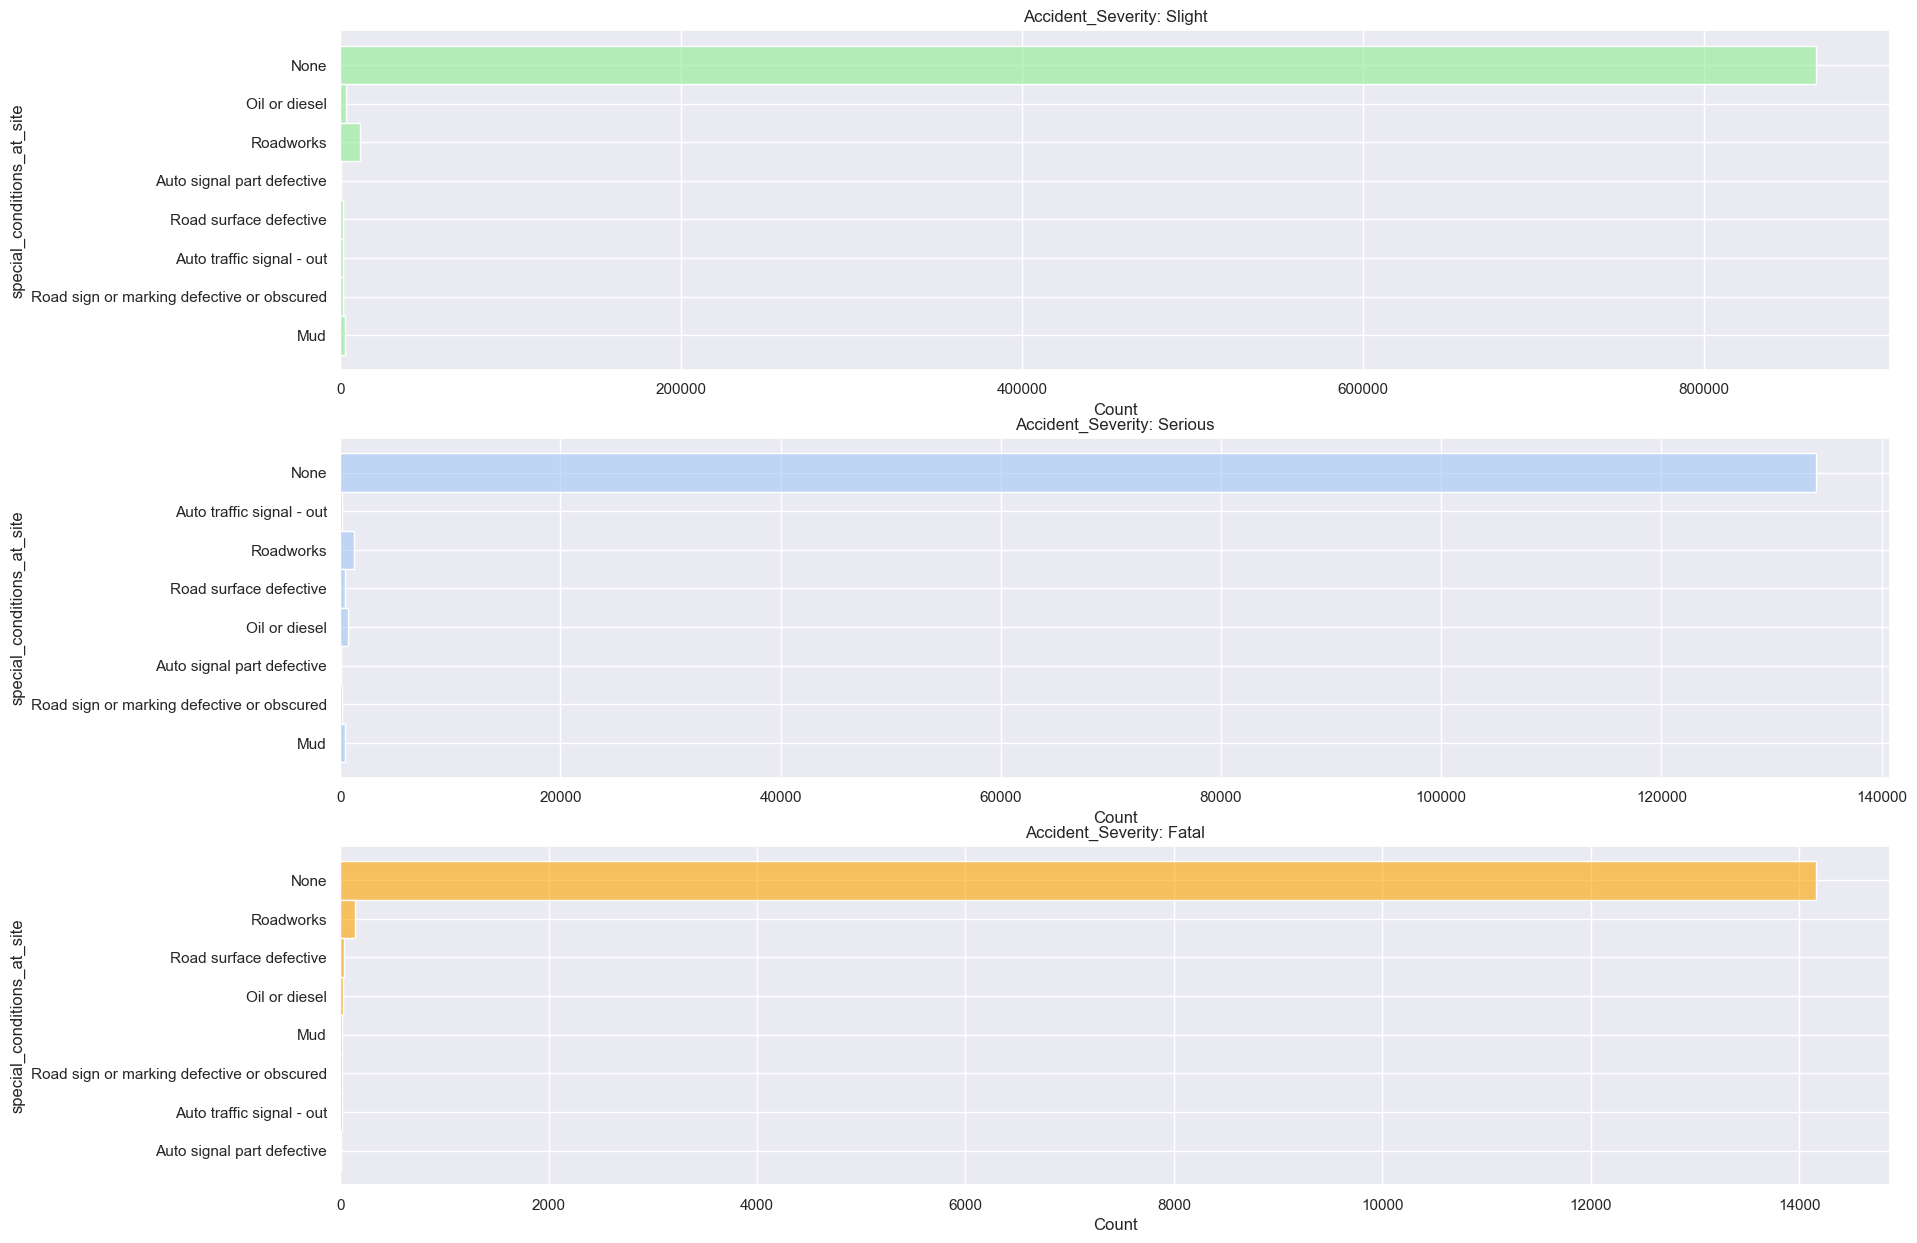

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='special_conditions_at_site',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='special_conditions_at_site',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='special_conditions_at_site',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'urban_or_rural_area'**

In [ ]:
df_accident['urban_or_rural_area'].value_counts(ascending=False)

Urban          662627
Rural          378368
Unallocated        18
Name: urban_or_rural_area, dtype: int64

In [ ]:
df_accident['urban_or_rural_area'].replace('Unallocated', 'Urban', inplace=True)

In [ ]:
round(df_accident.groupby(
    'urban_or_rural_area'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

urban_or_rural_area         
Rural                Slight     82.1
                     Serious    15.4
                     Fatal       2.5
Urban                Slight     87.3
                     Serious    11.9
                     Fatal       0.8
Name: accident_severity, dtype: float64

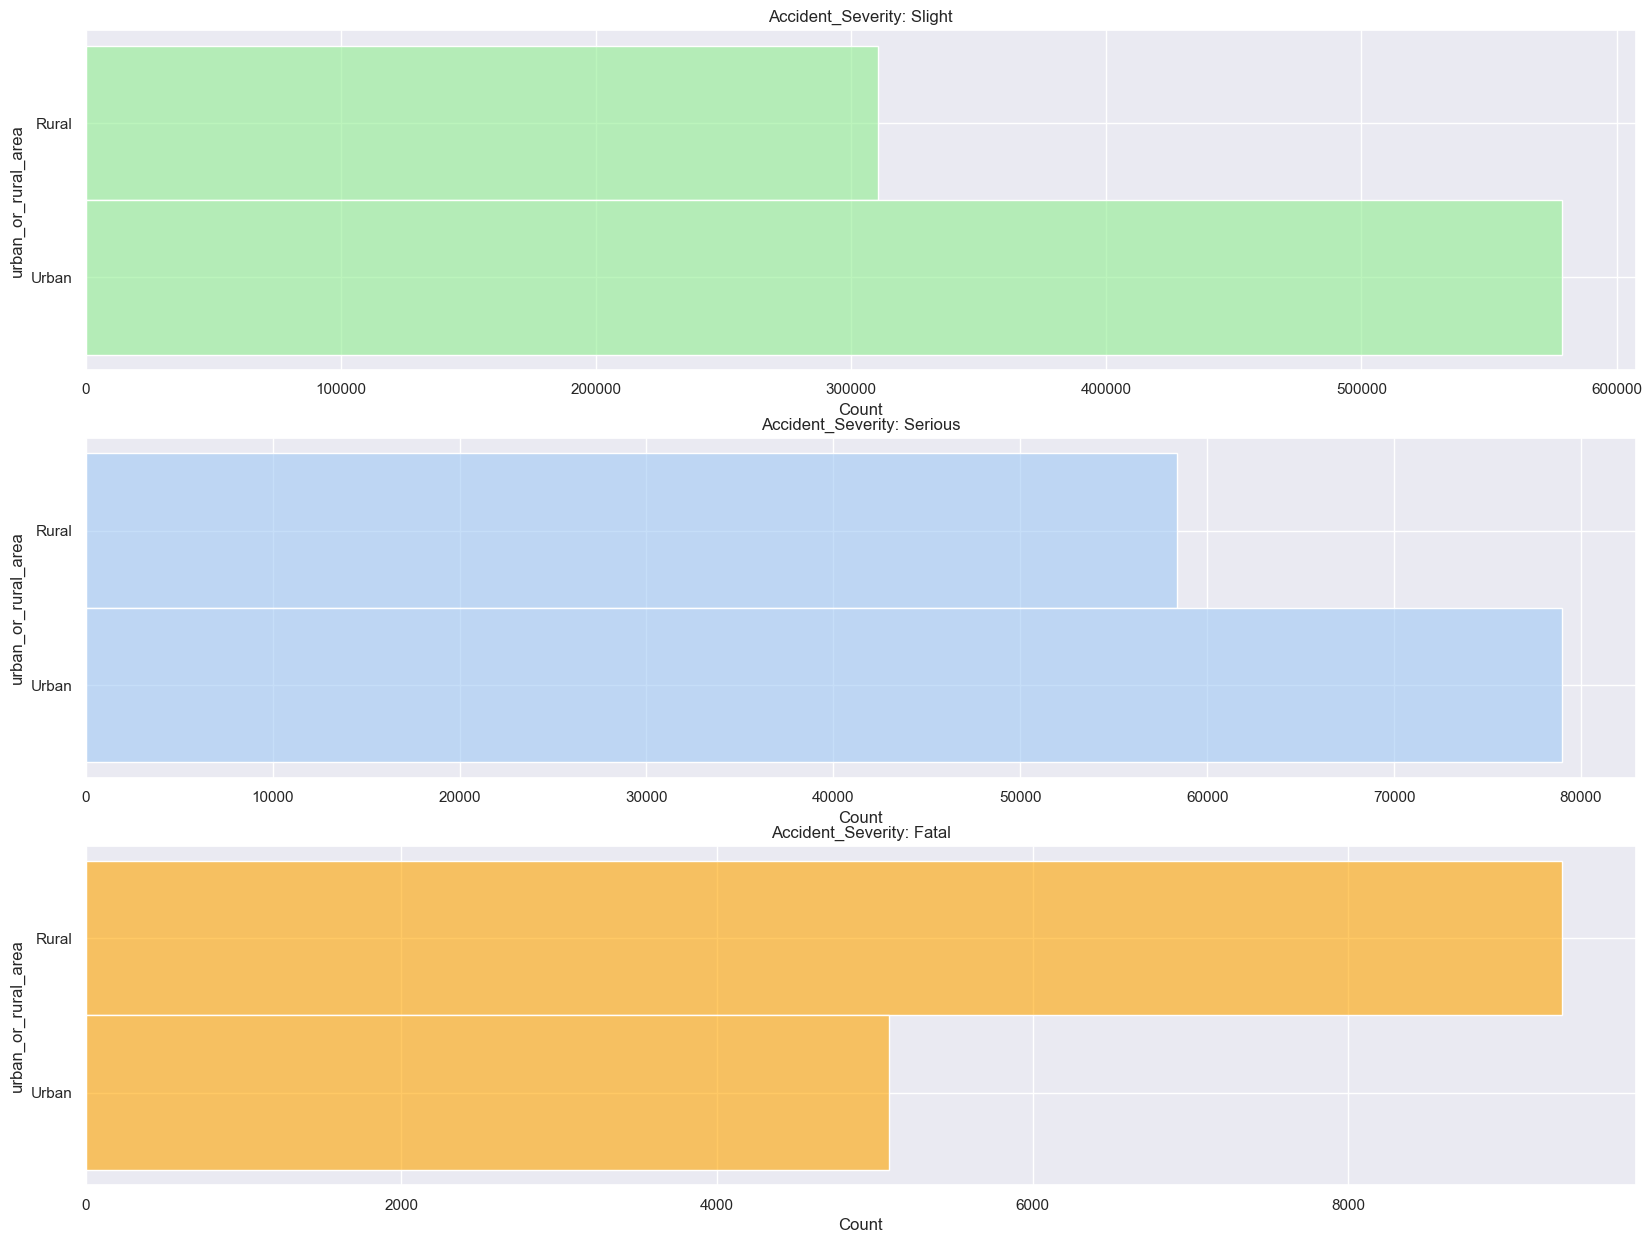

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='urban_or_rural_area',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='urban_or_rural_area',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='urban_or_rural_area',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

We can see that the **Fatal** **RTC's** in **Rural** areas are much higher than **Urban** areas.

### Feature - **'weather_conditions'**

In [ ]:
df_accident['weather_conditions'].value_counts(ascending=False)

Fine no high winds       846153
Raining no high winds    124743
Other                     26249
Raining + high winds      14600
Fine + high winds         13478
Snowing no high winds      8500
Fog or mist                6015
Snowing + high winds       1275
Name: weather_conditions, dtype: int64

<AxesSubplot: >

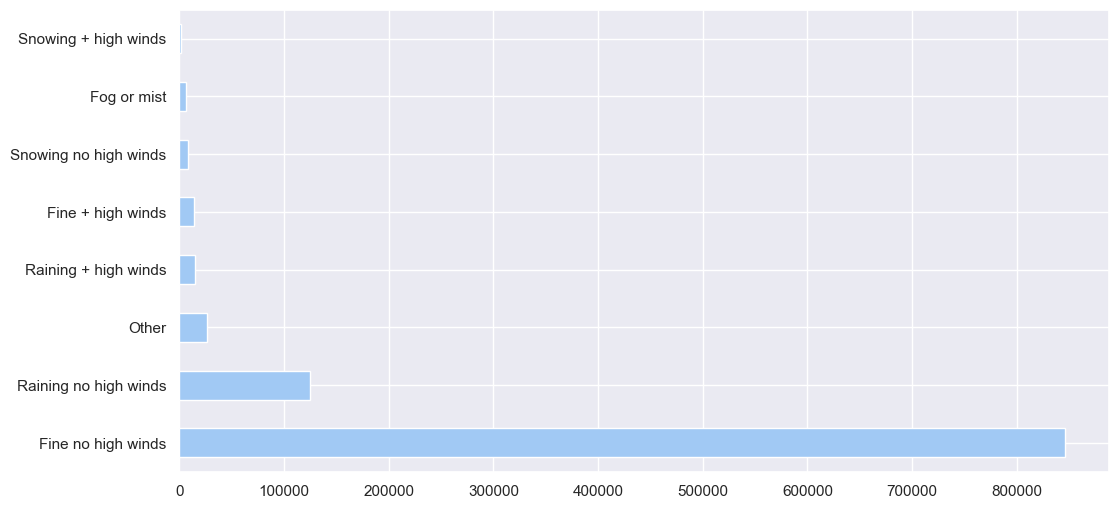

In [ ]:
df_accident['weather_conditions'].value_counts().plot(kind='barh')

In [ ]:
round(df_accident.groupby(
    'weather_conditions'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

weather_conditions            
Fine + high winds      Slight     83.4
                       Serious    14.5
                       Fatal       2.1
Fine no high winds     Slight     85.0
                       Serious    13.5
                       Fatal       1.4
Fog or mist            Slight     84.2
                       Serious    13.5
                       Fatal       2.2
Other                  Slight     88.7
                       Serious    10.3
                       Fatal       0.9
Raining + high winds   Slight     85.5
                       Serious    13.0
                       Fatal       1.5
Raining no high winds  Slight     87.2
                       Serious    11.7
                       Fatal       1.1
Snowing + high winds   Slight     86.7
                       Serious    12.5
                       Fatal       0.8
Snowing no high winds  Slight     90.1
                       Serious     9.2
                       Fatal       0.7
Name: accident_severity, dtype: f

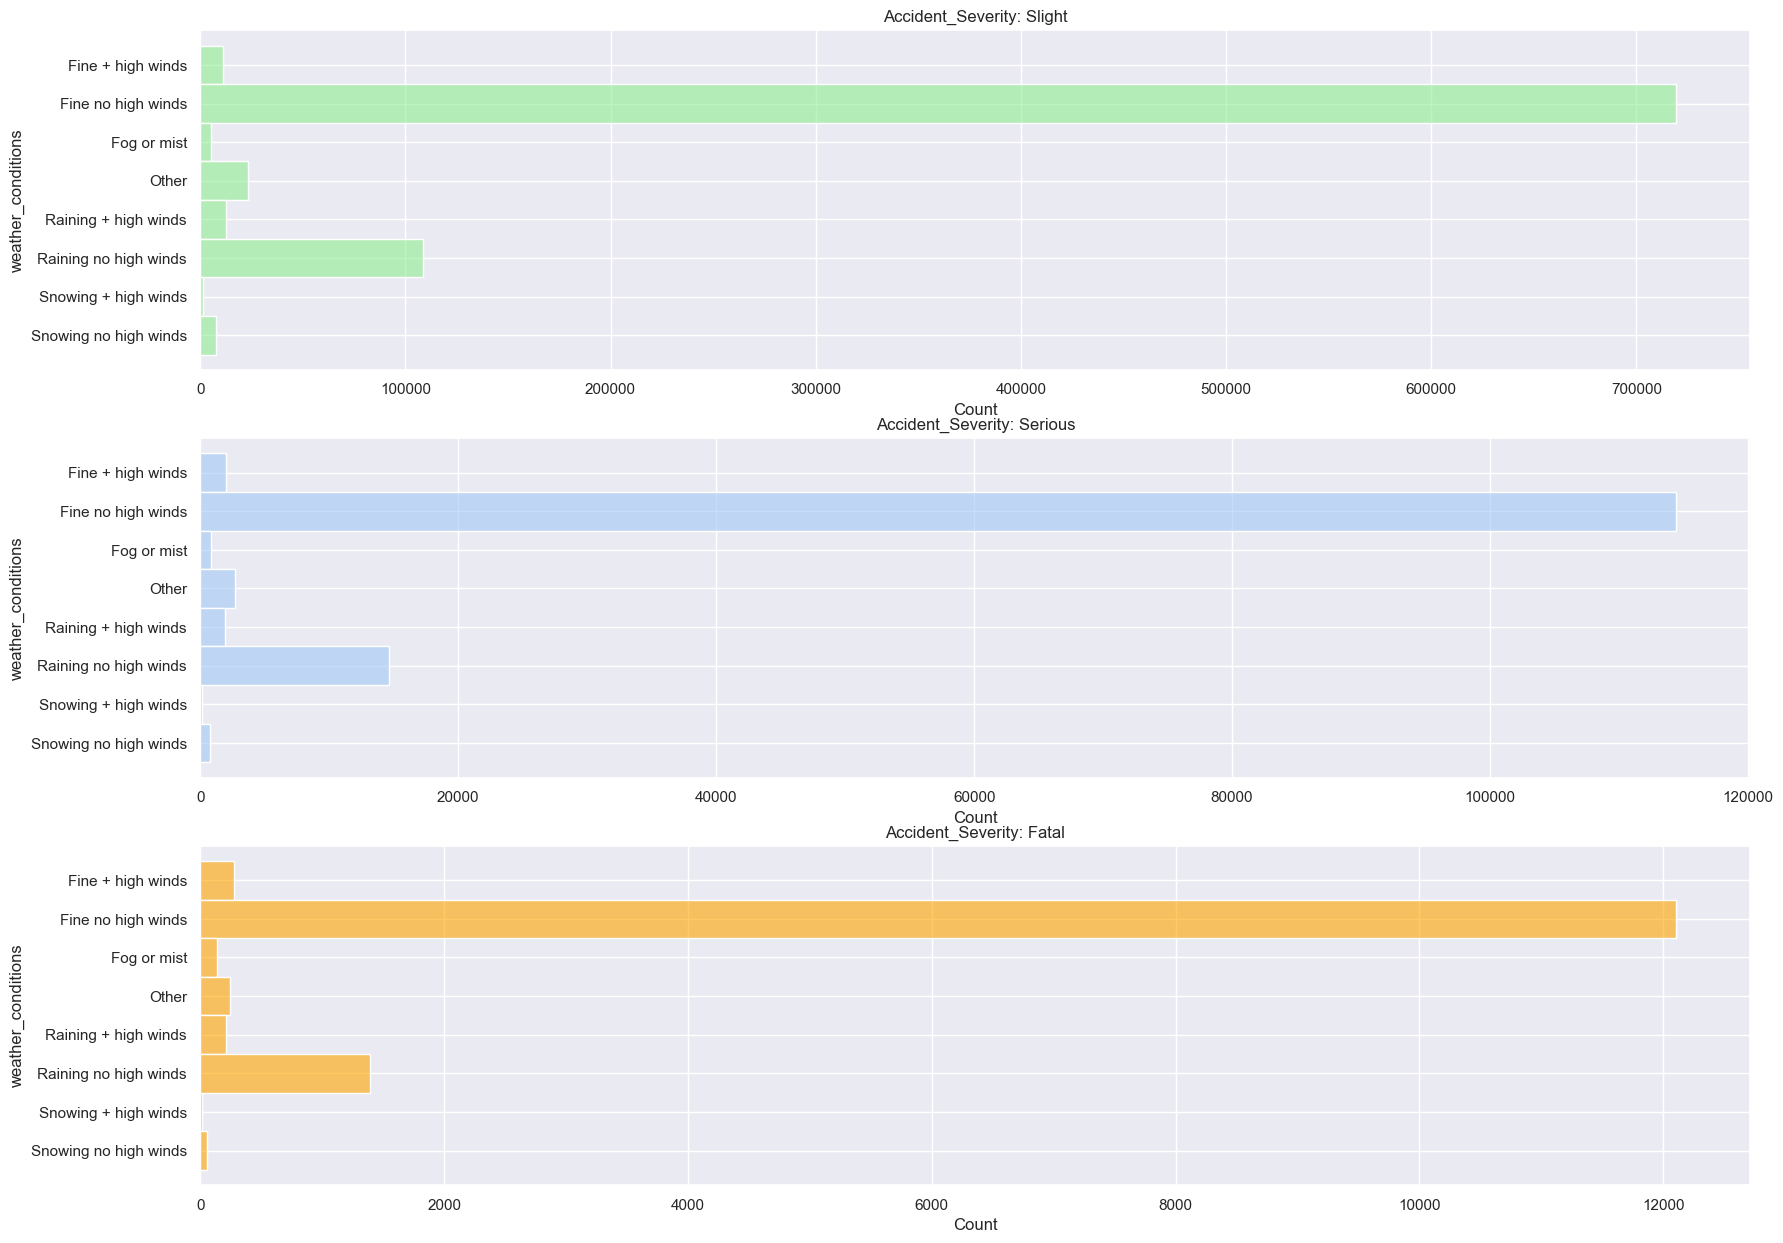

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='weather_conditions',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='weather_conditions',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='weather_conditions',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'number_of_casualties'**

A casualty is classed as any human death or personal injury. Lets have a look at the counts.

In [ ]:
df_accident.groupby('accident_severity')['number_of_casualties'].sum()

accident_severity
Fatal        27882
Serious     204354
Slight     1184252
Name: number_of_casualties, dtype: int32

In [ ]:
round((df_accident.groupby('accident_severity')['number_of_casualties'].sum() / 6) / 365, 1)

accident_severity
Fatal       12.7
Serious     93.3
Slight     540.8
Name: number_of_casualties, dtype: float64

We can see that during the **2005** to **2010** time period, the average death toll on UK roads was approx **12** per day, **one death every two hours**.

In [ ]:
df_accident['number_of_casualties'].describe()

count    1.041013e+06
mean     1.360682e+00
std      8.229161e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.800000e+01
Name: number_of_casualties, dtype: float64

We can see we have a large range of numbers, however the **min**, **25%**, **50%** and **75%** are all **1**, and the **max** is **68**.  
  
Lets plot the numbers

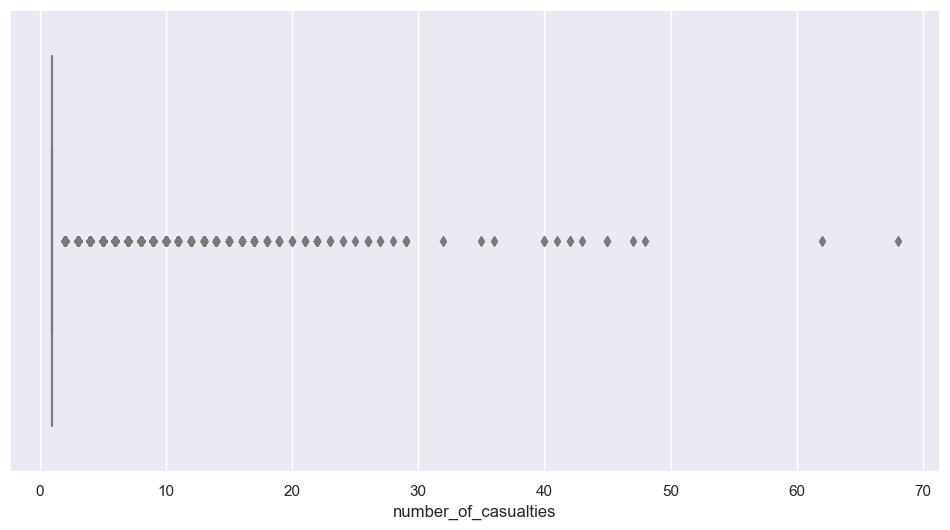

In [ ]:
sns.boxplot(data=df_accident, x='number_of_casualties')

plt.show()

On further investigation we found a collision with 68 casualties involving a coach overturning trying to exit a motorway.  
  
[Link for Coach Accident](https://www.theguardian.com/uk/2007/jan/04/transport.world1)

### Feature - **'number_of_vehicles'**

Lets take a look at **'number_of_vehicles'**.

In [ ]:
df_accident['number_of_vehicles'].describe()

count    1.041013e+06
mean     1.836173e+00
std      7.183727e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      3.200000e+01
Name: number_of_vehicles, dtype: float64

In [ ]:
round(df_accident.groupby(
    'number_of_vehicles'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

number_of_vehicles         
1                   Slight      78.7
                    Serious     19.2
                    Fatal        2.1
2                   Slight      88.6
                    Serious     10.5
                               ...  
28                  Serious      0.0
                    Slight       0.0
32                  Slight     100.0
                    Fatal        0.0
                    Serious      0.0
Name: accident_severity, Length: 69, dtype: float64

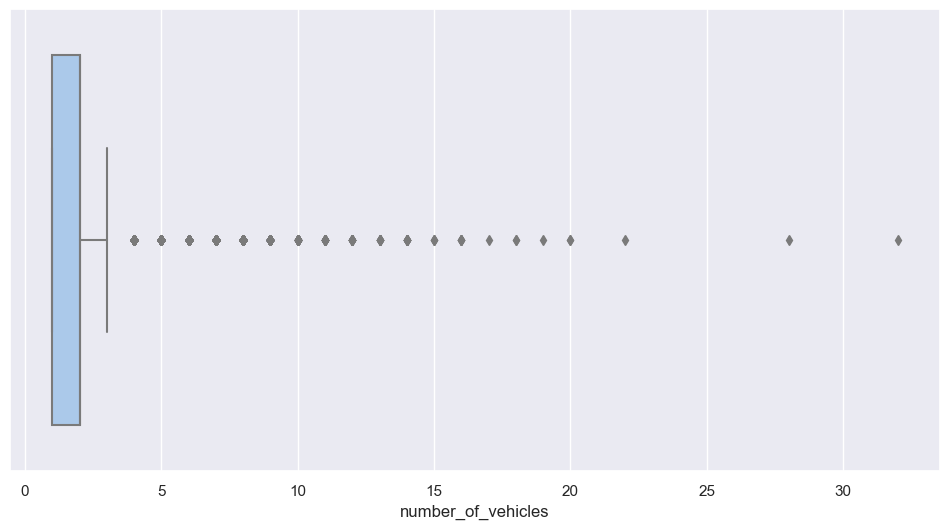

In [ ]:
sns.boxplot(data=df_accident, x='number_of_vehicles')

plt.show()

In [ ]:
round((df_accident.groupby('accident_severity')['number_of_vehicles'].sum() / 6) / 365, 1)

accident_severity
Fatal       11.8
Serious    105.5
Slight     755.5
Name: number_of_vehicles, dtype: float64

As we can see, on average over **850** vehicles per day are involved in an **RTC** during the 2005 to 2010 time period.

### Feature - **'speed_limit'**

Lets take a look at **'speed_limit'**.

In [ ]:
df_accident['speed_limit'].value_counts(ascending=False)

30    662005
60    176218
40     85850
70     79090
50     30791
20      7034
15        15
10        10
Name: speed_limit, dtype: int64

In [ ]:
thirty = len(df_accident[df_accident['speed_limit'] == 30]) / len(df_accident)
print(f'The 30mph has an accident rate of', f'{thirty:.1%}')

The 30mph has an accident rate of 63.6%


As we can see there is a 63.5% rate of **RTC's** in the **30mph** speed limit areas.  
  
These are usual urban areas.

In [ ]:
round(df_accident.groupby(
    'speed_limit'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

speed_limit         
10           Slight     70.0
             Serious    20.0
             Fatal      10.0
15           Slight     93.3
             Serious     6.7
             Fatal       0.0
20           Slight     85.8
             Serious    13.4
             Fatal       0.8
30           Slight     87.2
             Serious    12.1
             Fatal       0.7
40           Slight     85.7
             Serious    12.8
             Fatal       1.6
50           Slight     83.8
             Serious    13.9
             Fatal       2.3
60           Slight     78.7
             Serious    18.0
             Fatal       3.2
70           Slight     85.8
             Serious    11.7
             Fatal       2.5
Name: accident_severity, dtype: float64

We can also see here that the average percentage of **Fatal** **RTC's** rise as the speed limit increases.

In [ ]:
df_accident.reset_index(inplace=True, drop=True)

In [ ]:
df_accident.head()

,accident_index,1st_road_class,2nd_road_class,accident_severity,carriageway_hazards,date,day_of_week,junction_control,junction_detail,latitude,light_conditions,local_authority_district,longitude,number_of_casualties,number_of_vehicles,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,police_force,road_surface_conditions,road_type,special_conditions_at_site,speed_limit,time,urban_or_rural_area,weather_conditions,year,hour,day,month,season
0,200501BS00001,A,No 2nd Road,Serious,None,2005-01-04,Tuesday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,-0.191170,1,1,None within 50m,Zebra Crossing,Metropolitan Police,Wet or damp,Single carriageway,None,30,1900-01-01 17:42:00,Urban,Raining no high winds,2005,17,4,Jan,Winter
1,200501BS00002,B,C,Slight,None,2005-01-05,Wednesday,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,-0.211708,1,1,None within 50m,Pedestrian phase at traffic signal junction,Metropolitan Police,Dry,Dual carriageway,None,30,1900-01-01 17:36:00,Urban,Fine no high winds,2005,17,5,Jan,Winter
2,200501BS00003,C,No 2nd Road,Slight,None,2005-01-06,Thursday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,-0.206458,1,2,None within 50m,None within 50m,Metropolitan Police,Dry,Single carriageway,None,30,1900-01-01 00:15:00,Urban,Fine no high winds,2005,0,6,Jan,Winter
3,200501BS00004,A,No 2nd Road,Slight,None,2005-01-07,Friday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,-0.173862,1,1,None within 50m,None within 50m,Metropolitan Police,Dry,Single carriageway,None,30,1900-01-01 10:35:00,Urban,Fine no high winds,2005,10,7,Jan,Winter
4,200501BS00005,Unclassified,No 2nd Road,Slight,None,2005-01-10,Monday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,-0.156618,1,1,None within 50m,None within 50m,Metropolitan Police,Wet or damp,Single carriageway,None,30,1900-01-01 21:13:00,Urban,Fine no high winds,2005,21,10,Jan,Winter


### Features - **'lattitude' and 'longitude'**

In [ ]:
maps = df_accident[:1000].copy()
maps

,accident_index,1st_road_class,2nd_road_class,accident_severity,carriageway_hazards,date,day_of_week,junction_control,junction_detail,latitude,light_conditions,local_authority_district,longitude,number_of_casualties,number_of_vehicles,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,police_force,road_surface_conditions,road_type,special_conditions_at_site,speed_limit,time,urban_or_rural_area,weather_conditions,year,hour,day,month,season
0,200501BS00001,A,No 2nd Road,Serious,None,2005-01-04,Tuesday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,-0.191170,1,1,None within 50m,Zebra Crossing,Metropolitan Police,Wet or damp,Single carriageway,None,30,1900-01-01 17:42:00,Urban,Raining no high winds,2005,17,4,Jan,Winter
1,200501BS00002,B,C,Slight,None,2005-01-05,Wednesday,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,-0.211708,1,1,None within 50m,Pedestrian phase at traffic signal junction,Metropolitan Police,Dry,Dual carriageway,None,30,1900-01-01 17:36:00,Urban,Fine no high winds,2005,17,5,Jan,Winter
2,200501BS00003,C,No 2nd Road,Slight,None,2005-01-06,Thursday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,-0.206458,1,2,None within 50m,None within 50m,Metropolitan Police,Dry,Single carriageway,None,30,1900-01-01 00:15:00,Urban,Fine no high winds,2005,0,6,Jan,Winter
3,200501BS00004,A,No 2nd Road,Slight,None,2005-01-07,Friday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,-0.173862,1,1,None within 50m,None within 50m,Metropolitan Police,Dry,Single carriageway,None,30,1900-01-01 10:35:00,Urban,Fine no high winds,2005,10,7,Jan,Winter
4,200501BS00005,Unclassified,No 2nd Road,Slight,None,2005-01-10,Monday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,-0.156618,1,1,None within 50m,None within 50m,Metropolitan Police,Wet or damp,Single carriageway,None,30,1900-01-01 21:13:00,Urban,Fine no high winds,2005,21,10,Jan,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200501CP00259,A,A,Slight,None,2005-11-08,Tuesday,Auto traffic signal,Roundabout,51.517725,Darkness - lights lit,City of London,-0.107733,1,2,None within 50m,Pedestrian phase at traffic signal junction,City of London,Dry,Single carriageway,None,30,1900-01-01 21:00:00,Urban,Other,2005,21,8,Nov,Autumn
996,200501CP00260,A,B,Slight,None,2005-11-09,Wednesday,Auto traffic signal,Crossroads,51.518406,Darkness - lights lit,Camden,-0.105399,1,1,None within 50m,None within 50m,Metropolitan Police,Wet or damp,Single carriageway,None,30,1900-01-01 22:30:00,Urban,Raining no high winds,2005,22,9,Nov,Autumn
997,200501CP00261,A,No 2nd Road,Slight,None,2005-11-09,Wednesday,Not at junction or within 20 metres,Not at junction or within 20 metres,51.510751,Daylight,City of London,-0.093611,1,2,None within 50m,None within 50m,City of London,Dry,Dual carriageway,None,30,1900-01-01 14:31:00,Urban,Fine no high winds,2005,14,9,Nov,Autumn
998,200501CP00262,A,A,Slight,None,2005-10-11,Tuesday,Give way or uncontrolled,T or staggered junction,51.518349,Daylight,City of London,-0.079744,1,1,None within 50m,None within 50m,City of London,Dry,Single carriageway,None,30,1900-01-01 15:25:00,Urban,Fine no high winds,2005,15,11,Oct,Autumn


In [ ]:
yr = df_accident['month'] == 'Jan'
# la = df_accident['local_authority_district'] == 'Staffordshire'
lat = df_accident[yr]['latitude'].to_list()
lon = df_accident[yr]['longitude'].to_list()
nam = df_accident[yr]['local_authority_district'].to_list()
stat = df_accident[yr]['accident_severity'].to_list()

def color_producer(status):
    if 'Slight' in status:
        return 'green'
    elif 'Serious' in status:
        return 'blue'
    else:
        return 'orange'

html = '''<h4>Collision Information</h4>
<b>Local Authority: </b> %s <br />
<b>Severity: </b> %s
'''
map2 = flm.Map(location=[55.466, -3.691], zoom_start=6,)

fg = flm.FeatureGroup(name='My V Map')

for lt, ln, nm, st in zip((lat), (lon), (nam), (stat)):
    iframe = flm.IFrame(html = html % ((nm), (st)), height = 100)
    popup = flm.Popup(iframe, min_width=200, max_width=500)
    fg.add_child(flm.CircleMarker(location = [lt, ln], popup = (popup), fill_color=color_producer(st), color='None', radius=3, fill_opacity = 0.7))
    map2.add_child(fg)

map2.save('C:/Users/kmedr/My Drive/Omdena_Predicting_RTC_main/reports/map2.html')
map2

In [142]:
df_accident['local_authority_district'].unique()

['Kensington and Chelsea', 'Westminster', 'Hammersmith and Fulham', 'City of London', 'Tower Hamlets', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

In [144]:
yr = df_accident[(df_accident['year'] == 2005) & (df_accident['accident_severity'] == 'Slight') & (df_accident['local_authority_district'] == 'Kensington and Chelsea')]
len(yr)

660

In [150]:
cond = (df_accident['year'] == 2005) & (df_accident['accident_severity'] == 'Fatal')

lat = df_accident[cond]['latitude'].tolist()
lon = df_accident[cond]['longitude'].tolist()
nam = df_accident[cond]['local_authority_district'].tolist()
stat = df_accident[cond]['accident_severity'].tolist()

def color_producer(status):
    if 'Slight' in status:
        return 'green'
    elif 'Serious' in status:
        return 'blue'
    else:
        return 'orange'

html = '''<h4>Collision Information</h4>
<b>Local Authority: </b> %s <br />
<b>Severity: </b> %s
'''
map = flm.Map(location=[55.466, -3.691], zoom_start=6,)

fg = flm.FeatureGroup(name='My V Map')

for lt, ln, nm, st in zip((lat), (lon), (nam), (stat)):
    iframe = flm.IFrame(html = html % ((nm), (st)), height = 100)
    popup = flm.Popup(iframe, min_width=200, max_width=500)
    fg.add_child(flm.CircleMarker(location = [lt, ln], popup = (popup), fill_color=color_producer(st), color='None', radius=5, color=grey, fill_opacity = 0.7))
    map.add_child(fg)

map.save('C:/Users/kmedr/My Drive/Omdena_Predicting_RTC_main/reports/map.html')
map

SyntaxError: keyword argument repeated: color (2371830970.py, line 27)

In [131]:
stat = list(df_accident['latitude'])
stat

[51.489096,
 51.520075,
 51.525301,
 51.482442,
 51.495752,
 51.51554,
 51.512695,
 51.50226,
 51.48342,
 51.512443,
 51.494902,
 51.484044,
 51.491632,
 51.492622,
 51.495429,
 51.481912,
 51.500191,
 51.495811,
 51.486552,
 51.495498,
 51.492992,
 51.513039,
 51.482076,
 51.49296,
 51.498062,
 51.508265,
 51.513988,
 51.488671,
 51.494902,
 51.496893,
 51.517796,
 51.521988,
 51.497103,
 51.519986,
 51.523585,
 51.514951,
 51.478096,
 51.481804,
 51.492652,
 51.500648,
 51.509377,
 51.483999,
 51.509154,
 51.488776,
 51.502177,
 51.4849,
 51.495806,
 51.485005,
 51.485515,
 51.492515,
 51.509515,
 51.493527,
 51.521709,
 51.481575,
 51.516656,
 51.501941,
 51.497911,
 51.518806,
 51.49724,
 51.506807,
 51.481822,
 51.49164,
 51.494121,
 51.501596,
 51.494146,
 51.491273,
 51.481575,
 51.487215,
 51.508707,
 51.495084,
 51.482582,
 51.486931,
 51.509125,
 51.493285,
 51.499569,
 51.49369,
 51.490178,
 51.494981,
 51.514966,
 51.493429,
 51.50134,
 51.4829,
 51.481989,
 51.481746,
 51.

In [132]:
# yr = df_accident['year'] == 2005
stat = df_accident[df_accident['year'] == 2005]['latitude'].tolist()
stat

[51.489096,
 51.520075,
 51.525301,
 51.482442,
 51.495752,
 51.51554,
 51.512695,
 51.50226,
 51.48342,
 51.512443,
 51.494902,
 51.484044,
 51.491632,
 51.492622,
 51.495429,
 51.481912,
 51.500191,
 51.495811,
 51.486552,
 51.495498,
 51.492992,
 51.513039,
 51.482076,
 51.49296,
 51.498062,
 51.508265,
 51.513988,
 51.488671,
 51.494902,
 51.496893,
 51.517796,
 51.521988,
 51.497103,
 51.519986,
 51.523585,
 51.514951,
 51.478096,
 51.481804,
 51.492652,
 51.500648,
 51.509377,
 51.483999,
 51.509154,
 51.488776,
 51.502177,
 51.4849,
 51.495806,
 51.485005,
 51.485515,
 51.492515,
 51.509515,
 51.493527,
 51.521709,
 51.481575,
 51.516656,
 51.501941,
 51.497911,
 51.518806,
 51.49724,
 51.506807,
 51.481822,
 51.49164,
 51.494121,
 51.501596,
 51.494146,
 51.491273,
 51.481575,
 51.487215,
 51.508707,
 51.495084,
 51.482582,
 51.486931,
 51.509125,
 51.493285,
 51.499569,
 51.49369,
 51.490178,
 51.494981,
 51.514966,
 51.493429,
 51.50134,
 51.4829,
 51.481989,
 51.481746,
 51.

In [ ]:
stat = (df_accident['accident_severity'] == 'Fatal') & (df_accident['year'] == 2005).unique().tolist()
stat

In [ ]:
df_accident.loc[df_accident['Road_Surface_Conditions'] == 'Dry', 'Weather_Conditions'] = 'Fine no high winds'
# df_accident.loc[df_accident['Road_Surface_Conditions'] == 'Wet or damp', 'Weather_Conditions'] = 'Raining no high winds'

In [ ]:
print('1st_Road_Class''\n', f"Unique Values: {df_accident['1st_Road_Class'].nunique()}, \n{df_accident['1st_Road_Class'].unique()}", '\n')
print('2nd_Road_Class''\n', f"Unique Values: {df_accident['2nd_Road_Class'].nunique()}, \n{df_accident['2nd_Road_Class'].unique()}", '\n')
print('LSOA_of_Accident_Location''\n', f"Unique Values: {df_accident['LSOA_of_Accident_Location'].nunique()}, \n{df_accident['LSOA_of_Accident_Location'].unique()}")
print('Weather_Conditions''\n', f"Unique Values: {df_accident['Weather_Conditions'].nunique()}, \n{df_accident['Weather_Conditions'].unique()}")


We will change `Weather_Conditions` with `Unknown`.  
We can leave `LSOA_of_Accident_Location` as this column has no real value to the **EDA** and will be dropped.
  
Lets remove columns that are not required for **EDA**.  
`The 1st_Road_Number`, `2nd_Road_Number` and `LSOA_of_Accident_Location` are not required for the **EDA**.

In [ ]:
print('Road_Surface_Conditions''\n', f"Unique Values: {df_accident['Road_Surface_Conditions'].nunique()}, \n{df_accident['Road_Surface_Conditions'].unique()}", '\n')
print('Road_Type''\n', f"Unique Values: {df_accident['Road_Type'].nunique()}, \n{df_accident['Road_Type'].unique()}", '\n')